# Uppgift 3 - Bildklassificering 

I denna uppgiften ska ni testa på att klassificera bilder mha 2 (3) olika tekniker:
* SVM - Support vector machines
* Fully-connected Neural Network (FC)
* Convolutional Neural Network (CNN)

Ni ska jämföra resultaten på test-setet utifrån bl.a. hur mycket data som användes för att träna de olika modellerna. Ni ska **kommentera koden** som ni skriver med korta förklaringar på vad koden gör.

Datasetet som ni kommer använda er av är ett subset av data från MNIST och innehåller handskrivna siffror från 0-9 i gråskala [0-255]. Datan är uppdelad i två filer, **train.csv** och **test.csv**, som finns tillsammans med uppgiften på Canvas.

Till er hjälp så är det meningen att ni ska använda er av följande paket:
* torch --- Huvudpaketet för ''pytorch'', används för att implementera och träna neurala nät.
* torchvision --- Stödpaket för ''pytorch'', används för att hantera data.
* sklearn --- Huvudpaketet för ''scikit-learn'', används för att implementera SVM:s.
* matplotlib --- Verktyg för att plotta grafer/bilder.
* pandas --- Verktyg för datahantering
* numpy --- Verktyg för datahantering/matris-manipulering

Paketen kan installeras på olika sätt, exempelvis genom Python-verktyget pip, och det kan då se ut såhär:

<pre><code> pip install torch </pre></code>

eller

<pre><code> pip3 install scikit-learn </pre></code>

Vi rekommenderar att ni gör detta i en virtuell Python-miljö via exempelvis Anaconda och med Python-version 3.8.*.

Paketen och klasserna som ska importeras är fördefinierade här under.

In [118]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC

### Uppgift 1 -  Ladda data

1. Ladda in datan från de två filerna med hjälp av **pandas** och spara i varsin DataFrame, train_df & test_df.
2. Dela upp träningsdatan i två delar, en för träning och en för validering, genom att specificera storleken på träningsdatan n_training_large. Skapa även en kopia av träningsdatan där endast de första 1000 datapunkterna ingår. Använd samma valideringsdata för alla modeller.
3. Ge en kort motivering till varför ni valt just detta värdet på **n_training_large**. 
4. Ta reda på vilken column i datan som innehåller svaret på vilken klass en bild tillhör och printa det.

In [2]:
# Uppgift 1.1

# Load the two files into dataframes using pandas and store 
train_df = pd.read_csv("train.csv") # CODE HERE
test_df = pd.read_csv("test.csv")  # CODE HERE

In [3]:
# Uppgift 1.2

# Separate the data into a suitable split between training and validation
# by specifing the number of samples in the training set, n_training_data.
n_training_small = 1000
n_training_large = len(train_df) * 3//4


print('Training data - small: {}'.format(n_training_small))
print('Training data - large: {}'.format(n_training_large))
print('Validation data: {}'.format(len(train_df) - n_training_large))
print('Test data: {}'.format(len(test_df)))

Training data - small: 1000
Training data - large: 23998
Validation data: 8000
Test data: 10002


Ge en kort motivering till valet av storleken på **n_training_large**

In [4]:
# Uppgift 1.3
# ANSWER HERE
Vi lämnade en fjärdedel av datan till att validera och 3/4 för att träna för att både se till att det finns mycket data att
träna på samt att valideringsdatan är representativ av det totala datasetet.

In [5]:
# This code separates the data into two parts according to the size of the training data, n_training_large & n_training_small,
# specified above.
val_df = train_df.iloc[n_training_large:, :].copy()
train_df_small = train_df.iloc[0:n_training_small, :].copy()
train_df = train_df.iloc[0:n_training_large, :].copy()

In [6]:
# Printing the shape of the data
print(train_df.shape)
print(train_df_small.shape)
print(val_df.shape)
print(test_df.shape)

(23998, 785)
(1000, 785)
(8000, 785)
(10002, 785)


In [7]:
# Uppgift 1.4

# Figure out which column that contains the labels (classes) and print it he
train_df["label"]

0        1
1        0
2        1
3        4
4        0
        ..
23993    9
23994    6
23995    7
23996    3
23997    9
Name: label, Length: 23998, dtype: int64

### Uppgift 2 - Formatera data

Kod för att bearbeta data kan snabbt bli rörig och svår att underhålla och bör därför inte hänga ihop med koden som tränar nätverken. Detta ger också bättre läsbarhet och ökad modularitet. PyTorch tillhandahåller två hjälp-klasser: **torch.utils.data.DataLoader** och **torch.utils.data.Dataset** som låter dig ladda in färdiga dataset samt skapa egna. Klassen **Dataset** lagrar datapunkterna och deras motsvarande labels och **DataLoader** gör om datasetet till en *iterable* för att göra det enkelt att använda datapunkterna. I koden i blocket nedan så ser ni skelettet till ett egenskapat dataset, **MNISTDataset**, som ärver klassen **Dataset**. 


1. Gör klart implementationen av Dataset-klassen **MNISTDataset** genom att skriva kod som separerar datan i labels och features samt normaliserar datan och gör om den till matriser som motsvarar bilder av storleken 28x28 pixlar.
2. Skapa 4 dataset utifrån train_df, train_df_small, val_df och test_df.
3. Bestäm storlekarna på batcherna som ska användas vid träning respektive testning och skapa 4 DataLoaders för de fyra dataseten ovan. Träningsdatan ska slumpas men inte validering och test.
4. Plotta ett par exempelbilder och deras labels mha **matplotlib** och DataLoadern för träningssetet.

In [368]:
# Uppgift 2.1

class MNISTDataset(Dataset): 
  def __init__(self, df):
    # Separate the labels and the pixel values into the arrays y and x, respectively.
    # CODE HERE
    y = []
    x = []
    
    for index,row in df.iterrows():
        y.append(row["label"])
        pixels=row.loc[df.columns != "label"]
        x.append(pixels.values.reshape((1,28,28)) / 255) 
        
    
    
    # Normalize the x-values and transform the data into images of size (color channels, width, height), i.e. w(1, 28, 28).
    # CODE HERE
    
    


    # the numpy arrays are converted into tensors that will be used in the training and testing of the network
    self.x=torch.tensor(x,dtype=torch.float32)
    self.y=torch.tensor(y)
 
  def __len__(self):
    # returns the number of samples in the dataset
    return len(self.y)
   
  def __getitem__(self, idx):
    # returns a sample from the dataset at the given index idx
    return self.x[idx], self.y[idx]

In [369]:
# Uppgift 2.2

# Create four datasets, from the dataframes defined earlier, using the MNISTDataset class
train_dataset = MNISTDataset(train_df)
train_dataset_small = MNISTDataset(train_df_small)
val_dataset = MNISTDataset(val_df)
test_dataset = MNISTDataset(test_df)



In [370]:
# Uppgift 2.3

# Specify the batch_sizes to use for training and testing
batch_size_train = 10
batch_size_test = 10

# Create four DataLoaders from the four datasets above. Shuffle the training data but not the others.
train_dload = DataLoader(train_dataset, batch_size=batch_size_train)
train_dload_small = DataLoader(train_dataset_small, batch_size=batch_size_train)
val_dload = DataLoader(val_dataset, batch_size=batch_size_train) 
#test_dload = 

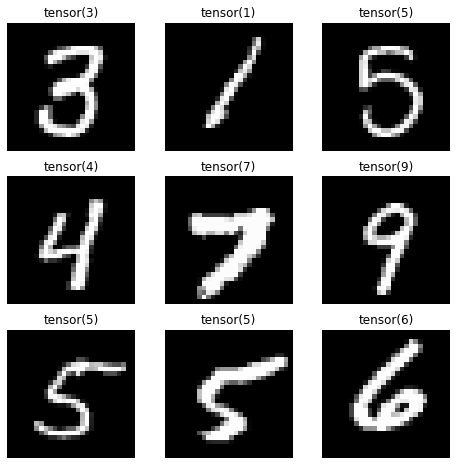

In [371]:
# Uppgift 2.4

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Plot images and labels for a few examples using the DataLoader for the training set.
# CODE HERE

### Uppgift 3 - Bygga dense-nätverk

Det första neurala nätverket vi ska skapa är ett så kallat Fully-connected/Dense Neural Network och består därför endast av lager där alla neuroner i ett lager är sammankopplade med alla neuroner från lagret innan. I **pytorch** så kan man skapa sin egen klass för ett nätverk genom att ärva *nn.Module* och implementera en *__ init__()* samt en *forward()* metod.

Ett lager av typen FC skapas i **pytorch** med hjälp av *nn.Linear* enligt exemplet nedan. 
<pre><code> nn.Linear(nr_of_input_neurons, nr_of_output_neurons) </pre></code>
De viktigaste input-parametrarna är antalet neuroner i lagret innan, **nr_of_input_neurons**, samt hur många neuroner detta lagret ska ha, **nr_of_output_neurons**. Mer information hittar ni i dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

I dokumentationen hittar ni också information om olika aktiveringsfunktioner: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

När nätverket är färdigt så är nästa steg att bestämma sin loss-funktion samt learning rate och optimerare.

1. Gör klart nätverket.
2. Välj loss-funktion, learning rate och optimizers.

In [12]:
# Uppgift 3.1

class DenseNet(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super().__init__()

        # Add more Linear (FC/Dense) layers here and experiment with different number of neurons.
        self.fc_in = nn.Linear(input_size, 500)
        self.fc_middle = nn.Linear(500, 100)
        self.fc_middle2 = nn.Linear(100, 8)
        self.fc_out = nn.Linear(self.fc_middle2.out_features, num_classes)

        self.activation = nn.ReLU()

    def forward(self, x):
        # Reshapes the input of size (batch x 1x28x28) into a vector (batch x784)
        x = x.view(x.shape[0], -1)

        x = self.fc_in(x)
        
        x = self.activation(x)
        
        x = self.fc_middle(x)
        x = self.activation(x)
        
        x = self.fc_middle2(x)
        x = self.activation(x)

        x = self.fc_out(x)

        return x

In [13]:
# Create the network
dense_net = DenseNet()

# Printing the network gives an overview of the network structure
print(dense_net)
# and calculating the nuber of parameters gives the size of the network
print('Number of parameters: {}'.format(sum([param.nelement() for param in dense_net.parameters()])))


DenseNet(
  (fc_in): Linear(in_features=784, out_features=500, bias=True)
  (fc_middle): Linear(in_features=500, out_features=100, bias=True)
  (fc_middle2): Linear(in_features=100, out_features=8, bias=True)
  (fc_out): Linear(in_features=8, out_features=10, bias=True)
  (activation): ReLU()
)
Number of parameters: 443498


Bestäm en learning rate, vilken loss-funktion samt vilken optimerare som ska användas för att lösa uppgiften.

Loss-funktioner hittar man i modulen **nn** på följande sätt: 

<pre><code> nn.NamnetPåLossFunktionen() </pre></code>

där de olika varianterna hittas här https://pytorch.org/docs/stable/nn.html#loss-functions

och optimerare:

<pre><code> optim.NamnetPåOptimeraren() </pre></code>

som hittas här https://pytorch.org/docs/stable/optim.html

In [14]:
# Uppgift 3.2

learning_rate = 0.1

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net.parameters(), lr= learning_rate)

### Uppgift 4 - Träna och evaluera dense-nätverk

Träning av nätverket innebär att vi i epoker (upprepade omgångar) låter nätverket gissa klassen på samtliga våra bilder i träningsdatan. Felet och dess gradienterna för samtliga parametrar beräknas mha loss-funktionen och nätverket uppdateras sen utifrån gradienterna av optimeraren.

1. Skriv en funktion *train(network, epoch, dataset)* som tar emot nätverket, numret på en epok samt träningsdata och utför träning av nätverket i batcher tills all data har gåtts igenom en gång. Beräkna gradienterna och uppdatera värdet.
2. Skriv en funktion *test(dataset)* som beräknar average loss och accuracy för nätverket på ett angivet dataset och sedan printar detta. Funktionen ska returnera snitt-felet som ett värde.
3. Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

Nedan följer en beskrivning i text av vad *train* ska göra:

<pre><code> 
funktion train(network, epoch, dataset)
    Sätt nätverket i träningsläge
    För varje batch i datasetet
        Nollställ optimerarens gradienter    
        Beräkna nätverkets gissningar utifrån batchen med data
        Beräkna felet mha loss-funktionen och true-labels/targets
        Beräkna fel-gradienterna för samtliga parametrar
        Uppdatera nätverket mha optimeraren
        
        För vissa batcher, printa info om hur träningen går, exempelvis batch, loss och procent av epoken som är klar.
</pre></code>

In [15]:
# Uppgift 4.1

def train(network, epoch, dataset):
    network.train()
    for i,(train_features,train_labels) in enumerate(dataset):
        optimizer.zero_grad()
        output = network(train_features)
        loss = loss_function(output, train_labels)
        loss.backward()
        optimizer.step()
        #print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
    
        
    #raise NotImplementedError('Function not implemented yet.')

Nedan följer en beskrivning i text av vad *test* ska göra:

<pre><code> 
funktion test(network, dataset)
    y_true = []
    y_pred = []
    
    Sätt nätverket i evalueringsläge
    Stäng av användningen av gradienter
        För varje batch i datasetet
            Beräkna nätverkets gissningar utifrån batchen med data
            Beräkna felet mha loss-funktionen och true-labels/targets
            Spara gissningarna i y_pred
            Spara de rätta svaren i y_true
            
    Använd y_pred och y_true för att beräkna accuracy och skapa en confusion matrix
    Printa Avg. loss, accuracy och en confusion matrix
    Returnera Avg. loss
</pre></code>

In [55]:
# Uppgift 4.2

def test(network, dataset):
    y_true = []
    y_pred = []
    losses = []
    network.eval()
    with torch.no_grad():
        for i,(features,labels) in enumerate(dataset):
            output = network(features)
            loss = loss_function(output, labels)
            y_pred.append(output)
            y_true.append(labels)
            losses.append(loss)
    print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
    avg_loss = np.mean(losses)
    TP = 0
    for i in range(len(y_true)):
        true = y_true[i]
        pred = y_pred[i]
        _, indices = torch.max(pred, 1)
        #print(true, pred)
        match=True
        for j in range(len(true)):
            if true[j]== indices[j]:
                TP+=1
        
    accuracy = TP/(len(y_true)*len(y_true[0]))
    print(f"Avg. Loss = {avg_loss}, Accuracy = {accuracy}")
    
    
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import itertools as it
    y_true_list=[]
    y_pred_list=[]
    #print(y_pred)
    #print(y_true)
    for yt, yp in zip (y_true, y_pred):
        for j in range(len(yp)):
            y_true_list.append(yt[j].item())
            _,x = torch.max(yp,1)
            y_pred_list.append(x[j].item())
    #print(y_pred_list)
    cm = confusion_matrix(y_true_list, y_pred_list)
    

        
     
    return avg_loss, cm
    #raise NotImplementedError('Function not implemented yet.')

Det som är kvar nu är att träna nätverket i flera omgångar (epoker) och kontinuerligt utvärdera hur träningen går mha valideringsdatan. Varje gång en ny lägsta (bästa) loss uppnås så kan modellen och optimeraren sparas för att användas igen senare.

In [400]:
def run(net_filename,opti_filename,network_to_train, data_to_train):
    n_epochs = 10
    #net_filename = net_filename
    #opti_filename = opti_filename
    best_loss = 10 ** 4

    for epoch in range(1, n_epochs + 1):
        # Perform training once on the entire set of training data
        train(network_to_train, epoch, data_to_train)  

        # Evaluate the net using validation data
        val_loss,_ = test(network_to_train, val_dload)

        # If the latest training yielded a lower validation loss than ever before, save the model to file such that the best one
        # can always be retrieved afterwards. 
        if val_loss < best_loss:
            print('Saving best model to {}\n'.format('./results/{}.pth'.format(net_filename)))

            # Save the network
            torch.save(network_to_train.state_dict(), './results/{}.pth'.format(net_filename))
            # Save the optimizer, in case we want to continue training later
            torch.save(optimizer.state_dict(), './results/{}.pth'.format(opti_filename))
            # Update the best loss to the current loss
            best_loss = val_loss


Ett sparat nätverk kan sedan laddas in med *torch.load(filename)* enligt koden nedan.

In [ ]:
run("net.txt", "opti.txt", dense_net, train_dload)

In [384]:
dense_net = DenseNet()
net_filename = "net.txt"


network_state_dict = torch.load('./results/{}.pth'.format(net_filename))
dense_net.load_state_dict(network_state_dict)



<All keys matched successfully>

##### Uppgift 4.3
Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet genom att uppdatera och ändra nätverket i uppgift 3.1

Jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet. Printa båda nätverkens accuracy och deras respektive confusion matrix.

Batch = 799, loss = 0.005771168973296881, epoch = 10
Avg. Loss = 0.1287832409143448, Accuracy = 0.97225


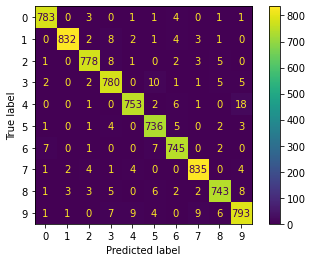

In [385]:
# CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test1, cm = test(dense_net, val_dload)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




Batch = 0, loss = 2.2989370822906494, epoch = 1
Batch = 1, loss = 2.272327423095703, epoch = 1
Batch = 2, loss = 2.3688125610351562, epoch = 1
Batch = 3, loss = 2.3043854236602783, epoch = 1
Batch = 4, loss = 2.334723711013794, epoch = 1
Batch = 5, loss = 2.2489848136901855, epoch = 1
Batch = 6, loss = 2.3038840293884277, epoch = 1
Batch = 7, loss = 2.3460755348205566, epoch = 1
Batch = 8, loss = 2.404581308364868, epoch = 1
Batch = 9, loss = 2.372485876083374, epoch = 1
Batch = 10, loss = 2.2582621574401855, epoch = 1
Batch = 11, loss = 2.2348437309265137, epoch = 1
Batch = 12, loss = 2.3429391384124756, epoch = 1
Batch = 13, loss = 2.2920546531677246, epoch = 1
Batch = 14, loss = 2.3669745922088623, epoch = 1
Batch = 15, loss = 2.3432865142822266, epoch = 1
Batch = 16, loss = 2.452876329421997, epoch = 1
Batch = 17, loss = 2.2731871604919434, epoch = 1
Batch = 18, loss = 2.3516697883605957, epoch = 1
Batch = 19, loss = 2.3126096725463867, epoch = 1
Batch = 20, loss = 2.21890282630920

Batch = 86, loss = 1.724782943725586, epoch = 2
Batch = 87, loss = 1.1776880025863647, epoch = 2
Batch = 88, loss = 1.5211594104766846, epoch = 2
Batch = 89, loss = 1.7460758686065674, epoch = 2
Batch = 90, loss = 1.3266246318817139, epoch = 2
Batch = 91, loss = 1.5591715574264526, epoch = 2
Batch = 92, loss = 1.6877492666244507, epoch = 2
Batch = 93, loss = 1.9037606716156006, epoch = 2
Batch = 94, loss = 1.445717215538025, epoch = 2
Batch = 95, loss = 1.1710573434829712, epoch = 2
Batch = 96, loss = 1.32368004322052, epoch = 2
Batch = 97, loss = 1.1225247383117676, epoch = 2
Batch = 98, loss = 1.1518946886062622, epoch = 2
Batch = 99, loss = 1.5815529823303223, epoch = 2
Batch = 799, loss = 1.4589049816131592, epoch = 10
Avg. Loss = 1.3421136140823364, Accuracy = 0.545875
Saving best model to ./results/net_small.txt.pth

Batch = 0, loss = 1.2199033498764038, epoch = 3
Batch = 1, loss = 1.8565127849578857, epoch = 3
Batch = 2, loss = 1.4627981185913086, epoch = 3
Batch = 3, loss = 1.7

Batch = 48, loss = 0.35140877962112427, epoch = 4
Batch = 49, loss = 0.815027117729187, epoch = 4
Batch = 50, loss = 0.45597586035728455, epoch = 4
Batch = 51, loss = 0.8442729711532593, epoch = 4
Batch = 52, loss = 0.5012014508247375, epoch = 4
Batch = 53, loss = 0.5782883763313293, epoch = 4
Batch = 54, loss = 0.7460222244262695, epoch = 4
Batch = 55, loss = 0.596075713634491, epoch = 4
Batch = 56, loss = 0.7998284101486206, epoch = 4
Batch = 57, loss = 1.029144287109375, epoch = 4
Batch = 58, loss = 0.40499529242515564, epoch = 4
Batch = 59, loss = 0.2749561667442322, epoch = 4
Batch = 60, loss = 1.3056052923202515, epoch = 4
Batch = 61, loss = 1.2268705368041992, epoch = 4
Batch = 62, loss = 0.8270646929740906, epoch = 4
Batch = 63, loss = 0.8683966398239136, epoch = 4
Batch = 64, loss = 1.0464532375335693, epoch = 4
Batch = 65, loss = 1.1011202335357666, epoch = 4
Batch = 66, loss = 0.7182955741882324, epoch = 4
Batch = 67, loss = 1.1117264032363892, epoch = 4
Batch = 68, loss = 0

Batch = 47, loss = 0.2816733419895172, epoch = 6
Batch = 48, loss = 0.10009689629077911, epoch = 6
Batch = 49, loss = 0.48884183168411255, epoch = 6
Batch = 50, loss = 0.17239265143871307, epoch = 6
Batch = 51, loss = 0.5194026231765747, epoch = 6
Batch = 52, loss = 0.3350791335105896, epoch = 6
Batch = 53, loss = 0.3485051393508911, epoch = 6
Batch = 54, loss = 0.20753872394561768, epoch = 6
Batch = 55, loss = 0.32013270258903503, epoch = 6
Batch = 56, loss = 0.2789776921272278, epoch = 6
Batch = 57, loss = 0.6521384716033936, epoch = 6
Batch = 58, loss = 0.10855025053024292, epoch = 6
Batch = 59, loss = 0.0667937844991684, epoch = 6
Batch = 60, loss = 1.081779956817627, epoch = 6
Batch = 61, loss = 0.6563009023666382, epoch = 6
Batch = 62, loss = 0.8192575573921204, epoch = 6
Batch = 63, loss = 0.4289510250091553, epoch = 6
Batch = 64, loss = 0.7152088284492493, epoch = 6
Batch = 65, loss = 0.427048921585083, epoch = 6
Batch = 66, loss = 0.3115478456020355, epoch = 6
Batch = 67, loss

Batch = 65, loss = 0.10581785440444946, epoch = 8
Batch = 66, loss = 0.17518846690654755, epoch = 8
Batch = 67, loss = 0.1715874969959259, epoch = 8
Batch = 68, loss = 0.1139695793390274, epoch = 8
Batch = 69, loss = 0.07295068353414536, epoch = 8
Batch = 70, loss = 0.2907712161540985, epoch = 8
Batch = 71, loss = 0.1465766280889511, epoch = 8
Batch = 72, loss = 0.27408429980278015, epoch = 8
Batch = 73, loss = 0.055174775421619415, epoch = 8
Batch = 74, loss = 0.022810760885477066, epoch = 8
Batch = 75, loss = 0.037167683243751526, epoch = 8
Batch = 76, loss = 0.04253513365983963, epoch = 8
Batch = 77, loss = 0.13910561800003052, epoch = 8
Batch = 78, loss = 0.055770404636859894, epoch = 8
Batch = 79, loss = 0.09268830716609955, epoch = 8
Batch = 80, loss = 0.12935827672481537, epoch = 8
Batch = 81, loss = 0.10843084007501602, epoch = 8
Batch = 82, loss = 0.06869570165872574, epoch = 8
Batch = 83, loss = 0.00924464501440525, epoch = 8
Batch = 84, loss = 0.07784630358219147, epoch = 8


Batch = 62, loss = 0.3460148274898529, epoch = 10
Batch = 63, loss = 0.0072474353946745396, epoch = 10
Batch = 64, loss = 0.2974562346935272, epoch = 10
Batch = 65, loss = 0.45185112953186035, epoch = 10
Batch = 66, loss = 0.03252062574028969, epoch = 10
Batch = 67, loss = 0.17477861046791077, epoch = 10
Batch = 68, loss = 0.018777167424559593, epoch = 10
Batch = 69, loss = 0.004295224789530039, epoch = 10
Batch = 70, loss = 0.02302524819970131, epoch = 10
Batch = 71, loss = 0.019982974976301193, epoch = 10
Batch = 72, loss = 0.04728211089968681, epoch = 10
Batch = 73, loss = 0.09152556955814362, epoch = 10
Batch = 74, loss = 0.01307679247111082, epoch = 10
Batch = 75, loss = 0.027974527329206467, epoch = 10
Batch = 76, loss = 0.02353418990969658, epoch = 10
Batch = 77, loss = 0.036886267364025116, epoch = 10
Batch = 78, loss = 0.015396982431411743, epoch = 10
Batch = 79, loss = 0.33163395524024963, epoch = 10
Batch = 80, loss = 0.2138701230287552, epoch = 10
Batch = 81, loss = 0.02724

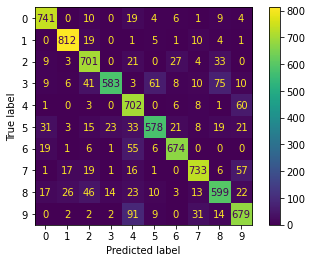

In [401]:
dense_net_small = DenseNet()
optimizer = optim.SGD(dense_net_small.parameters(), lr= learning_rate)


run("net_small.txt", "opti_small.txt", dense_net_small, train_dload_small)

testsmall, cm2 = test(dense_net_small, val_dload)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()



### Uppgift 5 - Träna och evaluera SVM:s

1. När vi tränar SVM:s mha scikit-learn så kan vi inte längre använda oss av våra DataLoaders utan behöver därför gå tillbaka till våra dataframes, train_df, train_df_small, val_df och test_df. Skriv kod som separerar varje dataframe i features (pixlar) och labels (klasser) samt normaliserar features [0, 1].
2. Skriv kod för att med hjälp av sklearn och klassen SVC skapa en SVM-modell för bildklassificering.
3. Träna SVM-modellen på träningsdatan.
4. Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

In [91]:
# Uppgift 5.1



def format(df):
    y = []
    x = []
    for index,row in df.iterrows():
        y.append(row["label"])
        pixels=row.loc[df.columns != "label"]
        x.append(pixels.values / 255)
    return y, x
train_y, train_X = format(train_df)


train_y_small, train_X_small = format(train_df_small)


val_y, val_X = format(val_df)

test_y, test_X = format(test_df)

In [92]:
# Uppgift 5.2
# CODE HERE
from sklearn import svm
svm_model = svm.SVC()

In [93]:
# Uppgift 5.3
# CODE HERE
svm_model.fit(train_X, train_y)

SVC()

In [94]:
def evaluate_svm_model(model, testX, testy):
    # Make predictions
    y_pred = model.predict(testX)
    
    # Calculate accuracy
    acc = metrics.accuracy_score(y_true=testy, y_pred=y_pred)
    # Create confusion matrix
    cm = metrics.confusion_matrix(testy, y_pred)

    print("Accuracy:", round(acc, 4) * 100, "\n")
    print(cm)

In [95]:
evaluate_svm_model(svm_model, val_X, val_y)

Accuracy: 97.14 

[[786   0   2   0   2   2   1   0   0   1]
 [  0 841   5   2   1   0   0   3   0   1]
 [  2   2 776   2   3   1   1   7   4   0]
 [  1   1   5 772   1   9   1   4   8   4]
 [  2   0   2   0 765   0   2   0   0  10]
 [  1   0   2   5   2 732   7   1   0   2]
 [  7   1   0   0   2   5 744   0   3   0]
 [  1   3   3   0   5   0   0 826   0  13]
 [  1   4   5   4   3   5   3   2 744   2]
 [  0   2   2   9  16   1   0  10   5 785]]


##### Uppgift 5.4
Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet genom att uppdatera och ändra modellen i Uppgift 5.2.

Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [ ]:
dense_net = DenseNet()
net_filename = "net.txt"


network_state_dict = torch.load('./results/{}.pth'.format(net_filename))
dense_net.load_state_dict(network_state_dict

In [96]:
# CODE HERE
svm_model_small = svm.SVC()
svm_model_small.fit(train_X_small,train_y_small)
evaluate_svm_model(svm_model_small, val_X, val_y)

Accuracy: 92.14 

[[771   0   7   0   3   4   6   1   2   0]
 [  0 831   7   1   1   7   2   1   1   2]
 [  2   7 743   8   8   1   9   7  13   0]
 [  1   3  19 700   1  27   5  16  25   9]
 [  2   6   3   0 710   0   3   1   3  53]
 [  1   4   4   8   9 694  16   2   7   7]
 [  6   1   8   0   8  12 723   0   4   0]
 [  6   6  12   0  13   2   0 783   2  27]
 [  3  15  12  20   3  19   4   5 683   9]
 [  2   5  11  14  31   2   0  21  11 733]]


### Uppgift 6 - Träna och evaluera CNN

Den sista delen av den här inlämningen är att ni ska implementera och utvärdera ett CNN utifrån de verktyg ni har använt tidigare under uppgiften. En viktig skillnad med convolutions jämfört med FC-lager är att de gradvis minskar storleken på sin output utifrån kernel-size:n (n, m) och att antalet kanaler/channels motsvarar antalet filter i lagret. Exempelvis så kommer en input på 28x28 som körs genom en convolution med kernel-size (3, 4) och stride=1 ge en output som är (28-n+1)x(28-m+1)=26x25. Använder man däremot padding när man genomför sina convolutions så blir input och output lika stora.

I pytorch genomför man convolutions mha:
<pre><code> nn.Conv2d(nr_of_input_filters, nr_of_output_filters, kernel) </pre></code>

För mer information se dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

1. Gör klart implementationen av ett CNN
2. Experimentera fram ett CNN-nätverk som presterar minst lika bra som Dense-nätet.
3. Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [372]:
class ConvModel(nn.Module):
    def __init__(self, input_channels=1, num_classes=10):
        super().__init__()
        self.kernel = 5
        self.filters = 6
        
        self.conv_in = nn.Conv2d(input_channels, self.filters, self.kernel)
        self.conv_b = nn.Conv2d(6, 16, self.kernel)
        
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.activation = nn.ReLU()
        
        self.fc = nn.Linear(256, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)
        

    def forward(self, x):

        x = self.pool(self.activation(self.conv_in(x)))
        x = self.pool(self.activation(self.conv_b(x)))
        x = torch.flatten(x, 1)
        
        x = self.fc(x)
        x = self.log_softmax(x)
        
#         x = self.activation(x)
#         x = self.conv_in(x)
#         x = self.conv_b(x)

        return x

In [373]:
conv_net = ConvModel()
print(conv_net)

ConvModel(
  (conv_in): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv_b): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (activation): ReLU()
  (fc): Linear(in_features=256, out_features=10, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)


Batch = 0, loss = 2.3288092613220215, epoch = 1
Batch = 1, loss = 2.3072922229766846, epoch = 1
Batch = 2, loss = 2.3003695011138916, epoch = 1
Batch = 3, loss = 2.3228447437286377, epoch = 1
Batch = 4, loss = 2.3074371814727783, epoch = 1
Batch = 5, loss = 2.298962354660034, epoch = 1
Batch = 6, loss = 2.297098398208618, epoch = 1
Batch = 7, loss = 2.262408971786499, epoch = 1
Batch = 8, loss = 2.2987148761749268, epoch = 1
Batch = 9, loss = 2.267505645751953, epoch = 1
Batch = 10, loss = 2.343553066253662, epoch = 1
Batch = 11, loss = 2.3056247234344482, epoch = 1
Batch = 12, loss = 2.2787492275238037, epoch = 1
Batch = 13, loss = 2.3353805541992188, epoch = 1
Batch = 14, loss = 2.276057481765747, epoch = 1
Batch = 15, loss = 2.273320436477661, epoch = 1
Batch = 16, loss = 2.253598690032959, epoch = 1
Batch = 17, loss = 2.3821723461151123, epoch = 1
Batch = 18, loss = 2.2561793327331543, epoch = 1
Batch = 19, loss = 2.3116583824157715, epoch = 1
Batch = 20, loss = 2.230104923248291, 

Batch = 187, loss = 0.2317066192626953, epoch = 1
Batch = 188, loss = 0.3353804051876068, epoch = 1
Batch = 189, loss = 0.03898286074399948, epoch = 1
Batch = 190, loss = 0.2336108386516571, epoch = 1
Batch = 191, loss = 0.6145079135894775, epoch = 1
Batch = 192, loss = 0.4031307101249695, epoch = 1
Batch = 193, loss = 0.342783659696579, epoch = 1
Batch = 194, loss = 0.6668228507041931, epoch = 1
Batch = 195, loss = 0.3326641321182251, epoch = 1
Batch = 196, loss = 0.16452643275260925, epoch = 1
Batch = 197, loss = 0.42747610807418823, epoch = 1
Batch = 198, loss = 0.19748744368553162, epoch = 1
Batch = 199, loss = 0.041701771318912506, epoch = 1
Batch = 200, loss = 0.27183011174201965, epoch = 1
Batch = 201, loss = 0.7908448576927185, epoch = 1
Batch = 202, loss = 0.12177983671426773, epoch = 1
Batch = 203, loss = 0.553033173084259, epoch = 1
Batch = 204, loss = 0.20564302802085876, epoch = 1
Batch = 205, loss = 0.3762052655220032, epoch = 1
Batch = 206, loss = 0.0919647067785263, epo

Batch = 355, loss = 1.1743940114974976, epoch = 1
Batch = 356, loss = 0.3514902889728546, epoch = 1
Batch = 357, loss = 0.03580658137798309, epoch = 1
Batch = 358, loss = 0.15819993615150452, epoch = 1
Batch = 359, loss = 0.22549109160900116, epoch = 1
Batch = 360, loss = 0.6204801797866821, epoch = 1
Batch = 361, loss = 0.06810780614614487, epoch = 1
Batch = 362, loss = 0.23616257309913635, epoch = 1
Batch = 363, loss = 0.12099118530750275, epoch = 1
Batch = 364, loss = 0.12331859767436981, epoch = 1
Batch = 365, loss = 0.24108794331550598, epoch = 1
Batch = 366, loss = 0.08140445500612259, epoch = 1
Batch = 367, loss = 0.08893052488565445, epoch = 1
Batch = 368, loss = 0.4815177023410797, epoch = 1
Batch = 369, loss = 0.23744194209575653, epoch = 1
Batch = 370, loss = 0.11847637593746185, epoch = 1
Batch = 371, loss = 1.6427371501922607, epoch = 1
Batch = 372, loss = 0.1955534666776657, epoch = 1
Batch = 373, loss = 0.4681227207183838, epoch = 1
Batch = 374, loss = 0.4673653244972229

Batch = 527, loss = 0.3410158157348633, epoch = 1
Batch = 528, loss = 0.023331966251134872, epoch = 1
Batch = 529, loss = 0.284673810005188, epoch = 1
Batch = 530, loss = 0.3260311484336853, epoch = 1
Batch = 531, loss = 0.07235312461853027, epoch = 1
Batch = 532, loss = 0.22952118515968323, epoch = 1
Batch = 533, loss = 0.17529311776161194, epoch = 1
Batch = 534, loss = 0.7881698608398438, epoch = 1
Batch = 535, loss = 0.03468623012304306, epoch = 1
Batch = 536, loss = 0.05896937847137451, epoch = 1
Batch = 537, loss = 0.05807734653353691, epoch = 1
Batch = 538, loss = 0.34574180841445923, epoch = 1
Batch = 539, loss = 0.5039402842521667, epoch = 1
Batch = 540, loss = 0.26058048009872437, epoch = 1
Batch = 541, loss = 0.3663310408592224, epoch = 1
Batch = 542, loss = 0.8414077758789062, epoch = 1
Batch = 543, loss = 0.7659726142883301, epoch = 1
Batch = 544, loss = 0.5043697953224182, epoch = 1
Batch = 545, loss = 0.15861129760742188, epoch = 1
Batch = 546, loss = 0.4929187297821045, 

Batch = 701, loss = 0.07365689426660538, epoch = 1
Batch = 702, loss = 0.15924230217933655, epoch = 1
Batch = 703, loss = 0.07376490533351898, epoch = 1
Batch = 704, loss = 0.3036760091781616, epoch = 1
Batch = 705, loss = 0.016900761052966118, epoch = 1
Batch = 706, loss = 0.02908160910010338, epoch = 1
Batch = 707, loss = 0.2481532096862793, epoch = 1
Batch = 708, loss = 0.22600659728050232, epoch = 1
Batch = 709, loss = 0.26618248224258423, epoch = 1
Batch = 710, loss = 0.013811898417770863, epoch = 1
Batch = 711, loss = 0.5898714065551758, epoch = 1
Batch = 712, loss = 0.48892441391944885, epoch = 1
Batch = 713, loss = 0.3636424243450165, epoch = 1
Batch = 714, loss = 0.21743600070476532, epoch = 1
Batch = 715, loss = 0.04707606881856918, epoch = 1
Batch = 716, loss = 0.039801377803087234, epoch = 1
Batch = 717, loss = 0.11690883338451385, epoch = 1
Batch = 718, loss = 0.3040356934070587, epoch = 1
Batch = 719, loss = 0.03356838971376419, epoch = 1
Batch = 720, loss = 0.01592060178

Batch = 874, loss = 0.0946483388543129, epoch = 1
Batch = 875, loss = 0.007239742670208216, epoch = 1
Batch = 876, loss = 0.06256727129220963, epoch = 1
Batch = 877, loss = 0.2369752824306488, epoch = 1
Batch = 878, loss = 0.2639070153236389, epoch = 1
Batch = 879, loss = 0.14147880673408508, epoch = 1
Batch = 880, loss = 0.14338216185569763, epoch = 1
Batch = 881, loss = 0.07604578882455826, epoch = 1
Batch = 882, loss = 0.03628469631075859, epoch = 1
Batch = 883, loss = 0.540389358997345, epoch = 1
Batch = 884, loss = 0.06675015389919281, epoch = 1
Batch = 885, loss = 0.1243167519569397, epoch = 1
Batch = 886, loss = 0.03499860316514969, epoch = 1
Batch = 887, loss = 0.4162676930427551, epoch = 1
Batch = 888, loss = 0.13138964772224426, epoch = 1
Batch = 889, loss = 0.02098427154123783, epoch = 1
Batch = 890, loss = 0.049292758107185364, epoch = 1
Batch = 891, loss = 0.005209425929933786, epoch = 1
Batch = 892, loss = 0.0434633307158947, epoch = 1
Batch = 893, loss = 0.06455503404140

Batch = 1046, loss = 0.04756501317024231, epoch = 1
Batch = 1047, loss = 0.02273658663034439, epoch = 1
Batch = 1048, loss = 0.009099511429667473, epoch = 1
Batch = 1049, loss = 0.043683961033821106, epoch = 1
Batch = 1050, loss = 0.7437282800674438, epoch = 1
Batch = 1051, loss = 0.043502259999513626, epoch = 1
Batch = 1052, loss = 0.06324003636837006, epoch = 1
Batch = 1053, loss = 0.14028510451316833, epoch = 1
Batch = 1054, loss = 0.5044887065887451, epoch = 1
Batch = 1055, loss = 0.006223337724804878, epoch = 1
Batch = 1056, loss = 0.05734545737504959, epoch = 1
Batch = 1057, loss = 0.0034203696995973587, epoch = 1
Batch = 1058, loss = 0.2464866191148758, epoch = 1
Batch = 1059, loss = 0.020713936537504196, epoch = 1
Batch = 1060, loss = 0.044262759387493134, epoch = 1
Batch = 1061, loss = 0.2435944527387619, epoch = 1
Batch = 1062, loss = 0.02281823195517063, epoch = 1
Batch = 1063, loss = 0.0034281325060874224, epoch = 1
Batch = 1064, loss = 0.039147622883319855, epoch = 1
Batch

Batch = 1235, loss = 0.037637703120708466, epoch = 1
Batch = 1236, loss = 0.1892545223236084, epoch = 1
Batch = 1237, loss = 0.05798614025115967, epoch = 1
Batch = 1238, loss = 0.025504877790808678, epoch = 1
Batch = 1239, loss = 0.1294431835412979, epoch = 1
Batch = 1240, loss = 0.01265120692551136, epoch = 1
Batch = 1241, loss = 0.09716497361660004, epoch = 1
Batch = 1242, loss = 0.19725899398326874, epoch = 1
Batch = 1243, loss = 0.1259942352771759, epoch = 1
Batch = 1244, loss = 0.28325411677360535, epoch = 1
Batch = 1245, loss = 0.013687022030353546, epoch = 1
Batch = 1246, loss = 0.11872150003910065, epoch = 1
Batch = 1247, loss = 0.6182814836502075, epoch = 1
Batch = 1248, loss = 0.007454781327396631, epoch = 1
Batch = 1249, loss = 0.005590701475739479, epoch = 1
Batch = 1250, loss = 0.2962271273136139, epoch = 1
Batch = 1251, loss = 0.04228121414780617, epoch = 1
Batch = 1252, loss = 0.6341009736061096, epoch = 1
Batch = 1253, loss = 0.5691710710525513, epoch = 1
Batch = 1254, 

Batch = 1407, loss = 0.05783659219741821, epoch = 1
Batch = 1408, loss = 0.3649459183216095, epoch = 1
Batch = 1409, loss = 0.11879299581050873, epoch = 1
Batch = 1410, loss = 0.15174901485443115, epoch = 1
Batch = 1411, loss = 0.02633720263838768, epoch = 1
Batch = 1412, loss = 0.16837850213050842, epoch = 1
Batch = 1413, loss = 0.04165077582001686, epoch = 1
Batch = 1414, loss = 0.16451244056224823, epoch = 1
Batch = 1415, loss = 0.003381395246833563, epoch = 1
Batch = 1416, loss = 0.05458483099937439, epoch = 1
Batch = 1417, loss = 0.005303265526890755, epoch = 1
Batch = 1418, loss = 0.00630043912678957, epoch = 1
Batch = 1419, loss = 0.011632752604782581, epoch = 1
Batch = 1420, loss = 0.07689248770475388, epoch = 1
Batch = 1421, loss = 0.16104811429977417, epoch = 1
Batch = 1422, loss = 0.10695026814937592, epoch = 1
Batch = 1423, loss = 0.038092780858278275, epoch = 1
Batch = 1424, loss = 0.011293508112430573, epoch = 1
Batch = 1425, loss = 0.10549569129943848, epoch = 1
Batch = 

Batch = 1593, loss = 0.1316363662481308, epoch = 1
Batch = 1594, loss = 0.23804306983947754, epoch = 1
Batch = 1595, loss = 0.43004822731018066, epoch = 1
Batch = 1596, loss = 0.025058884173631668, epoch = 1
Batch = 1597, loss = 0.04550440236926079, epoch = 1
Batch = 1598, loss = 0.100835882127285, epoch = 1
Batch = 1599, loss = 0.07020822912454605, epoch = 1
Batch = 1600, loss = 0.0021309577859938145, epoch = 1
Batch = 1601, loss = 0.5404016375541687, epoch = 1
Batch = 1602, loss = 0.2554907202720642, epoch = 1
Batch = 1603, loss = 0.02818155661225319, epoch = 1
Batch = 1604, loss = 0.0014271303080022335, epoch = 1
Batch = 1605, loss = 0.03065316006541252, epoch = 1
Batch = 1606, loss = 0.013084666803479195, epoch = 1
Batch = 1607, loss = 0.003348393365740776, epoch = 1
Batch = 1608, loss = 0.00811703223735094, epoch = 1
Batch = 1609, loss = 0.024331483989953995, epoch = 1
Batch = 1610, loss = 0.0007602737168781459, epoch = 1
Batch = 1611, loss = 0.01869766041636467, epoch = 1
Batch =

Batch = 1792, loss = 0.032423775643110275, epoch = 1
Batch = 1793, loss = 0.5153019428253174, epoch = 1
Batch = 1794, loss = 0.0023433626629412174, epoch = 1
Batch = 1795, loss = 0.023451922461390495, epoch = 1
Batch = 1796, loss = 0.003957037813961506, epoch = 1
Batch = 1797, loss = 0.04278574138879776, epoch = 1
Batch = 1798, loss = 0.06636548042297363, epoch = 1
Batch = 1799, loss = 0.006612896919250488, epoch = 1
Batch = 1800, loss = 0.06751855462789536, epoch = 1
Batch = 1801, loss = 0.25408607721328735, epoch = 1
Batch = 1802, loss = 0.012278917245566845, epoch = 1
Batch = 1803, loss = 0.00717668142169714, epoch = 1
Batch = 1804, loss = 0.008125926367938519, epoch = 1
Batch = 1805, loss = 0.2177974432706833, epoch = 1
Batch = 1806, loss = 0.003883852157741785, epoch = 1
Batch = 1807, loss = 0.08282440900802612, epoch = 1
Batch = 1808, loss = 0.12167863547801971, epoch = 1
Batch = 1809, loss = 0.002354135736823082, epoch = 1
Batch = 1810, loss = 0.059593118727207184, epoch = 1
Bat

Batch = 1971, loss = 0.0012956715654581785, epoch = 1
Batch = 1972, loss = 0.032302968204021454, epoch = 1
Batch = 1973, loss = 0.0037217140197753906, epoch = 1
Batch = 1974, loss = 0.013644089922308922, epoch = 1
Batch = 1975, loss = 0.0022655492648482323, epoch = 1
Batch = 1976, loss = 0.005181493703275919, epoch = 1
Batch = 1977, loss = 0.008709526620805264, epoch = 1
Batch = 1978, loss = 0.10728609561920166, epoch = 1
Batch = 1979, loss = 0.017069539055228233, epoch = 1
Batch = 1980, loss = 0.019851185381412506, epoch = 1
Batch = 1981, loss = 0.058174390345811844, epoch = 1
Batch = 1982, loss = 0.012047200463712215, epoch = 1
Batch = 1983, loss = 0.014063042588531971, epoch = 1
Batch = 1984, loss = 0.03621584549546242, epoch = 1
Batch = 1985, loss = 0.3999062180519104, epoch = 1
Batch = 1986, loss = 0.04247528687119484, epoch = 1
Batch = 1987, loss = 0.020276222378015518, epoch = 1
Batch = 1988, loss = 0.4510374963283539, epoch = 1
Batch = 1989, loss = 0.003635245840996504, epoch =

Batch = 2158, loss = 0.4690384864807129, epoch = 1
Batch = 2159, loss = 0.05040844529867172, epoch = 1
Batch = 2160, loss = 0.2831338942050934, epoch = 1
Batch = 2161, loss = 0.09835027903318405, epoch = 1
Batch = 2162, loss = 0.003758365288376808, epoch = 1
Batch = 2163, loss = 0.04002371057868004, epoch = 1
Batch = 2164, loss = 0.0035881262738257647, epoch = 1
Batch = 2165, loss = 0.013176722452044487, epoch = 1
Batch = 2166, loss = 0.009963438846170902, epoch = 1
Batch = 2167, loss = 0.11669810116291046, epoch = 1
Batch = 2168, loss = 0.005701318848878145, epoch = 1
Batch = 2169, loss = 0.8587973713874817, epoch = 1
Batch = 2170, loss = 0.07829292863607407, epoch = 1
Batch = 2171, loss = 0.14874868094921112, epoch = 1
Batch = 2172, loss = 0.016529347747564316, epoch = 1
Batch = 2173, loss = 0.002678269986063242, epoch = 1
Batch = 2174, loss = 0.33992066979408264, epoch = 1
Batch = 2175, loss = 0.048835474997758865, epoch = 1
Batch = 2176, loss = 0.01725238561630249, epoch = 1
Batch 

Batch = 2325, loss = 0.18761421740055084, epoch = 1
Batch = 2326, loss = 0.04808405786752701, epoch = 1
Batch = 2327, loss = 0.6015282869338989, epoch = 1
Batch = 2328, loss = 0.010461194440722466, epoch = 1
Batch = 2329, loss = 0.5936828851699829, epoch = 1
Batch = 2330, loss = 0.052337151020765305, epoch = 1
Batch = 2331, loss = 0.022920288145542145, epoch = 1
Batch = 2332, loss = 0.2210526019334793, epoch = 1
Batch = 2333, loss = 0.05024058744311333, epoch = 1
Batch = 2334, loss = 0.005243201740086079, epoch = 1
Batch = 2335, loss = 0.032032355666160583, epoch = 1
Batch = 2336, loss = 0.04014138877391815, epoch = 1
Batch = 2337, loss = 0.0033461698330938816, epoch = 1
Batch = 2338, loss = 0.006364612374454737, epoch = 1
Batch = 2339, loss = 0.010969718918204308, epoch = 1
Batch = 2340, loss = 0.007864871062338352, epoch = 1
Batch = 2341, loss = 0.02020285464823246, epoch = 1
Batch = 2342, loss = 0.09084441512823105, epoch = 1
Batch = 2343, loss = 0.00651188800111413, epoch = 1
Batch

Batch = 141, loss = 0.007140358444303274, epoch = 2
Batch = 142, loss = 0.4643925130367279, epoch = 2
Batch = 143, loss = 0.006444172002375126, epoch = 2
Batch = 144, loss = 0.032800301909446716, epoch = 2
Batch = 145, loss = 0.0006418273551389575, epoch = 2
Batch = 146, loss = 0.007039024028927088, epoch = 2
Batch = 147, loss = 0.05334808677434921, epoch = 2
Batch = 148, loss = 0.20396438241004944, epoch = 2
Batch = 149, loss = 0.04567037895321846, epoch = 2
Batch = 150, loss = 0.05509558320045471, epoch = 2
Batch = 151, loss = 0.4432832598686218, epoch = 2
Batch = 152, loss = 0.5749220848083496, epoch = 2
Batch = 153, loss = 0.049386151134967804, epoch = 2
Batch = 154, loss = 0.002272259211167693, epoch = 2
Batch = 155, loss = 0.030125770717859268, epoch = 2
Batch = 156, loss = 0.030130892992019653, epoch = 2
Batch = 157, loss = 0.07451976835727692, epoch = 2
Batch = 158, loss = 0.10531449317932129, epoch = 2
Batch = 159, loss = 0.007937191985547543, epoch = 2
Batch = 160, loss = 0.1

Batch = 341, loss = 0.017957858741283417, epoch = 2
Batch = 342, loss = 0.03354990482330322, epoch = 2
Batch = 343, loss = 0.25528663396835327, epoch = 2
Batch = 344, loss = 0.028735872358083725, epoch = 2
Batch = 345, loss = 0.00034535693703219295, epoch = 2
Batch = 346, loss = 0.0006711682071909308, epoch = 2
Batch = 347, loss = 0.16367140412330627, epoch = 2
Batch = 348, loss = 0.002058344194665551, epoch = 2
Batch = 349, loss = 0.0060332478024065495, epoch = 2
Batch = 350, loss = 0.014172826893627644, epoch = 2
Batch = 351, loss = 0.00600985623896122, epoch = 2
Batch = 352, loss = 0.36674371361732483, epoch = 2
Batch = 353, loss = 0.008042150177061558, epoch = 2
Batch = 354, loss = 0.052103739231824875, epoch = 2
Batch = 355, loss = 0.19793567061424255, epoch = 2
Batch = 356, loss = 0.11067833006381989, epoch = 2
Batch = 357, loss = 0.002100449986755848, epoch = 2
Batch = 358, loss = 0.08408726006746292, epoch = 2
Batch = 359, loss = 0.08930878341197968, epoch = 2
Batch = 360, loss

Batch = 542, loss = 0.26223301887512207, epoch = 2
Batch = 543, loss = 0.02877361699938774, epoch = 2
Batch = 544, loss = 0.37702861428260803, epoch = 2
Batch = 545, loss = 0.007420776877552271, epoch = 2
Batch = 546, loss = 0.08050903677940369, epoch = 2
Batch = 547, loss = 0.13409246504306793, epoch = 2
Batch = 548, loss = 0.0015052157687023282, epoch = 2
Batch = 549, loss = 0.012203732505440712, epoch = 2
Batch = 550, loss = 0.0020314385183155537, epoch = 2
Batch = 551, loss = 0.026921797543764114, epoch = 2
Batch = 552, loss = 0.014431637711822987, epoch = 2
Batch = 553, loss = 0.006525188684463501, epoch = 2
Batch = 554, loss = 0.5279603600502014, epoch = 2
Batch = 555, loss = 0.01062585599720478, epoch = 2
Batch = 556, loss = 0.3912960886955261, epoch = 2
Batch = 557, loss = 0.48759961128234863, epoch = 2
Batch = 558, loss = 0.2570113241672516, epoch = 2
Batch = 559, loss = 0.17775490880012512, epoch = 2
Batch = 560, loss = 0.0051315417513251305, epoch = 2
Batch = 561, loss = 0.0

Batch = 748, loss = 0.0002487913006916642, epoch = 2
Batch = 749, loss = 0.05444464087486267, epoch = 2
Batch = 750, loss = 0.11844088137149811, epoch = 2
Batch = 751, loss = 0.3049823045730591, epoch = 2
Batch = 752, loss = 0.36250415444374084, epoch = 2
Batch = 753, loss = 0.0020654744002968073, epoch = 2
Batch = 754, loss = 0.16096413135528564, epoch = 2
Batch = 755, loss = 0.3265215754508972, epoch = 2
Batch = 756, loss = 0.05258644372224808, epoch = 2
Batch = 757, loss = 0.017851226031780243, epoch = 2
Batch = 758, loss = 0.002854533027857542, epoch = 2
Batch = 759, loss = 0.3004056513309479, epoch = 2
Batch = 760, loss = 0.31057772040367126, epoch = 2
Batch = 761, loss = 0.9259745478630066, epoch = 2
Batch = 762, loss = 0.07260123640298843, epoch = 2
Batch = 763, loss = 0.03815091401338577, epoch = 2
Batch = 764, loss = 0.008806413970887661, epoch = 2
Batch = 765, loss = 0.03159911930561066, epoch = 2
Batch = 766, loss = 0.0406406931579113, epoch = 2
Batch = 767, loss = 0.0082585

Batch = 954, loss = 0.0814492329955101, epoch = 2
Batch = 955, loss = 0.012552221305668354, epoch = 2
Batch = 956, loss = 0.3344458043575287, epoch = 2
Batch = 957, loss = 0.0040369112975895405, epoch = 2
Batch = 958, loss = 0.049609046429395676, epoch = 2
Batch = 959, loss = 0.15331172943115234, epoch = 2
Batch = 960, loss = 0.004754795227199793, epoch = 2
Batch = 961, loss = 0.29413557052612305, epoch = 2
Batch = 962, loss = 0.08949795365333557, epoch = 2
Batch = 963, loss = 0.009148998185992241, epoch = 2
Batch = 964, loss = 0.10186847299337387, epoch = 2
Batch = 965, loss = 0.0007100004004314542, epoch = 2
Batch = 966, loss = 0.021300218999385834, epoch = 2
Batch = 967, loss = 0.0696105808019638, epoch = 2
Batch = 968, loss = 8.328737749252468e-05, epoch = 2
Batch = 969, loss = 0.18445897102355957, epoch = 2
Batch = 970, loss = 0.004547248128801584, epoch = 2
Batch = 971, loss = 0.003097185166552663, epoch = 2
Batch = 972, loss = 0.027733096852898598, epoch = 2
Batch = 973, loss = 

Batch = 1134, loss = 0.05493796989321709, epoch = 2
Batch = 1135, loss = 0.007989439181983471, epoch = 2
Batch = 1136, loss = 0.15684422850608826, epoch = 2
Batch = 1137, loss = 0.03839462250471115, epoch = 2
Batch = 1138, loss = 0.0027068639174103737, epoch = 2
Batch = 1139, loss = 0.018786421045660973, epoch = 2
Batch = 1140, loss = 0.23467528820037842, epoch = 2
Batch = 1141, loss = 0.04939946159720421, epoch = 2
Batch = 1142, loss = 0.015066077001392841, epoch = 2
Batch = 1143, loss = 0.39641326665878296, epoch = 2
Batch = 1144, loss = 0.01936241239309311, epoch = 2
Batch = 1145, loss = 0.2627466320991516, epoch = 2
Batch = 1146, loss = 0.004406279418617487, epoch = 2
Batch = 1147, loss = 0.06005415320396423, epoch = 2
Batch = 1148, loss = 0.022288894280791283, epoch = 2
Batch = 1149, loss = 0.001788879744708538, epoch = 2
Batch = 1150, loss = 0.5392318964004517, epoch = 2
Batch = 1151, loss = 0.0037289888132363558, epoch = 2
Batch = 1152, loss = 0.009053344838321209, epoch = 2
Bat

Batch = 1316, loss = 0.04357631504535675, epoch = 2
Batch = 1317, loss = 0.06708156317472458, epoch = 2
Batch = 1318, loss = 0.0687619000673294, epoch = 2
Batch = 1319, loss = 0.003104022005572915, epoch = 2
Batch = 1320, loss = 0.3047473728656769, epoch = 2
Batch = 1321, loss = 0.008423374965786934, epoch = 2
Batch = 1322, loss = 0.2693568766117096, epoch = 2
Batch = 1323, loss = 0.005134408362209797, epoch = 2
Batch = 1324, loss = 0.1421935260295868, epoch = 2
Batch = 1325, loss = 0.0012714326148852706, epoch = 2
Batch = 1326, loss = 0.01535720657557249, epoch = 2
Batch = 1327, loss = 0.002957891207188368, epoch = 2
Batch = 1328, loss = 0.049652934074401855, epoch = 2
Batch = 1329, loss = 0.003392903134226799, epoch = 2
Batch = 1330, loss = 0.23686344921588898, epoch = 2
Batch = 1331, loss = 0.14280818402767181, epoch = 2
Batch = 1332, loss = 0.0003283883270341903, epoch = 2
Batch = 1333, loss = 0.22646203637123108, epoch = 2
Batch = 1334, loss = 0.026535440236330032, epoch = 2
Batch

Batch = 1518, loss = 0.010498715564608574, epoch = 2
Batch = 1519, loss = 0.09303463250398636, epoch = 2
Batch = 1520, loss = 0.0010409846436232328, epoch = 2
Batch = 1521, loss = 0.05047499015927315, epoch = 2
Batch = 1522, loss = 0.014209779910743237, epoch = 2
Batch = 1523, loss = 0.040982261300086975, epoch = 2
Batch = 1524, loss = 0.004840224049985409, epoch = 2
Batch = 1525, loss = 0.0671657994389534, epoch = 2
Batch = 1526, loss = 0.0011445543495938182, epoch = 2
Batch = 1527, loss = 0.005294842645525932, epoch = 2
Batch = 1528, loss = 0.5500268936157227, epoch = 2
Batch = 1529, loss = 0.10802450031042099, epoch = 2
Batch = 1530, loss = 0.008698554709553719, epoch = 2
Batch = 1531, loss = 0.010387460701167583, epoch = 2
Batch = 1532, loss = 0.05113537982106209, epoch = 2
Batch = 1533, loss = 0.022731829434633255, epoch = 2
Batch = 1534, loss = 0.11498446762561798, epoch = 2
Batch = 1535, loss = 0.00847913883626461, epoch = 2
Batch = 1536, loss = 0.0003932540712412447, epoch = 2


Batch = 1712, loss = 0.1273125410079956, epoch = 2
Batch = 1713, loss = 0.04961930960416794, epoch = 2
Batch = 1714, loss = 0.09728914499282837, epoch = 2
Batch = 1715, loss = 0.002266163006424904, epoch = 2
Batch = 1716, loss = 0.23425547778606415, epoch = 2
Batch = 1717, loss = 0.09258385002613068, epoch = 2
Batch = 1718, loss = 0.00463276170194149, epoch = 2
Batch = 1719, loss = 0.0003625621902756393, epoch = 2
Batch = 1720, loss = 0.011168969795107841, epoch = 2
Batch = 1721, loss = 0.025778884068131447, epoch = 2
Batch = 1722, loss = 0.002788898069411516, epoch = 2
Batch = 1723, loss = 0.0035174544900655746, epoch = 2
Batch = 1724, loss = 0.0071096220053732395, epoch = 2
Batch = 1725, loss = 0.0009310595924034715, epoch = 2
Batch = 1726, loss = 0.022485269233584404, epoch = 2
Batch = 1727, loss = 0.008163866586983204, epoch = 2
Batch = 1728, loss = 0.009177850559353828, epoch = 2
Batch = 1729, loss = 0.21825547516345978, epoch = 2
Batch = 1730, loss = 0.014607499353587627, epoch =

Batch = 1885, loss = 0.003977565560489893, epoch = 2
Batch = 1886, loss = 0.0005962199647910893, epoch = 2
Batch = 1887, loss = 0.05977101996541023, epoch = 2
Batch = 1888, loss = 0.20040707290172577, epoch = 2
Batch = 1889, loss = 0.040303491055965424, epoch = 2
Batch = 1890, loss = 0.05320966988801956, epoch = 2
Batch = 1891, loss = 0.0018820047844201326, epoch = 2
Batch = 1892, loss = 0.14915399253368378, epoch = 2
Batch = 1893, loss = 0.028426017612218857, epoch = 2
Batch = 1894, loss = 0.0026307906955480576, epoch = 2
Batch = 1895, loss = 0.0007783790351822972, epoch = 2
Batch = 1896, loss = 0.0021770077291876078, epoch = 2
Batch = 1897, loss = 0.0010335261467844248, epoch = 2
Batch = 1898, loss = 0.47290101647377014, epoch = 2
Batch = 1899, loss = 0.006057604216039181, epoch = 2
Batch = 1900, loss = 0.000703480327501893, epoch = 2
Batch = 1901, loss = 0.10902591049671173, epoch = 2
Batch = 1902, loss = 0.11159620434045792, epoch = 2
Batch = 1903, loss = 0.05526503175497055, epoch

Batch = 2046, loss = 0.0031455860007554293, epoch = 2
Batch = 2047, loss = 0.005639322567731142, epoch = 2
Batch = 2048, loss = 0.01596740446984768, epoch = 2
Batch = 2049, loss = 0.0043488661758601665, epoch = 2
Batch = 2050, loss = 0.00424476433545351, epoch = 2
Batch = 2051, loss = 0.0026775950100272894, epoch = 2
Batch = 2052, loss = 0.07294346392154694, epoch = 2
Batch = 2053, loss = 0.005653024651110172, epoch = 2
Batch = 2054, loss = 0.30190905928611755, epoch = 2
Batch = 2055, loss = 0.0023064776323735714, epoch = 2
Batch = 2056, loss = 0.32302868366241455, epoch = 2
Batch = 2057, loss = 0.20550179481506348, epoch = 2
Batch = 2058, loss = 0.02150285243988037, epoch = 2
Batch = 2059, loss = 0.001689791097305715, epoch = 2
Batch = 2060, loss = 0.009588450193405151, epoch = 2
Batch = 2061, loss = 0.01396346278488636, epoch = 2
Batch = 2062, loss = 0.3871632218360901, epoch = 2
Batch = 2063, loss = 0.059516746550798416, epoch = 2
Batch = 2064, loss = 0.08786486089229584, epoch = 2


Batch = 2221, loss = 0.14618271589279175, epoch = 2
Batch = 2222, loss = 0.00030924860038794577, epoch = 2
Batch = 2223, loss = 0.004083770792931318, epoch = 2
Batch = 2224, loss = 0.009500676766037941, epoch = 2
Batch = 2225, loss = 0.0017982327844947577, epoch = 2
Batch = 2226, loss = 0.11301896721124649, epoch = 2
Batch = 2227, loss = 0.006779137067496777, epoch = 2
Batch = 2228, loss = 0.006872929632663727, epoch = 2
Batch = 2229, loss = 0.025899026542901993, epoch = 2
Batch = 2230, loss = 0.0004534494655672461, epoch = 2
Batch = 2231, loss = 0.05283772200345993, epoch = 2
Batch = 2232, loss = 0.0008805170655250549, epoch = 2
Batch = 2233, loss = 0.4986325204372406, epoch = 2
Batch = 2234, loss = 0.002912994474172592, epoch = 2
Batch = 2235, loss = 0.06444557011127472, epoch = 2
Batch = 2236, loss = 0.0795225203037262, epoch = 2
Batch = 2237, loss = 0.003628093283623457, epoch = 2
Batch = 2238, loss = 0.018176676705479622, epoch = 2
Batch = 2239, loss = 0.0024456095416098833, epoch

Batch = 799, loss = 0.09894035011529922, epoch = 10
Avg. Loss = 0.07856153696775436, Accuracy = 0.975875
Saving best model to ./results/conv_net.txt.pth

Batch = 0, loss = 0.009970470331609249, epoch = 3
Batch = 1, loss = 0.004072399344295263, epoch = 3
Batch = 2, loss = 0.000999127747491002, epoch = 3
Batch = 3, loss = 0.006019502878189087, epoch = 3
Batch = 4, loss = 0.0300352331250906, epoch = 3
Batch = 5, loss = 0.003091714810580015, epoch = 3
Batch = 6, loss = 0.02298826351761818, epoch = 3
Batch = 7, loss = 0.2050335705280304, epoch = 3
Batch = 8, loss = 0.025667335838079453, epoch = 3
Batch = 9, loss = 0.008131073787808418, epoch = 3
Batch = 10, loss = 0.010916181840002537, epoch = 3
Batch = 11, loss = 0.003794847521930933, epoch = 3
Batch = 12, loss = 0.24018552899360657, epoch = 3
Batch = 13, loss = 0.054936885833740234, epoch = 3
Batch = 14, loss = 0.001665572402998805, epoch = 3
Batch = 15, loss = 0.007596103008836508, epoch = 3
Batch = 16, loss = 0.004766715690493584, epoch

Batch = 207, loss = 0.0014551306376233697, epoch = 3
Batch = 208, loss = 0.004718706011772156, epoch = 3
Batch = 209, loss = 0.0047045303508639336, epoch = 3
Batch = 210, loss = 0.0005265866639092565, epoch = 3
Batch = 211, loss = 0.2581377923488617, epoch = 3
Batch = 212, loss = 0.0004538925422821194, epoch = 3
Batch = 213, loss = 0.0026398668996989727, epoch = 3
Batch = 214, loss = 0.0657593384385109, epoch = 3
Batch = 215, loss = 0.45687252283096313, epoch = 3
Batch = 216, loss = 0.0031910152174532413, epoch = 3
Batch = 217, loss = 0.0013743400340899825, epoch = 3
Batch = 218, loss = 0.0010481434874236584, epoch = 3
Batch = 219, loss = 0.005729192402213812, epoch = 3
Batch = 220, loss = 0.005718362517654896, epoch = 3
Batch = 221, loss = 0.006777441594749689, epoch = 3
Batch = 222, loss = 0.058548398315906525, epoch = 3
Batch = 223, loss = 0.011703401803970337, epoch = 3
Batch = 224, loss = 0.038249559700489044, epoch = 3
Batch = 225, loss = 0.0012860925635322928, epoch = 3
Batch = 

Batch = 384, loss = 0.04234661906957626, epoch = 3
Batch = 385, loss = 0.00040112031274475157, epoch = 3
Batch = 386, loss = 0.18579141795635223, epoch = 3
Batch = 387, loss = 0.00023852854792494327, epoch = 3
Batch = 388, loss = 0.025051847100257874, epoch = 3
Batch = 389, loss = 0.3776100277900696, epoch = 3
Batch = 390, loss = 0.0015512148384004831, epoch = 3
Batch = 391, loss = 0.1124802678823471, epoch = 3
Batch = 392, loss = 0.00033824442652985454, epoch = 3
Batch = 393, loss = 0.0005987657350488007, epoch = 3
Batch = 394, loss = 0.00013718342233914882, epoch = 3
Batch = 395, loss = 0.10680697113275528, epoch = 3
Batch = 396, loss = 0.04728034883737564, epoch = 3
Batch = 397, loss = 0.06180420517921448, epoch = 3
Batch = 398, loss = 0.0016251361230388284, epoch = 3
Batch = 399, loss = 0.052917610853910446, epoch = 3
Batch = 400, loss = 0.0019295245874673128, epoch = 3
Batch = 401, loss = 0.04192173108458519, epoch = 3
Batch = 402, loss = 0.03798436000943184, epoch = 3
Batch = 403

Batch = 590, loss = 0.38930436968803406, epoch = 3
Batch = 591, loss = 0.07845638692378998, epoch = 3
Batch = 592, loss = 0.0046189627610147, epoch = 3
Batch = 593, loss = 0.00045400066301226616, epoch = 3
Batch = 594, loss = 0.0012182591017335653, epoch = 3
Batch = 595, loss = 0.00018540758173912764, epoch = 3
Batch = 596, loss = 0.04181084781885147, epoch = 3
Batch = 597, loss = 0.0020899763330817223, epoch = 3
Batch = 598, loss = 0.00023969868198037148, epoch = 3
Batch = 599, loss = 0.18944066762924194, epoch = 3
Batch = 600, loss = 0.13761422038078308, epoch = 3
Batch = 601, loss = 0.00027431806665845215, epoch = 3
Batch = 602, loss = 0.002242845483124256, epoch = 3
Batch = 603, loss = 0.005070788785815239, epoch = 3
Batch = 604, loss = 0.0054298522882163525, epoch = 3
Batch = 605, loss = 0.007568431086838245, epoch = 3
Batch = 606, loss = 0.00752350315451622, epoch = 3
Batch = 607, loss = 0.0005953883519396186, epoch = 3
Batch = 608, loss = 0.00021882068540435284, epoch = 3
Batch 

Batch = 799, loss = 0.3550627827644348, epoch = 3
Batch = 800, loss = 6.684292748104781e-05, epoch = 3
Batch = 801, loss = 0.005488918162882328, epoch = 3
Batch = 802, loss = 0.008005382493138313, epoch = 3
Batch = 803, loss = 0.004978330340236425, epoch = 3
Batch = 804, loss = 0.021061763167381287, epoch = 3
Batch = 805, loss = 0.012242302298545837, epoch = 3
Batch = 806, loss = 0.0582064613699913, epoch = 3
Batch = 807, loss = 0.00017071064212359488, epoch = 3
Batch = 808, loss = 0.15932205319404602, epoch = 3
Batch = 809, loss = 0.06227235868573189, epoch = 3
Batch = 810, loss = 0.03136580064892769, epoch = 3
Batch = 811, loss = 0.00047609760076738894, epoch = 3
Batch = 812, loss = 0.0053543937392532825, epoch = 3
Batch = 813, loss = 0.009619185701012611, epoch = 3
Batch = 814, loss = 0.10464807599782944, epoch = 3
Batch = 815, loss = 0.0016299912240356207, epoch = 3
Batch = 816, loss = 0.07024995982646942, epoch = 3
Batch = 817, loss = 0.007622906472533941, epoch = 3
Batch = 818, l

Batch = 995, loss = 0.2458697259426117, epoch = 3
Batch = 996, loss = 0.011526549234986305, epoch = 3
Batch = 997, loss = 0.03715606406331062, epoch = 3
Batch = 998, loss = 0.010253088548779488, epoch = 3
Batch = 999, loss = 0.08555013686418533, epoch = 3
Batch = 1000, loss = 0.00033804980921559036, epoch = 3
Batch = 1001, loss = 0.019919753074645996, epoch = 3
Batch = 1002, loss = 0.003722801338881254, epoch = 3
Batch = 1003, loss = 0.0015083338366821408, epoch = 3
Batch = 1004, loss = 0.00220812507905066, epoch = 3
Batch = 1005, loss = 0.002141666365787387, epoch = 3
Batch = 1006, loss = 0.0005374943721108139, epoch = 3
Batch = 1007, loss = 0.001326876343227923, epoch = 3
Batch = 1008, loss = 0.002614214550703764, epoch = 3
Batch = 1009, loss = 0.008279958739876747, epoch = 3
Batch = 1010, loss = 0.0016389588126912713, epoch = 3
Batch = 1011, loss = 0.017495999112725258, epoch = 3
Batch = 1012, loss = 0.000371335307136178, epoch = 3
Batch = 1013, loss = 0.0005585566395893693, epoch =

Batch = 1189, loss = 0.00031341653084382415, epoch = 3
Batch = 1190, loss = 0.030172109603881836, epoch = 3
Batch = 1191, loss = 0.0027356031350791454, epoch = 3
Batch = 1192, loss = 0.06063394621014595, epoch = 3
Batch = 1193, loss = 0.0006854847306385636, epoch = 3
Batch = 1194, loss = 0.5875493288040161, epoch = 3
Batch = 1195, loss = 0.23098179697990417, epoch = 3
Batch = 1196, loss = 0.0019915096927434206, epoch = 3
Batch = 1197, loss = 0.014563778415322304, epoch = 3
Batch = 1198, loss = 0.015005826950073242, epoch = 3
Batch = 1199, loss = 0.03651264309883118, epoch = 3
Batch = 1200, loss = 0.01774546504020691, epoch = 3
Batch = 1201, loss = 0.006863569375127554, epoch = 3
Batch = 1202, loss = 0.12674656510353088, epoch = 3
Batch = 1203, loss = 0.004745130892843008, epoch = 3
Batch = 1204, loss = 0.0003264569095335901, epoch = 3
Batch = 1205, loss = 0.004513836465775967, epoch = 3
Batch = 1206, loss = 0.06828968971967697, epoch = 3
Batch = 1207, loss = 0.010950246825814247, epoch

Batch = 1377, loss = 0.0047549293376505375, epoch = 3
Batch = 1378, loss = 0.0167390163987875, epoch = 3
Batch = 1379, loss = 0.09796206653118134, epoch = 3
Batch = 1380, loss = 0.018367942422628403, epoch = 3
Batch = 1381, loss = 0.010685439221560955, epoch = 3
Batch = 1382, loss = 0.0038801853079348803, epoch = 3
Batch = 1383, loss = 0.0002839896478690207, epoch = 3
Batch = 1384, loss = 0.000924882770050317, epoch = 3
Batch = 1385, loss = 0.058510035276412964, epoch = 3
Batch = 1386, loss = 0.09213044494390488, epoch = 3
Batch = 1387, loss = 0.06414397060871124, epoch = 3
Batch = 1388, loss = 0.00042774705798365176, epoch = 3
Batch = 1389, loss = 0.02045391872525215, epoch = 3
Batch = 1390, loss = 0.0012704873224720359, epoch = 3
Batch = 1391, loss = 0.0006213434971868992, epoch = 3
Batch = 1392, loss = 0.2711348533630371, epoch = 3
Batch = 1393, loss = 0.009727406315505505, epoch = 3
Batch = 1394, loss = 0.0005314226145856082, epoch = 3
Batch = 1395, loss = 0.0005949194310232997, ep

Batch = 1613, loss = 0.029911909252405167, epoch = 3
Batch = 1614, loss = 0.22519531846046448, epoch = 3
Batch = 1615, loss = 0.0003577949828468263, epoch = 3
Batch = 1616, loss = 0.03473587706685066, epoch = 3
Batch = 1617, loss = 0.4429132342338562, epoch = 3
Batch = 1618, loss = 0.002590352203696966, epoch = 3
Batch = 1619, loss = 0.059566717594861984, epoch = 3
Batch = 1620, loss = 0.004709931090474129, epoch = 3
Batch = 1621, loss = 0.008625982329249382, epoch = 3
Batch = 1622, loss = 0.9534236192703247, epoch = 3
Batch = 1623, loss = 0.010223672725260258, epoch = 3
Batch = 1624, loss = 0.00375271774828434, epoch = 3
Batch = 1625, loss = 0.10183089971542358, epoch = 3
Batch = 1626, loss = 0.003919759299606085, epoch = 3
Batch = 1627, loss = 0.0012386220041662455, epoch = 3
Batch = 1628, loss = 0.00019377641729079187, epoch = 3
Batch = 1629, loss = 0.0021927778143435717, epoch = 3
Batch = 1630, loss = 2.3127150535583496, epoch = 3
Batch = 1631, loss = 0.009296965785324574, epoch = 

Batch = 1805, loss = 0.0016835073474794626, epoch = 3
Batch = 1806, loss = 0.009641805663704872, epoch = 3
Batch = 1807, loss = 0.3041335642337799, epoch = 3
Batch = 1808, loss = 0.0009812623029574752, epoch = 3
Batch = 1809, loss = 0.00018431365606375039, epoch = 3
Batch = 1810, loss = 0.01354509312659502, epoch = 3
Batch = 1811, loss = 0.008360805921256542, epoch = 3
Batch = 1812, loss = 0.00013837327423971146, epoch = 3
Batch = 1813, loss = 3.0480767236440443e-05, epoch = 3
Batch = 1814, loss = 0.0028372679371386766, epoch = 3
Batch = 1815, loss = 0.01099624764174223, epoch = 3
Batch = 1816, loss = 0.37625008821487427, epoch = 3
Batch = 1817, loss = 0.0005833534523844719, epoch = 3
Batch = 1818, loss = 0.0001882372744148597, epoch = 3
Batch = 1819, loss = 0.02984272502362728, epoch = 3
Batch = 1820, loss = 0.012114803306758404, epoch = 3
Batch = 1821, loss = 0.00037613892345689237, epoch = 3
Batch = 1822, loss = 0.010751849040389061, epoch = 3
Batch = 1823, loss = 0.0178967863321304

Batch = 2017, loss = 0.1147308349609375, epoch = 3
Batch = 2018, loss = 0.12750187516212463, epoch = 3
Batch = 2019, loss = 0.0034419544972479343, epoch = 3
Batch = 2020, loss = 0.0013819568557664752, epoch = 3
Batch = 2021, loss = 0.0760725885629654, epoch = 3
Batch = 2022, loss = 0.14989826083183289, epoch = 3
Batch = 2023, loss = 0.005518999416381121, epoch = 3
Batch = 2024, loss = 0.011635368689894676, epoch = 3
Batch = 2025, loss = 0.01535896398127079, epoch = 3
Batch = 2026, loss = 0.005928564816713333, epoch = 3
Batch = 2027, loss = 0.0004272061923984438, epoch = 3
Batch = 2028, loss = 0.09918299317359924, epoch = 3
Batch = 2029, loss = 0.0715007334947586, epoch = 3
Batch = 2030, loss = 0.004348910413682461, epoch = 3
Batch = 2031, loss = 0.0006644763634540141, epoch = 3
Batch = 2032, loss = 0.0038595583755522966, epoch = 3
Batch = 2033, loss = 0.0003486191271804273, epoch = 3
Batch = 2034, loss = 0.45212674140930176, epoch = 3
Batch = 2035, loss = 0.003462505294010043, epoch = 

Batch = 2226, loss = 0.19887731969356537, epoch = 3
Batch = 2227, loss = 0.00944654643535614, epoch = 3
Batch = 2228, loss = 0.005284562706947327, epoch = 3
Batch = 2229, loss = 0.009335404261946678, epoch = 3
Batch = 2230, loss = 0.00023885862901806831, epoch = 3
Batch = 2231, loss = 0.030315304175019264, epoch = 3
Batch = 2232, loss = 0.0001381981128361076, epoch = 3
Batch = 2233, loss = 0.5496551990509033, epoch = 3
Batch = 2234, loss = 0.0022208543960005045, epoch = 3
Batch = 2235, loss = 0.025866687297821045, epoch = 3
Batch = 2236, loss = 0.06637073308229446, epoch = 3
Batch = 2237, loss = 0.003546014428138733, epoch = 3
Batch = 2238, loss = 0.0012293520849198103, epoch = 3
Batch = 2239, loss = 0.0005676444852724671, epoch = 3
Batch = 2240, loss = 0.0025126708205789328, epoch = 3
Batch = 2241, loss = 0.020950552076101303, epoch = 3
Batch = 2242, loss = 0.001845350256189704, epoch = 3
Batch = 2243, loss = 0.0028654818888753653, epoch = 3
Batch = 2244, loss = 0.08191903680562973, e

Batch = 799, loss = 0.07006107270717621, epoch = 10
Avg. Loss = 0.07744474709033966, Accuracy = 0.975625
Saving best model to ./results/conv_net.txt.pth

Batch = 0, loss = 0.015638602897524834, epoch = 4
Batch = 1, loss = 0.0031748306937515736, epoch = 4
Batch = 2, loss = 0.00023389316629618406, epoch = 4
Batch = 3, loss = 0.0025037203449755907, epoch = 4
Batch = 4, loss = 0.0047889696434140205, epoch = 4
Batch = 5, loss = 0.006408893968909979, epoch = 4
Batch = 6, loss = 0.01731538213789463, epoch = 4
Batch = 7, loss = 0.12600472569465637, epoch = 4
Batch = 8, loss = 0.016697797924280167, epoch = 4
Batch = 9, loss = 0.006616465747356415, epoch = 4
Batch = 10, loss = 0.015175891108810902, epoch = 4
Batch = 11, loss = 0.00037835657713003457, epoch = 4
Batch = 12, loss = 0.07629037648439407, epoch = 4
Batch = 13, loss = 0.1217176765203476, epoch = 4
Batch = 14, loss = 0.0009372846106998622, epoch = 4
Batch = 15, loss = 0.0050819385796785355, epoch = 4
Batch = 16, loss = 0.006955807562917

Batch = 220, loss = 0.0017883551772683859, epoch = 4
Batch = 221, loss = 0.007878275588154793, epoch = 4
Batch = 222, loss = 0.22163322567939758, epoch = 4
Batch = 223, loss = 0.049551233649253845, epoch = 4
Batch = 224, loss = 0.010093819350004196, epoch = 4
Batch = 225, loss = 0.0005676033906638622, epoch = 4
Batch = 226, loss = 0.04726206138730049, epoch = 4
Batch = 227, loss = 0.25941914319992065, epoch = 4
Batch = 228, loss = 0.004432919435203075, epoch = 4
Batch = 229, loss = 0.008023040369153023, epoch = 4
Batch = 230, loss = 0.000523886876180768, epoch = 4
Batch = 231, loss = 0.08898965269327164, epoch = 4
Batch = 232, loss = 0.0007838908350095153, epoch = 4
Batch = 233, loss = 0.024886738508939743, epoch = 4
Batch = 234, loss = 0.0005419573280960321, epoch = 4
Batch = 235, loss = 0.04006125032901764, epoch = 4
Batch = 236, loss = 0.0667586550116539, epoch = 4
Batch = 237, loss = 0.00791690219193697, epoch = 4
Batch = 238, loss = 0.042551759630441666, epoch = 4
Batch = 239, los

Batch = 440, loss = 0.2612852454185486, epoch = 4
Batch = 441, loss = 0.00013360485900193453, epoch = 4
Batch = 442, loss = 0.006096083205193281, epoch = 4
Batch = 443, loss = 0.00029314737184904516, epoch = 4
Batch = 444, loss = 0.0931796059012413, epoch = 4
Batch = 445, loss = 0.010308941826224327, epoch = 4
Batch = 446, loss = 0.0014542744029313326, epoch = 4
Batch = 447, loss = 0.00583850871771574, epoch = 4
Batch = 448, loss = 0.030321303755044937, epoch = 4
Batch = 449, loss = 0.020608171820640564, epoch = 4
Batch = 450, loss = 0.04646217077970505, epoch = 4
Batch = 451, loss = 8.252596308011562e-05, epoch = 4
Batch = 452, loss = 0.0016132397577166557, epoch = 4
Batch = 453, loss = 0.0008229011436924338, epoch = 4
Batch = 454, loss = 0.0008411997696384788, epoch = 4
Batch = 455, loss = 0.000245740229729563, epoch = 4
Batch = 456, loss = 0.015787148848176003, epoch = 4
Batch = 457, loss = 0.005729482509195805, epoch = 4
Batch = 458, loss = 0.107171930372715, epoch = 4
Batch = 459,

Batch = 601, loss = 0.00017626040789764374, epoch = 4
Batch = 602, loss = 0.0003667243290692568, epoch = 4
Batch = 603, loss = 0.004526845179498196, epoch = 4
Batch = 604, loss = 0.009813906624913216, epoch = 4
Batch = 605, loss = 0.005963848903775215, epoch = 4
Batch = 606, loss = 0.0023096585646271706, epoch = 4
Batch = 607, loss = 0.0001638019602978602, epoch = 4
Batch = 608, loss = 8.724033978069201e-05, epoch = 4
Batch = 609, loss = 0.002732041757553816, epoch = 4
Batch = 610, loss = 3.736922371899709e-05, epoch = 4
Batch = 611, loss = 1.248505711555481, epoch = 4
Batch = 612, loss = 0.08083930611610413, epoch = 4
Batch = 613, loss = 0.004750598222017288, epoch = 4
Batch = 614, loss = 0.004170786589384079, epoch = 4
Batch = 615, loss = 0.004041109699755907, epoch = 4
Batch = 616, loss = 0.06974156945943832, epoch = 4
Batch = 617, loss = 0.0016212260816246271, epoch = 4
Batch = 618, loss = 0.018919777125120163, epoch = 4
Batch = 619, loss = 0.21172049641609192, epoch = 4
Batch = 62

Batch = 840, loss = 0.005541525781154633, epoch = 4
Batch = 841, loss = 0.06055408716201782, epoch = 4
Batch = 842, loss = 7.715239917160943e-05, epoch = 4
Batch = 843, loss = 0.0018064065370708704, epoch = 4
Batch = 844, loss = 0.003747879294678569, epoch = 4
Batch = 845, loss = 0.0005247846711426973, epoch = 4
Batch = 846, loss = 0.0644245445728302, epoch = 4
Batch = 847, loss = 0.42516764998435974, epoch = 4
Batch = 848, loss = 0.0033304474782198668, epoch = 4
Batch = 849, loss = 0.08513890206813812, epoch = 4
Batch = 850, loss = 0.0012272786116227508, epoch = 4
Batch = 851, loss = 0.0009738712687976658, epoch = 4
Batch = 852, loss = 0.006627258844673634, epoch = 4
Batch = 853, loss = 0.0010204168502241373, epoch = 4
Batch = 854, loss = 0.001354689127765596, epoch = 4
Batch = 855, loss = 0.00015903307939879596, epoch = 4
Batch = 856, loss = 0.12374252080917358, epoch = 4
Batch = 857, loss = 0.27070051431655884, epoch = 4
Batch = 858, loss = 0.00031690282048657537, epoch = 4
Batch = 

Batch = 998, loss = 0.009292435832321644, epoch = 4
Batch = 999, loss = 0.08047846704721451, epoch = 4
Batch = 1000, loss = 0.00024919636780396104, epoch = 4
Batch = 1001, loss = 0.00260215369053185, epoch = 4
Batch = 1002, loss = 0.0005299134063534439, epoch = 4
Batch = 1003, loss = 0.00016010833496693522, epoch = 4
Batch = 1004, loss = 0.0008488114108331501, epoch = 4
Batch = 1005, loss = 0.00042167483479715884, epoch = 4
Batch = 1006, loss = 0.0003421444562263787, epoch = 4
Batch = 1007, loss = 0.0010761750163510442, epoch = 4
Batch = 1008, loss = 0.003572799963876605, epoch = 4
Batch = 1009, loss = 0.0009785100119188428, epoch = 4
Batch = 1010, loss = 0.0029244464822113514, epoch = 4
Batch = 1011, loss = 0.06950477510690689, epoch = 4
Batch = 1012, loss = 6.978124292800203e-05, epoch = 4
Batch = 1013, loss = 0.000380801095161587, epoch = 4
Batch = 1014, loss = 0.03228951245546341, epoch = 4
Batch = 1015, loss = 0.03666270524263382, epoch = 4
Batch = 1016, loss = 0.00034914072602987

Batch = 1163, loss = 0.03479578718543053, epoch = 4
Batch = 1164, loss = 0.0006565754883922637, epoch = 4
Batch = 1165, loss = 0.0049187070690095425, epoch = 4
Batch = 1166, loss = 0.008594329468905926, epoch = 4
Batch = 1167, loss = 0.0001916420296765864, epoch = 4
Batch = 1168, loss = 0.0017521806294098496, epoch = 4
Batch = 1169, loss = 0.006501073483377695, epoch = 4
Batch = 1170, loss = 0.01854793168604374, epoch = 4
Batch = 1171, loss = 0.0033499659039080143, epoch = 4
Batch = 1172, loss = 0.019332587718963623, epoch = 4
Batch = 1173, loss = 0.00020783438230864704, epoch = 4
Batch = 1174, loss = 0.05298512056469917, epoch = 4
Batch = 1175, loss = 0.014359913766384125, epoch = 4
Batch = 1176, loss = 0.0073125651106238365, epoch = 4
Batch = 1177, loss = 0.00012186777166789398, epoch = 4
Batch = 1178, loss = 0.002315519843250513, epoch = 4
Batch = 1179, loss = 0.0027007602620869875, epoch = 4
Batch = 1180, loss = 0.01672079600393772, epoch = 4
Batch = 1181, loss = 0.1225679144263267

Batch = 1390, loss = 0.0006321589462459087, epoch = 4
Batch = 1391, loss = 0.00012884012539871037, epoch = 4
Batch = 1392, loss = 0.14772853255271912, epoch = 4
Batch = 1393, loss = 0.01049601286649704, epoch = 4
Batch = 1394, loss = 0.0006388658657670021, epoch = 4
Batch = 1395, loss = 0.0006446061888709664, epoch = 4
Batch = 1396, loss = 0.004579770378768444, epoch = 4
Batch = 1397, loss = 0.20018455386161804, epoch = 4
Batch = 1398, loss = 0.0010782846948131919, epoch = 4
Batch = 1399, loss = 0.42552080750465393, epoch = 4
Batch = 1400, loss = 0.002835665363818407, epoch = 4
Batch = 1401, loss = 0.0054054562933743, epoch = 4
Batch = 1402, loss = 0.0011616998817771673, epoch = 4
Batch = 1403, loss = 0.9467061758041382, epoch = 4
Batch = 1404, loss = 0.005137947853654623, epoch = 4
Batch = 1405, loss = 0.0003506841603666544, epoch = 4
Batch = 1406, loss = 0.0048025986179709435, epoch = 4
Batch = 1407, loss = 0.02081269957125187, epoch = 4
Batch = 1408, loss = 0.0006254225154407322, ep

Batch = 1553, loss = 0.0018180754268541932, epoch = 4
Batch = 1554, loss = 0.000634764670394361, epoch = 4
Batch = 1555, loss = 0.0034358706325292587, epoch = 4
Batch = 1556, loss = 0.07088802754878998, epoch = 4
Batch = 1557, loss = 0.019746288657188416, epoch = 4
Batch = 1558, loss = 0.0020611356012523174, epoch = 4
Batch = 1559, loss = 0.018147673457860947, epoch = 4
Batch = 1560, loss = 0.2635456621646881, epoch = 4
Batch = 1561, loss = 0.02583952806890011, epoch = 4
Batch = 1562, loss = 0.0413934551179409, epoch = 4
Batch = 1563, loss = 0.10450872033834457, epoch = 4
Batch = 1564, loss = 0.004832454025745392, epoch = 4
Batch = 1565, loss = 0.11773043870925903, epoch = 4
Batch = 1566, loss = 0.01775810308754444, epoch = 4
Batch = 1567, loss = 0.010568613186478615, epoch = 4
Batch = 1568, loss = 0.010038687847554684, epoch = 4
Batch = 1569, loss = 0.0055420189164578915, epoch = 4
Batch = 1570, loss = 0.018392588943243027, epoch = 4
Batch = 1571, loss = 0.04664946720004082, epoch = 4

Batch = 1707, loss = 0.05294232442975044, epoch = 4
Batch = 1708, loss = 0.00018552900291979313, epoch = 4
Batch = 1709, loss = 0.01356305368244648, epoch = 4
Batch = 1710, loss = 0.03151826187968254, epoch = 4
Batch = 1711, loss = 0.010546093806624413, epoch = 4
Batch = 1712, loss = 0.012350955978035927, epoch = 4
Batch = 1713, loss = 0.01912807673215866, epoch = 4
Batch = 1714, loss = 0.061712346971035004, epoch = 4
Batch = 1715, loss = 0.0003045810153707862, epoch = 4
Batch = 1716, loss = 0.10353227704763412, epoch = 4
Batch = 1717, loss = 0.02566434070467949, epoch = 4
Batch = 1718, loss = 0.00045469863107427955, epoch = 4
Batch = 1719, loss = 1.6080764908110723e-05, epoch = 4
Batch = 1720, loss = 0.0016734292730689049, epoch = 4
Batch = 1721, loss = 0.005845718551427126, epoch = 4
Batch = 1722, loss = 0.0005719024338759482, epoch = 4
Batch = 1723, loss = 0.0008559621637687087, epoch = 4
Batch = 1724, loss = 0.00048246499500237405, epoch = 4
Batch = 1725, loss = 0.00114012020640075

Batch = 1870, loss = 0.0006925810012035072, epoch = 4
Batch = 1871, loss = 0.002278271596878767, epoch = 4
Batch = 1872, loss = 0.00027228333055973053, epoch = 4
Batch = 1873, loss = 0.003103842493146658, epoch = 4
Batch = 1874, loss = 0.08493194729089737, epoch = 4
Batch = 1875, loss = 0.37991493940353394, epoch = 4
Batch = 1876, loss = 0.0404389463365078, epoch = 4
Batch = 1877, loss = 0.08452530205249786, epoch = 4
Batch = 1878, loss = 0.0020979801192879677, epoch = 4
Batch = 1879, loss = 0.0017552243079990149, epoch = 4
Batch = 1880, loss = 0.006846641656011343, epoch = 4
Batch = 1881, loss = 0.000583931221626699, epoch = 4
Batch = 1882, loss = 0.0021787313744425774, epoch = 4
Batch = 1883, loss = 0.015000219456851482, epoch = 4
Batch = 1884, loss = 0.007700697518885136, epoch = 4
Batch = 1885, loss = 0.0019570093136280775, epoch = 4
Batch = 1886, loss = 0.00014909330639056861, epoch = 4
Batch = 1887, loss = 0.0096474289894104, epoch = 4
Batch = 1888, loss = 0.08024252951145172, ep

Batch = 2029, loss = 0.0050309752114117146, epoch = 4
Batch = 2030, loss = 0.02327112667262554, epoch = 4
Batch = 2031, loss = 1.468615846533794e-05, epoch = 4
Batch = 2032, loss = 0.0007456991588696837, epoch = 4
Batch = 2033, loss = 0.0003862022131215781, epoch = 4
Batch = 2034, loss = 0.3878365159034729, epoch = 4
Batch = 2035, loss = 0.0023873653262853622, epoch = 4
Batch = 2036, loss = 0.01420870702713728, epoch = 4
Batch = 2037, loss = 0.00012088309449609369, epoch = 4
Batch = 2038, loss = 0.1561308652162552, epoch = 4
Batch = 2039, loss = 0.0013746988261118531, epoch = 4
Batch = 2040, loss = 0.0011004374828189611, epoch = 4
Batch = 2041, loss = 0.00012523241457529366, epoch = 4
Batch = 2042, loss = 0.0334189236164093, epoch = 4
Batch = 2043, loss = 0.0018629536498337984, epoch = 4
Batch = 2044, loss = 0.05205949395895004, epoch = 4
Batch = 2045, loss = 0.0006862635491415858, epoch = 4
Batch = 2046, loss = 0.005575009621679783, epoch = 4
Batch = 2047, loss = 0.0004559083317872137

Batch = 2194, loss = 0.030255505815148354, epoch = 4
Batch = 2195, loss = 0.027968769893050194, epoch = 4
Batch = 2196, loss = 0.0004022823122795671, epoch = 4
Batch = 2197, loss = 0.00366710452362895, epoch = 4
Batch = 2198, loss = 0.00044839875772595406, epoch = 4
Batch = 2199, loss = 0.015439778566360474, epoch = 4
Batch = 2200, loss = 0.03222542256116867, epoch = 4
Batch = 2201, loss = 0.0001533739414298907, epoch = 4
Batch = 2202, loss = 0.005091354716569185, epoch = 4
Batch = 2203, loss = 0.0025483216159045696, epoch = 4
Batch = 2204, loss = 0.0627581775188446, epoch = 4
Batch = 2205, loss = 0.029665669426321983, epoch = 4
Batch = 2206, loss = 0.004397558979690075, epoch = 4
Batch = 2207, loss = 1.7189489881275222e-05, epoch = 4
Batch = 2208, loss = 0.034342966973781586, epoch = 4
Batch = 2209, loss = 0.0006228965939953923, epoch = 4
Batch = 2210, loss = 0.00021326022397261113, epoch = 4
Batch = 2211, loss = 0.00105944718234241, epoch = 4
Batch = 2212, loss = 0.000722564291208982

Batch = 2350, loss = 0.0019772087689489126, epoch = 4
Batch = 2351, loss = 0.0393843799829483, epoch = 4
Batch = 2352, loss = 0.0011833233293145895, epoch = 4
Batch = 2353, loss = 0.028129732236266136, epoch = 4
Batch = 2354, loss = 0.005939645692706108, epoch = 4
Batch = 2355, loss = 0.00023399654310196638, epoch = 4
Batch = 2356, loss = 0.05964033678174019, epoch = 4
Batch = 2357, loss = 0.005960007198154926, epoch = 4
Batch = 2358, loss = 0.01463316660374403, epoch = 4
Batch = 2359, loss = 0.002049364848062396, epoch = 4
Batch = 2360, loss = 0.3624776303768158, epoch = 4
Batch = 2361, loss = 0.0011762585490942001, epoch = 4
Batch = 2362, loss = 0.0001381311594741419, epoch = 4
Batch = 2363, loss = 0.0023599211126565933, epoch = 4
Batch = 2364, loss = 0.11166210472583771, epoch = 4
Batch = 2365, loss = 0.0016507944092154503, epoch = 4
Batch = 2366, loss = 0.005546129308640957, epoch = 4
Batch = 2367, loss = 0.0003250479348935187, epoch = 4
Batch = 2368, loss = 0.007907353341579437, e

Batch = 157, loss = 0.007080783601850271, epoch = 5
Batch = 158, loss = 0.012974959798157215, epoch = 5
Batch = 159, loss = 0.18188601732254028, epoch = 5
Batch = 160, loss = 0.0070930286310613155, epoch = 5
Batch = 161, loss = 0.044738318771123886, epoch = 5
Batch = 162, loss = 0.013502389192581177, epoch = 5
Batch = 163, loss = 0.0029080158565193415, epoch = 5
Batch = 164, loss = 0.001368675148114562, epoch = 5
Batch = 165, loss = 0.015800904482603073, epoch = 5
Batch = 166, loss = 0.0004719429125543684, epoch = 5
Batch = 167, loss = 0.00036945848842151463, epoch = 5
Batch = 168, loss = 3.529521563905291e-05, epoch = 5
Batch = 169, loss = 0.010692084208130836, epoch = 5
Batch = 170, loss = 7.327329512918368e-05, epoch = 5
Batch = 171, loss = 0.01563275046646595, epoch = 5
Batch = 172, loss = 0.002800962422043085, epoch = 5
Batch = 173, loss = 0.0005336707690730691, epoch = 5
Batch = 174, loss = 0.00021911079238634557, epoch = 5
Batch = 175, loss = 0.0026044391561299562, epoch = 5
Bat

Batch = 384, loss = 0.049060553312301636, epoch = 5
Batch = 385, loss = 1.3875741387892049e-05, epoch = 5
Batch = 386, loss = 0.25982698798179626, epoch = 5
Batch = 387, loss = 2.4472936274833046e-05, epoch = 5
Batch = 388, loss = 0.018500765785574913, epoch = 5
Batch = 389, loss = 0.06004481390118599, epoch = 5
Batch = 390, loss = 0.00028757055406458676, epoch = 5
Batch = 391, loss = 0.04555286839604378, epoch = 5
Batch = 392, loss = 0.0001547810825286433, epoch = 5
Batch = 393, loss = 1.0287626537319738e-05, epoch = 5
Batch = 394, loss = 4.8317604523617774e-05, epoch = 5
Batch = 395, loss = 0.0008280025795102119, epoch = 5
Batch = 396, loss = 0.002201852621510625, epoch = 5
Batch = 397, loss = 0.0023292347323149443, epoch = 5
Batch = 398, loss = 0.0002372905146330595, epoch = 5
Batch = 399, loss = 0.13406315445899963, epoch = 5
Batch = 400, loss = 0.0011134461965411901, epoch = 5
Batch = 401, loss = 0.006500964052975178, epoch = 5
Batch = 402, loss = 0.1281520426273346, epoch = 5
Bat

Batch = 621, loss = 0.03326389566063881, epoch = 5
Batch = 622, loss = 0.004480375442653894, epoch = 5
Batch = 623, loss = 0.008298303000628948, epoch = 5
Batch = 624, loss = 0.00078495655907318, epoch = 5
Batch = 625, loss = 0.0006268644938245416, epoch = 5
Batch = 626, loss = 0.20552432537078857, epoch = 5
Batch = 627, loss = 0.01653292216360569, epoch = 5
Batch = 628, loss = 0.04038213565945625, epoch = 5
Batch = 629, loss = 0.003199617611244321, epoch = 5
Batch = 630, loss = 0.0833670124411583, epoch = 5
Batch = 631, loss = 9.026187763083726e-05, epoch = 5
Batch = 632, loss = 2.7666304958984256e-05, epoch = 5
Batch = 633, loss = 0.000496107735671103, epoch = 5
Batch = 634, loss = 0.0016427708324044943, epoch = 5
Batch = 635, loss = 0.027515709400177002, epoch = 5
Batch = 636, loss = 0.0006951450486667454, epoch = 5
Batch = 637, loss = 0.050571244210004807, epoch = 5
Batch = 638, loss = 0.03247806802392006, epoch = 5
Batch = 639, loss = 2.962155303976033e-05, epoch = 5
Batch = 640, 

Batch = 781, loss = 0.007559864781796932, epoch = 5
Batch = 782, loss = 0.02029220387339592, epoch = 5
Batch = 783, loss = 0.7101355195045471, epoch = 5
Batch = 784, loss = 0.0005832749884575605, epoch = 5
Batch = 785, loss = 0.0026231769006699324, epoch = 5
Batch = 786, loss = 0.0005623503820970654, epoch = 5
Batch = 787, loss = 0.010651616379618645, epoch = 5
Batch = 788, loss = 0.12779180705547333, epoch = 5
Batch = 789, loss = 0.005331895314157009, epoch = 5
Batch = 790, loss = 0.008682554587721825, epoch = 5
Batch = 791, loss = 0.0012541364412754774, epoch = 5
Batch = 792, loss = 0.12070413678884506, epoch = 5
Batch = 793, loss = 0.0011732554994523525, epoch = 5
Batch = 794, loss = 0.05871171876788139, epoch = 5
Batch = 795, loss = 0.0029923543334007263, epoch = 5
Batch = 796, loss = 0.06304026395082474, epoch = 5
Batch = 797, loss = 0.00037584934034384787, epoch = 5
Batch = 798, loss = 0.25540030002593994, epoch = 5
Batch = 799, loss = 0.10185842216014862, epoch = 5
Batch = 800, 

Batch = 943, loss = 0.0015898316632956266, epoch = 5
Batch = 944, loss = 0.0009186671813949943, epoch = 5
Batch = 945, loss = 0.0027498649433255196, epoch = 5
Batch = 946, loss = 0.03419424593448639, epoch = 5
Batch = 947, loss = 0.0014691094402223825, epoch = 5
Batch = 948, loss = 0.008460930548608303, epoch = 5
Batch = 949, loss = 0.002367256209254265, epoch = 5
Batch = 950, loss = 0.0009833037620410323, epoch = 5
Batch = 951, loss = 0.007637726608663797, epoch = 5
Batch = 952, loss = 0.03996904939413071, epoch = 5
Batch = 953, loss = 0.00020778129692189395, epoch = 5
Batch = 954, loss = 0.010998129844665527, epoch = 5
Batch = 955, loss = 0.004669087938964367, epoch = 5
Batch = 956, loss = 0.010405064560472965, epoch = 5
Batch = 957, loss = 0.0021249789278954268, epoch = 5
Batch = 958, loss = 0.005024357698857784, epoch = 5
Batch = 959, loss = 0.0017437562346458435, epoch = 5
Batch = 960, loss = 0.0009536710567772388, epoch = 5
Batch = 961, loss = 0.027803191915154457, epoch = 5
Batc

Batch = 1109, loss = 0.0014840880176052451, epoch = 5
Batch = 1110, loss = 0.0003171954886056483, epoch = 5
Batch = 1111, loss = 0.00016673255595378578, epoch = 5
Batch = 1112, loss = 0.0034643528051674366, epoch = 5
Batch = 1113, loss = 0.00425805663689971, epoch = 5
Batch = 1114, loss = 0.0034827247727662325, epoch = 5
Batch = 1115, loss = 3.335244400659576e-05, epoch = 5
Batch = 1116, loss = 0.007308502681553364, epoch = 5
Batch = 1117, loss = 0.00045069499174132943, epoch = 5
Batch = 1118, loss = 3.60118065145798e-05, epoch = 5
Batch = 1119, loss = 8.696517033968121e-05, epoch = 5
Batch = 1120, loss = 0.08328070491552353, epoch = 5
Batch = 1121, loss = 0.00284905219450593, epoch = 5
Batch = 1122, loss = 1.9180222807335667e-05, epoch = 5
Batch = 1123, loss = 3.715512139024213e-05, epoch = 5
Batch = 1124, loss = 0.005103216972202063, epoch = 5
Batch = 1125, loss = 0.00047407933743670583, epoch = 5
Batch = 1126, loss = 0.03538695350289345, epoch = 5
Batch = 1127, loss = 0.000460678798

Batch = 1273, loss = 0.000698751478921622, epoch = 5
Batch = 1274, loss = 0.004567908588796854, epoch = 5
Batch = 1275, loss = 6.836064858362079e-05, epoch = 5
Batch = 1276, loss = 0.0024313193280249834, epoch = 5
Batch = 1277, loss = 0.003937206231057644, epoch = 5
Batch = 1278, loss = 0.013418023474514484, epoch = 5
Batch = 1279, loss = 0.03257141634821892, epoch = 5
Batch = 1280, loss = 0.002891554730013013, epoch = 5
Batch = 1281, loss = 0.01991221494972706, epoch = 5
Batch = 1282, loss = 0.0032636281102895737, epoch = 5
Batch = 1283, loss = 0.01680409535765648, epoch = 5
Batch = 1284, loss = 0.00012263348617125303, epoch = 5
Batch = 1285, loss = 0.0023033481556922197, epoch = 5
Batch = 1286, loss = 0.024768268689513206, epoch = 5
Batch = 1287, loss = 0.0006847488111816347, epoch = 5
Batch = 1288, loss = 0.00027558187139220536, epoch = 5
Batch = 1289, loss = 0.0005490108160302043, epoch = 5
Batch = 1290, loss = 0.0001275654067285359, epoch = 5
Batch = 1291, loss = 0.017952477559447

Batch = 1454, loss = 0.014696219936013222, epoch = 5
Batch = 1455, loss = 0.3438829779624939, epoch = 5
Batch = 1456, loss = 0.007487005088478327, epoch = 5
Batch = 1457, loss = 0.010151011869311333, epoch = 5
Batch = 1458, loss = 0.0014345913659781218, epoch = 5
Batch = 1459, loss = 0.11638219654560089, epoch = 5
Batch = 1460, loss = 0.009181748144328594, epoch = 5
Batch = 1461, loss = 0.00040096891461871564, epoch = 5
Batch = 1462, loss = 0.0028145131655037403, epoch = 5
Batch = 1463, loss = 0.0005820393562316895, epoch = 5
Batch = 1464, loss = 0.014556540176272392, epoch = 5
Batch = 1465, loss = 0.0011159410933032632, epoch = 5
Batch = 1466, loss = 0.40988534688949585, epoch = 5
Batch = 1467, loss = 0.006362935993820429, epoch = 5
Batch = 1468, loss = 0.0029572590719908476, epoch = 5
Batch = 1469, loss = 0.0006898166611790657, epoch = 5
Batch = 1470, loss = 0.0058015501126646996, epoch = 5
Batch = 1471, loss = 0.001420623972080648, epoch = 5
Batch = 1472, loss = 0.10445650666952133,

Batch = 1623, loss = 0.006105546839535236, epoch = 5
Batch = 1624, loss = 0.0002680863835848868, epoch = 5
Batch = 1625, loss = 0.13370898365974426, epoch = 5
Batch = 1626, loss = 0.0004740275035146624, epoch = 5
Batch = 1627, loss = 0.0037883385084569454, epoch = 5
Batch = 1628, loss = 5.723404319724068e-05, epoch = 5
Batch = 1629, loss = 0.0023025418631732464, epoch = 5
Batch = 1630, loss = 1.9991357326507568, epoch = 5
Batch = 1631, loss = 0.031635090708732605, epoch = 5
Batch = 1632, loss = 0.018963105976581573, epoch = 5
Batch = 1633, loss = 0.18128584325313568, epoch = 5
Batch = 1634, loss = 0.004667210392653942, epoch = 5
Batch = 1635, loss = 0.008712736889719963, epoch = 5
Batch = 1636, loss = 0.0009550058166496456, epoch = 5
Batch = 1637, loss = 0.014770071022212505, epoch = 5
Batch = 1638, loss = 0.04521645978093147, epoch = 5
Batch = 1639, loss = 0.004518686793744564, epoch = 5
Batch = 1640, loss = 0.0101661067456007, epoch = 5
Batch = 1641, loss = 0.021738728508353233, epoc

Batch = 1812, loss = 0.00010146045678993687, epoch = 5
Batch = 1813, loss = 4.172304215899203e-06, epoch = 5
Batch = 1814, loss = 0.0005006463616155088, epoch = 5
Batch = 1815, loss = 0.0009091451647691429, epoch = 5
Batch = 1816, loss = 0.08261276036500931, epoch = 5
Batch = 1817, loss = 9.494702680967748e-05, epoch = 5
Batch = 1818, loss = 1.67958605743479e-05, epoch = 5
Batch = 1819, loss = 0.06338295340538025, epoch = 5
Batch = 1820, loss = 0.0004341202729847282, epoch = 5
Batch = 1821, loss = 0.012067452073097229, epoch = 5
Batch = 1822, loss = 0.003457306418567896, epoch = 5
Batch = 1823, loss = 0.013832892291247845, epoch = 5
Batch = 1824, loss = 0.002391708316281438, epoch = 5
Batch = 1825, loss = 0.00045585399493575096, epoch = 5
Batch = 1826, loss = 4.9679645599098876e-05, epoch = 5
Batch = 1827, loss = 6.990075053181499e-05, epoch = 5
Batch = 1828, loss = 0.0007581405225209892, epoch = 5
Batch = 1829, loss = 0.021077774465084076, epoch = 5
Batch = 1830, loss = 0.000749413156

Batch = 1990, loss = 0.0038656454998999834, epoch = 5
Batch = 1991, loss = 9.07166122487979e-06, epoch = 5
Batch = 1992, loss = 0.2630314230918884, epoch = 5
Batch = 1993, loss = 0.03373444825410843, epoch = 5
Batch = 1994, loss = 3.416132312850095e-05, epoch = 5
Batch = 1995, loss = 0.0338909737765789, epoch = 5
Batch = 1996, loss = 0.010739353485405445, epoch = 5
Batch = 1997, loss = 0.01334256399422884, epoch = 5
Batch = 1998, loss = 4.354360498837195e-05, epoch = 5
Batch = 1999, loss = 0.004861718975007534, epoch = 5
Batch = 2000, loss = 0.03275083377957344, epoch = 5
Batch = 2001, loss = 3.220684084226377e-05, epoch = 5
Batch = 2002, loss = 0.011914437636733055, epoch = 5
Batch = 2003, loss = 1.194459036923945e-05, epoch = 5
Batch = 2004, loss = 0.00015901426377240568, epoch = 5
Batch = 2005, loss = 0.0002460284158587456, epoch = 5
Batch = 2006, loss = 0.00012183963553979993, epoch = 5
Batch = 2007, loss = 5.070669431006536e-05, epoch = 5
Batch = 2008, loss = 0.26502856612205505, 

Batch = 2211, loss = 7.552035094704479e-05, epoch = 5
Batch = 2212, loss = 6.663872773060575e-05, epoch = 5
Batch = 2213, loss = 0.04414744675159454, epoch = 5
Batch = 2214, loss = 0.00012133226118749008, epoch = 5
Batch = 2215, loss = 0.0001308915379922837, epoch = 5
Batch = 2216, loss = 1.4495550203719176e-05, epoch = 5
Batch = 2217, loss = 0.0013306036125868559, epoch = 5
Batch = 2218, loss = 0.0015338612720370293, epoch = 5
Batch = 2219, loss = 0.06754090636968613, epoch = 5
Batch = 2220, loss = 0.23166437447071075, epoch = 5
Batch = 2221, loss = 0.007041449658572674, epoch = 5
Batch = 2222, loss = 4.0489190723747015e-05, epoch = 5
Batch = 2223, loss = 2.0848267013207078e-05, epoch = 5
Batch = 2224, loss = 0.001199221471324563, epoch = 5
Batch = 2225, loss = 7.035206363070756e-05, epoch = 5
Batch = 2226, loss = 0.002410923596471548, epoch = 5
Batch = 2227, loss = 0.0017575041856616735, epoch = 5
Batch = 2228, loss = 0.0011554076336324215, epoch = 5
Batch = 2229, loss = 0.0131490919

Batch = 799, loss = 0.43167638778686523, epoch = 10
Avg. Loss = 0.10975528508424759, Accuracy = 0.973
Batch = 0, loss = 0.008855580352246761, epoch = 6
Batch = 1, loss = 0.008223387412726879, epoch = 6
Batch = 2, loss = 7.049147097859532e-05, epoch = 6
Batch = 3, loss = 0.03629550710320473, epoch = 6
Batch = 4, loss = 0.014059863984584808, epoch = 6
Batch = 5, loss = 0.001715411781333387, epoch = 6
Batch = 6, loss = 0.06635358184576035, epoch = 6
Batch = 7, loss = 0.0345480814576149, epoch = 6
Batch = 8, loss = 0.0847538411617279, epoch = 6
Batch = 9, loss = 0.0041711656376719475, epoch = 6
Batch = 10, loss = 6.916793790878728e-05, epoch = 6
Batch = 11, loss = 1.681998764979653e-05, epoch = 6
Batch = 12, loss = 0.022373352199792862, epoch = 6
Batch = 13, loss = 0.2692665457725525, epoch = 6
Batch = 14, loss = 0.00010973936878144741, epoch = 6
Batch = 15, loss = 0.014085632748901844, epoch = 6
Batch = 16, loss = 0.00737626850605011, epoch = 6
Batch = 17, loss = 0.005327781196683645, epo

Batch = 163, loss = 0.040888916701078415, epoch = 6
Batch = 164, loss = 0.00020042303367517889, epoch = 6
Batch = 165, loss = 0.019295193254947662, epoch = 6
Batch = 166, loss = 0.0017266401555389166, epoch = 6
Batch = 167, loss = 0.0002807099954225123, epoch = 6
Batch = 168, loss = 9.00007853488205e-06, epoch = 6
Batch = 169, loss = 0.02260180562734604, epoch = 6
Batch = 170, loss = 2.5867202566587366e-05, epoch = 6
Batch = 171, loss = 0.07140852510929108, epoch = 6
Batch = 172, loss = 0.0024791951291263103, epoch = 6
Batch = 173, loss = 0.0003480386803857982, epoch = 6
Batch = 174, loss = 0.00010796942660817876, epoch = 6
Batch = 175, loss = 0.0009393063373863697, epoch = 6
Batch = 176, loss = 9.490908996667713e-05, epoch = 6
Batch = 177, loss = 0.004590061493217945, epoch = 6
Batch = 178, loss = 0.00013070253771729767, epoch = 6
Batch = 179, loss = 0.03539878502488136, epoch = 6
Batch = 180, loss = 0.004992223344743252, epoch = 6
Batch = 181, loss = 0.0001546307175885886, epoch = 6


Batch = 324, loss = 0.0008134363451972604, epoch = 6
Batch = 325, loss = 0.0047317794524133205, epoch = 6
Batch = 326, loss = 0.0006509163067676127, epoch = 6
Batch = 327, loss = 0.00032211156212724745, epoch = 6
Batch = 328, loss = 0.00020975255756638944, epoch = 6
Batch = 329, loss = 8.744429214857519e-05, epoch = 6
Batch = 330, loss = 0.05604247376322746, epoch = 6
Batch = 331, loss = 0.05449514836072922, epoch = 6
Batch = 332, loss = 0.003071497194468975, epoch = 6
Batch = 333, loss = 0.00017775122250895947, epoch = 6
Batch = 334, loss = 0.00148452864959836, epoch = 6
Batch = 335, loss = 0.029352569952607155, epoch = 6
Batch = 336, loss = 0.03562445938587189, epoch = 6
Batch = 337, loss = 0.05248192697763443, epoch = 6
Batch = 338, loss = 0.00017850511358119547, epoch = 6
Batch = 339, loss = 7.314597314689308e-05, epoch = 6
Batch = 340, loss = 1.9882903870893642e-05, epoch = 6
Batch = 341, loss = 0.0004320439475122839, epoch = 6
Batch = 342, loss = 0.010999374091625214, epoch = 6
B

Batch = 554, loss = 0.18366840481758118, epoch = 6
Batch = 555, loss = 0.0038898431230336428, epoch = 6
Batch = 556, loss = 0.10589375346899033, epoch = 6
Batch = 557, loss = 0.041968874633312225, epoch = 6
Batch = 558, loss = 0.135041743516922, epoch = 6
Batch = 559, loss = 0.00659369770437479, epoch = 6
Batch = 560, loss = 0.0003121269983239472, epoch = 6
Batch = 561, loss = 0.0004737720009870827, epoch = 6
Batch = 562, loss = 0.0002470490871928632, epoch = 6
Batch = 563, loss = 1.4935960280126892e-05, epoch = 6
Batch = 564, loss = 5.20641915500164e-05, epoch = 6
Batch = 565, loss = 0.17623086273670197, epoch = 6
Batch = 566, loss = 0.08443304896354675, epoch = 6
Batch = 567, loss = 6.132214184617624e-05, epoch = 6
Batch = 568, loss = 0.029884224757552147, epoch = 6
Batch = 569, loss = 0.2080000340938568, epoch = 6
Batch = 570, loss = 0.165558323264122, epoch = 6
Batch = 571, loss = 0.00014959029795136303, epoch = 6
Batch = 572, loss = 0.0017512550111860037, epoch = 6
Batch = 573, lo

Batch = 783, loss = 0.3422846794128418, epoch = 6
Batch = 784, loss = 0.00013830309035256505, epoch = 6
Batch = 785, loss = 0.001162672066129744, epoch = 6
Batch = 786, loss = 0.00015996905858628452, epoch = 6
Batch = 787, loss = 0.00034476059954613447, epoch = 6
Batch = 788, loss = 0.0014233445981517434, epoch = 6
Batch = 789, loss = 0.00036813257611356676, epoch = 6
Batch = 790, loss = 0.001991797238588333, epoch = 6
Batch = 791, loss = 0.0001288381463382393, epoch = 6
Batch = 792, loss = 0.0019662443082779646, epoch = 6
Batch = 793, loss = 0.0021260124631226063, epoch = 6
Batch = 794, loss = 0.01875440403819084, epoch = 6
Batch = 795, loss = 0.005877518095076084, epoch = 6
Batch = 796, loss = 0.01683044247329235, epoch = 6
Batch = 797, loss = 0.0002618946018628776, epoch = 6
Batch = 798, loss = 0.24730107188224792, epoch = 6
Batch = 799, loss = 0.11838749796152115, epoch = 6
Batch = 800, loss = 3.983452916145325e-05, epoch = 6
Batch = 801, loss = 0.0491982139647007, epoch = 6
Batch 

Batch = 948, loss = 0.01613476872444153, epoch = 6
Batch = 949, loss = 0.015543760731816292, epoch = 6
Batch = 950, loss = 4.572147372527979e-05, epoch = 6
Batch = 951, loss = 0.07182947546243668, epoch = 6
Batch = 952, loss = 0.031941503286361694, epoch = 6
Batch = 953, loss = 9.853235678747296e-05, epoch = 6
Batch = 954, loss = 0.01609034836292267, epoch = 6
Batch = 955, loss = 0.005807722453027964, epoch = 6
Batch = 956, loss = 0.003151483368128538, epoch = 6
Batch = 957, loss = 0.0013756651896983385, epoch = 6
Batch = 958, loss = 0.0035780821926891804, epoch = 6
Batch = 959, loss = 0.0060813287273049355, epoch = 6
Batch = 960, loss = 0.0001304896140936762, epoch = 6
Batch = 961, loss = 0.06482423841953278, epoch = 6
Batch = 962, loss = 0.000566088710911572, epoch = 6
Batch = 963, loss = 0.012019256129860878, epoch = 6
Batch = 964, loss = 0.02722405269742012, epoch = 6
Batch = 965, loss = 0.0002605023910291493, epoch = 6
Batch = 966, loss = 0.0036754473112523556, epoch = 6
Batch = 9

Batch = 1113, loss = 0.0018782017286866903, epoch = 6
Batch = 1114, loss = 0.0059206015430390835, epoch = 6
Batch = 1115, loss = 2.4268618290079758e-05, epoch = 6
Batch = 1116, loss = 0.005526211112737656, epoch = 6
Batch = 1117, loss = 0.0011390565196052194, epoch = 6
Batch = 1118, loss = 1.48293138408917e-05, epoch = 6
Batch = 1119, loss = 2.8858217774541117e-05, epoch = 6
Batch = 1120, loss = 0.027743324637413025, epoch = 6
Batch = 1121, loss = 0.0011188674252480268, epoch = 6
Batch = 1122, loss = 7.91527327237418e-06, epoch = 6
Batch = 1123, loss = 1.0001484952226747e-05, epoch = 6
Batch = 1124, loss = 0.0007148298318497837, epoch = 6
Batch = 1125, loss = 0.0002846855204552412, epoch = 6
Batch = 1126, loss = 0.009515967220067978, epoch = 6
Batch = 1127, loss = 6.785902223782614e-05, epoch = 6
Batch = 1128, loss = 0.001758974976837635, epoch = 6
Batch = 1129, loss = 0.13526634871959686, epoch = 6
Batch = 1130, loss = 0.00039926188765093684, epoch = 6
Batch = 1131, loss = 0.029035657

Batch = 1347, loss = 0.30004408955574036, epoch = 6
Batch = 1348, loss = 0.0022126303520053625, epoch = 6
Batch = 1349, loss = 0.002398362848907709, epoch = 6
Batch = 1350, loss = 0.0033652097918093204, epoch = 6
Batch = 1351, loss = 0.028266575187444687, epoch = 6
Batch = 1352, loss = 0.011544999666512012, epoch = 6
Batch = 1353, loss = 0.000531643396243453, epoch = 6
Batch = 1354, loss = 0.000509929726831615, epoch = 6
Batch = 1355, loss = 0.00029478961369022727, epoch = 6
Batch = 1356, loss = 0.0007231825729832053, epoch = 6
Batch = 1357, loss = 0.00033622662886045873, epoch = 6
Batch = 1358, loss = 0.0027607691008597612, epoch = 6
Batch = 1359, loss = 0.15296520292758942, epoch = 6
Batch = 1360, loss = 0.4156697690486908, epoch = 6
Batch = 1361, loss = 0.2648734748363495, epoch = 6
Batch = 1362, loss = 0.0002232122205896303, epoch = 6
Batch = 1363, loss = 0.0032472137827426195, epoch = 6
Batch = 1364, loss = 0.0001224117586389184, epoch = 6
Batch = 1365, loss = 0.2339210957288742, 

Batch = 1551, loss = 0.0012539548333734274, epoch = 6
Batch = 1552, loss = 0.0004279314598534256, epoch = 6
Batch = 1553, loss = 0.001129352254793048, epoch = 6
Batch = 1554, loss = 0.005585674196481705, epoch = 6
Batch = 1555, loss = 0.002553121652454138, epoch = 6
Batch = 1556, loss = 0.03960232436656952, epoch = 6
Batch = 1557, loss = 0.006006185431033373, epoch = 6
Batch = 1558, loss = 0.0003157943137921393, epoch = 6
Batch = 1559, loss = 0.015723684802651405, epoch = 6
Batch = 1560, loss = 0.2932482659816742, epoch = 6
Batch = 1561, loss = 0.14752700924873352, epoch = 6
Batch = 1562, loss = 0.10110920667648315, epoch = 6
Batch = 1563, loss = 0.013596197590231895, epoch = 6
Batch = 1564, loss = 0.0003164720837958157, epoch = 6
Batch = 1565, loss = 0.1370907872915268, epoch = 6
Batch = 1566, loss = 0.036471858620643616, epoch = 6
Batch = 1567, loss = 0.003962316084653139, epoch = 6
Batch = 1568, loss = 0.003370964899659157, epoch = 6
Batch = 1569, loss = 0.11169420182704926, epoch =

Batch = 1719, loss = 1.3076860341243446e-05, epoch = 6
Batch = 1720, loss = 0.012597943656146526, epoch = 6
Batch = 1721, loss = 0.001005974248982966, epoch = 6
Batch = 1722, loss = 0.0021034516394138336, epoch = 6
Batch = 1723, loss = 6.457122799474746e-05, epoch = 6
Batch = 1724, loss = 0.00014163258310873061, epoch = 6
Batch = 1725, loss = 0.00011474709026515484, epoch = 6
Batch = 1726, loss = 0.025036534294486046, epoch = 6
Batch = 1727, loss = 0.000932103197555989, epoch = 6
Batch = 1728, loss = 0.043451402336359024, epoch = 6
Batch = 1729, loss = 0.00010071644646814093, epoch = 6
Batch = 1730, loss = 0.0014561716234311461, epoch = 6
Batch = 1731, loss = 0.0007072717417031527, epoch = 6
Batch = 1732, loss = 6.800121627748013e-05, epoch = 6
Batch = 1733, loss = 0.0002942178980447352, epoch = 6
Batch = 1734, loss = 0.006836248096078634, epoch = 6
Batch = 1735, loss = 0.18945816159248352, epoch = 6
Batch = 1736, loss = 0.00021637455211021006, epoch = 6
Batch = 1737, loss = 0.00945273

Batch = 1881, loss = 0.005052824504673481, epoch = 6
Batch = 1882, loss = 0.0007617705268785357, epoch = 6
Batch = 1883, loss = 0.0041449167765676975, epoch = 6
Batch = 1884, loss = 0.0012847407488152385, epoch = 6
Batch = 1885, loss = 0.00040875733247958124, epoch = 6
Batch = 1886, loss = 0.0001253489899681881, epoch = 6
Batch = 1887, loss = 0.010291129350662231, epoch = 6
Batch = 1888, loss = 0.02353997528553009, epoch = 6
Batch = 1889, loss = 0.005448987707495689, epoch = 6
Batch = 1890, loss = 0.058678627014160156, epoch = 6
Batch = 1891, loss = 0.0009243300883099437, epoch = 6
Batch = 1892, loss = 0.0020767259411513805, epoch = 6
Batch = 1893, loss = 0.010542561300098896, epoch = 6
Batch = 1894, loss = 3.5389894037507474e-05, epoch = 6
Batch = 1895, loss = 0.00039911834755912423, epoch = 6
Batch = 1896, loss = 0.00020094816864002496, epoch = 6
Batch = 1897, loss = 1.9061029888689518e-05, epoch = 6
Batch = 1898, loss = 0.08083441108465195, epoch = 6
Batch = 1899, loss = 0.001967790

Batch = 2089, loss = 0.0019129856955260038, epoch = 6
Batch = 2090, loss = 0.14191898703575134, epoch = 6
Batch = 2091, loss = 0.06060410290956497, epoch = 6
Batch = 2092, loss = 0.12953844666481018, epoch = 6
Batch = 2093, loss = 0.0014652684330940247, epoch = 6
Batch = 2094, loss = 0.002323288470506668, epoch = 6
Batch = 2095, loss = 0.14289888739585876, epoch = 6
Batch = 2096, loss = 0.037404753267765045, epoch = 6
Batch = 2097, loss = 0.01934051513671875, epoch = 6
Batch = 2098, loss = 0.01401854120194912, epoch = 6
Batch = 2099, loss = 1.1932534107472748e-05, epoch = 6
Batch = 2100, loss = 0.0014240100281313062, epoch = 6
Batch = 2101, loss = 1.5711197193013504e-05, epoch = 6
Batch = 2102, loss = 0.0383656807243824, epoch = 6
Batch = 2103, loss = 1.0668870345398318e-05, epoch = 6
Batch = 2104, loss = 0.00015469305799342692, epoch = 6
Batch = 2105, loss = 2.1659227058989927e-05, epoch = 6
Batch = 2106, loss = 0.017901934683322906, epoch = 6
Batch = 2107, loss = 1.678379157965537e-0

Batch = 2299, loss = 0.0020837835036218166, epoch = 6
Batch = 2300, loss = 0.047160595655441284, epoch = 6
Batch = 2301, loss = 0.0006232043961063027, epoch = 6
Batch = 2302, loss = 0.5355472564697266, epoch = 6
Batch = 2303, loss = 0.16056004166603088, epoch = 6
Batch = 2304, loss = 0.0005169167416170239, epoch = 6
Batch = 2305, loss = 0.010252718813717365, epoch = 6
Batch = 2306, loss = 0.03468900918960571, epoch = 6
Batch = 2307, loss = 0.15285857021808624, epoch = 6
Batch = 2308, loss = 0.03515405207872391, epoch = 6
Batch = 2309, loss = 0.0023731484543532133, epoch = 6
Batch = 2310, loss = 0.0002717337920330465, epoch = 6
Batch = 2311, loss = 4.627383896149695e-05, epoch = 6
Batch = 2312, loss = 0.22480472922325134, epoch = 6
Batch = 2313, loss = 0.277789831161499, epoch = 6
Batch = 2314, loss = 0.014139572158455849, epoch = 6
Batch = 2315, loss = 0.0035392337013036013, epoch = 6
Batch = 2316, loss = 0.010826077312231064, epoch = 6
Batch = 2317, loss = 0.00029336169245652854, epoc

Batch = 62, loss = 0.01741669699549675, epoch = 7
Batch = 63, loss = 0.09048635512590408, epoch = 7
Batch = 64, loss = 0.881691575050354, epoch = 7
Batch = 65, loss = 0.09728576242923737, epoch = 7
Batch = 66, loss = 0.0010744512546807528, epoch = 7
Batch = 67, loss = 0.05832790210843086, epoch = 7
Batch = 68, loss = 0.0022516923490911722, epoch = 7
Batch = 69, loss = 0.0005840241210535169, epoch = 7
Batch = 70, loss = 0.0017043857369571924, epoch = 7
Batch = 71, loss = 0.01351484190672636, epoch = 7
Batch = 72, loss = 0.009823786094784737, epoch = 7
Batch = 73, loss = 0.0008299470646306872, epoch = 7
Batch = 74, loss = 0.0007585681742057204, epoch = 7
Batch = 75, loss = 0.00038290288648568094, epoch = 7
Batch = 76, loss = 0.0005826506530866027, epoch = 7
Batch = 77, loss = 0.04873605817556381, epoch = 7
Batch = 78, loss = 1.1718073437805288e-05, epoch = 7
Batch = 79, loss = 0.3430634140968323, epoch = 7
Batch = 80, loss = 0.005042515695095062, epoch = 7
Batch = 81, loss = 0.0188292451

Batch = 294, loss = 0.25643390417099, epoch = 7
Batch = 295, loss = 0.06781318783760071, epoch = 7
Batch = 296, loss = 0.10966335237026215, epoch = 7
Batch = 297, loss = 0.0013142218813300133, epoch = 7
Batch = 298, loss = 0.008566060103476048, epoch = 7
Batch = 299, loss = 9.107464393309783e-06, epoch = 7
Batch = 300, loss = 0.00735150882974267, epoch = 7
Batch = 301, loss = 0.003621995449066162, epoch = 7
Batch = 302, loss = 0.013843046501278877, epoch = 7
Batch = 303, loss = 0.2062605321407318, epoch = 7
Batch = 304, loss = 0.0022014921996742487, epoch = 7
Batch = 305, loss = 0.042429663240909576, epoch = 7
Batch = 306, loss = 0.0012830391060560942, epoch = 7
Batch = 307, loss = 0.0002059346006717533, epoch = 7
Batch = 308, loss = 0.0004457784816622734, epoch = 7
Batch = 309, loss = 0.04806218296289444, epoch = 7
Batch = 310, loss = 0.0008192842942662537, epoch = 7
Batch = 311, loss = 0.0019242835696786642, epoch = 7
Batch = 312, loss = 0.03602462261915207, epoch = 7
Batch = 313, lo

Batch = 454, loss = 3.5762749917012115e-07, epoch = 7
Batch = 455, loss = 7.189025927800685e-05, epoch = 7
Batch = 456, loss = 0.00011877041833940893, epoch = 7
Batch = 457, loss = 0.01654462143778801, epoch = 7
Batch = 458, loss = 0.0003975795116275549, epoch = 7
Batch = 459, loss = 0.006419033743441105, epoch = 7
Batch = 460, loss = 0.001200641505420208, epoch = 7
Batch = 461, loss = 0.0005147679476067424, epoch = 7
Batch = 462, loss = 0.0001728099596221, epoch = 7
Batch = 463, loss = 0.0012372948694974184, epoch = 7
Batch = 464, loss = 0.024272087961435318, epoch = 7
Batch = 465, loss = 0.0005475296638906002, epoch = 7
Batch = 466, loss = 0.00015601325139869004, epoch = 7
Batch = 467, loss = 0.0006061292951926589, epoch = 7
Batch = 468, loss = 0.0002191666717408225, epoch = 7
Batch = 469, loss = 0.014152114279568195, epoch = 7
Batch = 470, loss = 2.941654202004429e-05, epoch = 7
Batch = 471, loss = 2.879729072446935e-05, epoch = 7
Batch = 472, loss = 0.0007842740742489696, epoch = 7

Batch = 619, loss = 0.009205580689013004, epoch = 7
Batch = 620, loss = 0.0006635845638811588, epoch = 7
Batch = 621, loss = 0.042618658393621445, epoch = 7
Batch = 622, loss = 0.011034728027880192, epoch = 7
Batch = 623, loss = 0.013513472862541676, epoch = 7
Batch = 624, loss = 0.00014344960800372064, epoch = 7
Batch = 625, loss = 1.5890185750322416e-05, epoch = 7
Batch = 626, loss = 0.006925658322870731, epoch = 7
Batch = 627, loss = 0.00011650509986793622, epoch = 7
Batch = 628, loss = 0.0018214795272797346, epoch = 7
Batch = 629, loss = 0.04127514734864235, epoch = 7
Batch = 630, loss = 0.05530567839741707, epoch = 7
Batch = 631, loss = 9.293407492805272e-05, epoch = 7
Batch = 632, loss = 1.559174961585086e-05, epoch = 7
Batch = 633, loss = 0.0017121585551649332, epoch = 7
Batch = 634, loss = 0.00191551074385643, epoch = 7
Batch = 635, loss = 0.0009819058468565345, epoch = 7
Batch = 636, loss = 0.00019677456293720752, epoch = 7
Batch = 637, loss = 0.025225380435585976, epoch = 7
B

Batch = 781, loss = 0.0021534983534365892, epoch = 7
Batch = 782, loss = 0.0046247271820902824, epoch = 7
Batch = 783, loss = 0.20994552969932556, epoch = 7
Batch = 784, loss = 0.0010212470078840852, epoch = 7
Batch = 785, loss = 0.0020459871739149094, epoch = 7
Batch = 786, loss = 7.16557988198474e-05, epoch = 7
Batch = 787, loss = 0.0016198590165004134, epoch = 7
Batch = 788, loss = 0.07990934699773788, epoch = 7
Batch = 789, loss = 0.0014285261277109385, epoch = 7
Batch = 790, loss = 0.014534825459122658, epoch = 7
Batch = 791, loss = 0.00013183023838791996, epoch = 7
Batch = 792, loss = 0.15024809539318085, epoch = 7
Batch = 793, loss = 0.004977997392416, epoch = 7
Batch = 794, loss = 0.00012358275125734508, epoch = 7
Batch = 795, loss = 0.1320696920156479, epoch = 7
Batch = 796, loss = 0.0053206742741167545, epoch = 7
Batch = 797, loss = 0.00010786005441332236, epoch = 7
Batch = 798, loss = 0.038101766258478165, epoch = 7
Batch = 799, loss = 0.008830205537378788, epoch = 7
Batch =

Batch = 946, loss = 0.006699351128190756, epoch = 7
Batch = 947, loss = 0.008783599361777306, epoch = 7
Batch = 948, loss = 0.006677466444671154, epoch = 7
Batch = 949, loss = 2.454254172334913e-05, epoch = 7
Batch = 950, loss = 6.8662434387078974e-06, epoch = 7
Batch = 951, loss = 0.011355598457157612, epoch = 7
Batch = 952, loss = 0.007989001460373402, epoch = 7
Batch = 953, loss = 7.579885277664289e-05, epoch = 7
Batch = 954, loss = 0.0017759010661393404, epoch = 7
Batch = 955, loss = 0.00454461807385087, epoch = 7
Batch = 956, loss = 0.00494006322696805, epoch = 7
Batch = 957, loss = 0.012750777415931225, epoch = 7
Batch = 958, loss = 0.002390233799815178, epoch = 7
Batch = 959, loss = 0.006805985234677792, epoch = 7
Batch = 960, loss = 3.984848808613606e-05, epoch = 7
Batch = 961, loss = 0.12016123533248901, epoch = 7
Batch = 962, loss = 6.344727444229648e-05, epoch = 7
Batch = 963, loss = 0.010833176784217358, epoch = 7
Batch = 964, loss = 0.0391082689166069, epoch = 7
Batch = 96

Batch = 1111, loss = 1.3494043741957285e-05, epoch = 7
Batch = 1112, loss = 0.01807587221264839, epoch = 7
Batch = 1113, loss = 0.0021613547578454018, epoch = 7
Batch = 1114, loss = 0.03778813034296036, epoch = 7
Batch = 1115, loss = 0.0001441668428014964, epoch = 7
Batch = 1116, loss = 0.0009127777302637696, epoch = 7
Batch = 1117, loss = 0.005998991429805756, epoch = 7
Batch = 1118, loss = 1.5794783394085243e-05, epoch = 7
Batch = 1119, loss = 4.713825910585001e-05, epoch = 7
Batch = 1120, loss = 0.23149104416370392, epoch = 7
Batch = 1121, loss = 8.989391790237278e-05, epoch = 7
Batch = 1122, loss = 3.886197191604879e-06, epoch = 7
Batch = 1123, loss = 0.0015144386561587453, epoch = 7
Batch = 1124, loss = 0.00026820562197826803, epoch = 7
Batch = 1125, loss = 0.00010282699804520234, epoch = 7
Batch = 1126, loss = 0.030939314514398575, epoch = 7
Batch = 1127, loss = 0.00011630713561316952, epoch = 7
Batch = 1128, loss = 0.0004044657980557531, epoch = 7
Batch = 1129, loss = 0.03351566

Batch = 1275, loss = 0.00020063319243490696, epoch = 7
Batch = 1276, loss = 0.014001114293932915, epoch = 7
Batch = 1277, loss = 0.014480622485280037, epoch = 7
Batch = 1278, loss = 0.0030368692241609097, epoch = 7
Batch = 1279, loss = 0.00692355539649725, epoch = 7
Batch = 1280, loss = 0.0007536952034570277, epoch = 7
Batch = 1281, loss = 0.010567438788712025, epoch = 7
Batch = 1282, loss = 0.002135327784344554, epoch = 7
Batch = 1283, loss = 0.000870206393301487, epoch = 7
Batch = 1284, loss = 1.9322509615449235e-05, epoch = 7
Batch = 1285, loss = 0.0001594213827047497, epoch = 7
Batch = 1286, loss = 0.2168821543455124, epoch = 7
Batch = 1287, loss = 1.1026644642697647e-05, epoch = 7
Batch = 1288, loss = 0.0001813603303162381, epoch = 7
Batch = 1289, loss = 0.00011949070903938264, epoch = 7
Batch = 1290, loss = 9.55831419560127e-05, epoch = 7
Batch = 1291, loss = 0.03459985554218292, epoch = 7
Batch = 1292, loss = 2.851336648745928e-05, epoch = 7
Batch = 1293, loss = 2.86101908386626

Batch = 1434, loss = 0.0030602687038481236, epoch = 7
Batch = 1435, loss = 0.0021626411471515894, epoch = 7
Batch = 1436, loss = 0.08523013442754745, epoch = 7
Batch = 1437, loss = 0.000851756427437067, epoch = 7
Batch = 1438, loss = 0.0001026940080919303, epoch = 7
Batch = 1439, loss = 0.11685880273580551, epoch = 7
Batch = 1440, loss = 0.0022414717823266983, epoch = 7
Batch = 1441, loss = 0.0006809135666117072, epoch = 7
Batch = 1442, loss = 0.00020882763783447444, epoch = 7
Batch = 1443, loss = 0.503983199596405, epoch = 7
Batch = 1444, loss = 0.0753602534532547, epoch = 7
Batch = 1445, loss = 0.0002463421260472387, epoch = 7
Batch = 1446, loss = 0.05145996809005737, epoch = 7
Batch = 1447, loss = 1.2743005754600745e-05, epoch = 7
Batch = 1448, loss = 0.0009184908121824265, epoch = 7
Batch = 1449, loss = 0.0011395051842555404, epoch = 7
Batch = 1450, loss = 0.1392589658498764, epoch = 7
Batch = 1451, loss = 0.004303815308958292, epoch = 7
Batch = 1452, loss = 0.07368560135364532, ep

Batch = 1597, loss = 0.0017412796150892973, epoch = 7
Batch = 1598, loss = 0.11497104167938232, epoch = 7
Batch = 1599, loss = 2.658131779753603e-05, epoch = 7
Batch = 1600, loss = 0.0002862765977624804, epoch = 7
Batch = 1601, loss = 0.007837321609258652, epoch = 7
Batch = 1602, loss = 0.005138119217008352, epoch = 7
Batch = 1603, loss = 2.6438652639626525e-05, epoch = 7
Batch = 1604, loss = 0.00019227586744818836, epoch = 7
Batch = 1605, loss = 0.25895485281944275, epoch = 7
Batch = 1606, loss = 0.0003250429581385106, epoch = 7
Batch = 1607, loss = 0.010363384149968624, epoch = 7
Batch = 1608, loss = 0.0016092074802145362, epoch = 7
Batch = 1609, loss = 0.04894302040338516, epoch = 7
Batch = 1610, loss = 2.3960838007042184e-06, epoch = 7
Batch = 1611, loss = 0.00018839472613763064, epoch = 7
Batch = 1612, loss = 0.15382765233516693, epoch = 7
Batch = 1613, loss = 0.001292422879487276, epoch = 7
Batch = 1614, loss = 0.007422999944537878, epoch = 7
Batch = 1615, loss = 0.00576289696618

Batch = 1760, loss = 0.00023031859018374234, epoch = 7
Batch = 1761, loss = 0.01173682976514101, epoch = 7
Batch = 1762, loss = 0.0005759223713539541, epoch = 7
Batch = 1763, loss = 4.635606819647364e-05, epoch = 7
Batch = 1764, loss = 0.028684228658676147, epoch = 7
Batch = 1765, loss = 0.06656760722398758, epoch = 7
Batch = 1766, loss = 0.04605862870812416, epoch = 7
Batch = 1767, loss = 4.8237769078696147e-05, epoch = 7
Batch = 1768, loss = 0.028185144066810608, epoch = 7
Batch = 1769, loss = 0.0010042294161394238, epoch = 7
Batch = 1770, loss = 2.478120950399898e-05, epoch = 7
Batch = 1771, loss = 3.0050669010961428e-05, epoch = 7
Batch = 1772, loss = 1.3112937722326024e-06, epoch = 7
Batch = 1773, loss = 0.00042317010229453444, epoch = 7
Batch = 1774, loss = 0.0292575154453516, epoch = 7
Batch = 1775, loss = 0.00012231794244144112, epoch = 7
Batch = 1776, loss = 0.001944370218552649, epoch = 7
Batch = 1777, loss = 0.00011190498480573297, epoch = 7
Batch = 1778, loss = 0.0046117808

Batch = 1925, loss = 0.0005600933800451458, epoch = 7
Batch = 1926, loss = 0.0010127854766324162, epoch = 7
Batch = 1927, loss = 3.9339028035101364e-07, epoch = 7
Batch = 1928, loss = 0.0011826492846012115, epoch = 7
Batch = 1929, loss = 0.0005598193383775651, epoch = 7
Batch = 1930, loss = 0.012982748448848724, epoch = 7
Batch = 1931, loss = 1.8477354615242803e-06, epoch = 7
Batch = 1932, loss = 0.021282918751239777, epoch = 7
Batch = 1933, loss = 0.00021300988737493753, epoch = 7
Batch = 1934, loss = 0.00010093276796396822, epoch = 7
Batch = 1935, loss = 0.01583949662744999, epoch = 7
Batch = 1936, loss = 1.925130345625803e-05, epoch = 7
Batch = 1937, loss = 4.7090445150388405e-05, epoch = 7
Batch = 1938, loss = 0.236664816737175, epoch = 7
Batch = 1939, loss = 0.00018039013957604766, epoch = 7
Batch = 1940, loss = 1.0871603080886416e-05, epoch = 7
Batch = 1941, loss = 0.0005027694860473275, epoch = 7
Batch = 1942, loss = 0.5105704665184021, epoch = 7
Batch = 1943, loss = 0.012836915

Batch = 2087, loss = 0.00020570572814904153, epoch = 7
Batch = 2088, loss = 0.000800782348960638, epoch = 7
Batch = 2089, loss = 0.021395539864897728, epoch = 7
Batch = 2090, loss = 0.00016949721612036228, epoch = 7
Batch = 2091, loss = 5.414851329987869e-05, epoch = 7
Batch = 2092, loss = 0.0014069840544834733, epoch = 7
Batch = 2093, loss = 0.014189383015036583, epoch = 7
Batch = 2094, loss = 0.0009417071705684066, epoch = 7
Batch = 2095, loss = 0.23396305739879608, epoch = 7
Batch = 2096, loss = 0.015475342981517315, epoch = 7
Batch = 2097, loss = 0.0045732478611171246, epoch = 7
Batch = 2098, loss = 0.00945295300334692, epoch = 7
Batch = 2099, loss = 1.2612037608050741e-05, epoch = 7
Batch = 2100, loss = 0.0011858352227136493, epoch = 7
Batch = 2101, loss = 4.981802703696303e-05, epoch = 7
Batch = 2102, loss = 0.027851838618516922, epoch = 7
Batch = 2103, loss = 1.5139543165787472e-06, epoch = 7
Batch = 2104, loss = 9.76683440967463e-05, epoch = 7
Batch = 2105, loss = 8.16669053165

Batch = 2246, loss = 9.667704944149591e-06, epoch = 7
Batch = 2247, loss = 0.0030869380570948124, epoch = 7
Batch = 2248, loss = 0.08875177055597305, epoch = 7
Batch = 2249, loss = 0.0009702238021418452, epoch = 7
Batch = 2250, loss = 0.00047429517144337296, epoch = 7
Batch = 2251, loss = 0.00017889899027068168, epoch = 7
Batch = 2252, loss = 0.19163329899311066, epoch = 7
Batch = 2253, loss = 0.0007594595663249493, epoch = 7
Batch = 2254, loss = 0.0014852593885734677, epoch = 7
Batch = 2255, loss = 0.1330869495868683, epoch = 7
Batch = 2256, loss = 0.008828195743262768, epoch = 7
Batch = 2257, loss = 0.005354464054107666, epoch = 7
Batch = 2258, loss = 0.0927208885550499, epoch = 7
Batch = 2259, loss = 0.01560539286583662, epoch = 7
Batch = 2260, loss = 5.090162630949635e-06, epoch = 7
Batch = 2261, loss = 7.793968688929453e-05, epoch = 7
Batch = 2262, loss = 2.6439083740115166e-05, epoch = 7
Batch = 2263, loss = 8.036378858378157e-05, epoch = 7
Batch = 2264, loss = 0.0004342346510384

Batch = 799, loss = 0.18806761503219604, epoch = 10
Avg. Loss = 0.08097624033689499, Accuracy = 0.97825
Batch = 0, loss = 0.0026745519135147333, epoch = 8
Batch = 1, loss = 0.002857439685612917, epoch = 8
Batch = 2, loss = 8.40414850244997e-06, epoch = 8
Batch = 3, loss = 0.0006850016652606428, epoch = 8
Batch = 4, loss = 4.695148527389392e-05, epoch = 8
Batch = 5, loss = 0.1287914216518402, epoch = 8
Batch = 6, loss = 0.0011852809693664312, epoch = 8
Batch = 7, loss = 0.024688947945833206, epoch = 8
Batch = 8, loss = 0.00043298295349814, epoch = 8
Batch = 9, loss = 0.047054946422576904, epoch = 8
Batch = 10, loss = 0.0005975143285468221, epoch = 8
Batch = 11, loss = 2.5162045858451165e-05, epoch = 8
Batch = 12, loss = 0.03717169538140297, epoch = 8
Batch = 13, loss = 0.08310668915510178, epoch = 8
Batch = 14, loss = 0.004550854675471783, epoch = 8
Batch = 15, loss = 0.0016943917144089937, epoch = 8
Batch = 16, loss = 0.00016291123756673187, epoch = 8
Batch = 17, loss = 0.0166431404650

Batch = 209, loss = 0.000219139430555515, epoch = 8
Batch = 210, loss = 5.160500222700648e-05, epoch = 8
Batch = 211, loss = 0.08746738731861115, epoch = 8
Batch = 212, loss = 2.825247520377161e-06, epoch = 8
Batch = 213, loss = 1.0656845006451476e-05, epoch = 8
Batch = 214, loss = 0.03526413068175316, epoch = 8
Batch = 215, loss = 0.00019040545157622546, epoch = 8
Batch = 216, loss = 0.00014808049309067428, epoch = 8
Batch = 217, loss = 7.116564574971562e-06, epoch = 8
Batch = 218, loss = 5.687057273462415e-05, epoch = 8
Batch = 219, loss = 2.294678779435344e-05, epoch = 8
Batch = 220, loss = 0.000660794205032289, epoch = 8
Batch = 221, loss = 0.0008465533028356731, epoch = 8
Batch = 222, loss = 0.0015923213213682175, epoch = 8
Batch = 223, loss = 0.004530967678874731, epoch = 8
Batch = 224, loss = 0.012015002779662609, epoch = 8
Batch = 225, loss = 1.2874545518570812e-06, epoch = 8
Batch = 226, loss = 0.02436719834804535, epoch = 8
Batch = 227, loss = 0.00010361208114773035, epoch = 

Batch = 408, loss = 0.15259882807731628, epoch = 8
Batch = 409, loss = 0.13613708317279816, epoch = 8
Batch = 410, loss = 0.0015641063218936324, epoch = 8
Batch = 411, loss = 0.056065984070301056, epoch = 8
Batch = 412, loss = 0.0021946660708636045, epoch = 8
Batch = 413, loss = 8.306674135383219e-05, epoch = 8
Batch = 414, loss = 1.4662703051726567e-06, epoch = 8
Batch = 415, loss = 1.0371186363045126e-06, epoch = 8
Batch = 416, loss = 0.6755213737487793, epoch = 8
Batch = 417, loss = 8.454408816760406e-05, epoch = 8
Batch = 418, loss = 1.5377929685200797e-06, epoch = 8
Batch = 419, loss = 0.0007612964836880565, epoch = 8
Batch = 420, loss = 0.01427526492625475, epoch = 8
Batch = 421, loss = 0.2653377652168274, epoch = 8
Batch = 422, loss = 0.018924154341220856, epoch = 8
Batch = 423, loss = 0.00026314929709769785, epoch = 8
Batch = 424, loss = 6.639771072514122e-06, epoch = 8
Batch = 425, loss = 0.8866203427314758, epoch = 8
Batch = 426, loss = 7.271756317095424e-07, epoch = 8
Batch 

Batch = 587, loss = 0.08360094577074051, epoch = 8
Batch = 588, loss = 0.003110413672402501, epoch = 8
Batch = 589, loss = 0.0017834339523687959, epoch = 8
Batch = 590, loss = 0.158100426197052, epoch = 8
Batch = 591, loss = 0.024743374437093735, epoch = 8
Batch = 592, loss = 2.5272252059949096e-06, epoch = 8
Batch = 593, loss = 0.03669551759958267, epoch = 8
Batch = 594, loss = 1.5616315067745745e-06, epoch = 8
Batch = 595, loss = 3.457064678968891e-07, epoch = 8
Batch = 596, loss = 0.00023836313630454242, epoch = 8
Batch = 597, loss = 0.00031486988882534206, epoch = 8
Batch = 598, loss = 5.960381713521201e-06, epoch = 8
Batch = 599, loss = 0.0022444461937993765, epoch = 8
Batch = 600, loss = 0.006147121544927359, epoch = 8
Batch = 601, loss = 2.9086645554343704e-06, epoch = 8
Batch = 602, loss = 1.990790678974008e-06, epoch = 8
Batch = 603, loss = 7.995917985681444e-05, epoch = 8
Batch = 604, loss = 0.0006423952290788293, epoch = 8
Batch = 605, loss = 0.001117425737902522, epoch = 8


Batch = 747, loss = 0.4178052842617035, epoch = 8
Batch = 748, loss = 0.00028058994212187827, epoch = 8
Batch = 749, loss = 0.012073938734829426, epoch = 8
Batch = 750, loss = 0.16615548729896545, epoch = 8
Batch = 751, loss = 0.19304455816745758, epoch = 8
Batch = 752, loss = 0.11157473176717758, epoch = 8
Batch = 753, loss = 0.0006301536341197789, epoch = 8
Batch = 754, loss = 0.005990678444504738, epoch = 8
Batch = 755, loss = 0.002076712902635336, epoch = 8
Batch = 756, loss = 0.0006314678466878831, epoch = 8
Batch = 757, loss = 0.014192948117852211, epoch = 8
Batch = 758, loss = 0.0931907370686531, epoch = 8
Batch = 759, loss = 0.0009599104523658752, epoch = 8
Batch = 760, loss = 0.0026197198312729597, epoch = 8
Batch = 761, loss = 0.5315879583358765, epoch = 8
Batch = 762, loss = 0.001624271972104907, epoch = 8
Batch = 763, loss = 0.00017540073895361274, epoch = 8
Batch = 764, loss = 0.0023475256748497486, epoch = 8
Batch = 765, loss = 0.022079532966017723, epoch = 8
Batch = 766,

Batch = 950, loss = 7.943654054543003e-05, epoch = 8
Batch = 951, loss = 0.06742648780345917, epoch = 8
Batch = 952, loss = 0.0008829624275676906, epoch = 8
Batch = 953, loss = 4.686322790803388e-05, epoch = 8
Batch = 954, loss = 0.00015536021965090185, epoch = 8
Batch = 955, loss = 0.000327341869706288, epoch = 8
Batch = 956, loss = 0.00624693650752306, epoch = 8
Batch = 957, loss = 9.83725767582655e-05, epoch = 8
Batch = 958, loss = 0.014085805043578148, epoch = 8
Batch = 959, loss = 0.015864744782447815, epoch = 8
Batch = 960, loss = 1.9524981325957924e-05, epoch = 8
Batch = 961, loss = 0.1792634129524231, epoch = 8
Batch = 962, loss = 3.1590238904755097e-06, epoch = 8
Batch = 963, loss = 0.007943691685795784, epoch = 8
Batch = 964, loss = 0.017982937395572662, epoch = 8
Batch = 965, loss = 0.010386183857917786, epoch = 8
Batch = 966, loss = 0.0008735299343243241, epoch = 8
Batch = 967, loss = 0.0024267002008855343, epoch = 8
Batch = 968, loss = 2.890421819756739e-05, epoch = 8
Batc

Batch = 1158, loss = 0.0003350832557771355, epoch = 8
Batch = 1159, loss = 0.45287713408470154, epoch = 8
Batch = 1160, loss = 0.0005997412954457104, epoch = 8
Batch = 1161, loss = 0.0001447193353669718, epoch = 8
Batch = 1162, loss = 4.045215609949082e-05, epoch = 8
Batch = 1163, loss = 0.043618299067020416, epoch = 8
Batch = 1164, loss = 8.225346391554922e-06, epoch = 8
Batch = 1165, loss = 0.0003306472208350897, epoch = 8
Batch = 1166, loss = 0.01673952117562294, epoch = 8
Batch = 1167, loss = 2.586825075923116e-06, epoch = 8
Batch = 1168, loss = 0.00020016313646920025, epoch = 8
Batch = 1169, loss = 8.32572768558748e-05, epoch = 8
Batch = 1170, loss = 0.0018649514531716704, epoch = 8
Batch = 1171, loss = 0.007225318346172571, epoch = 8
Batch = 1172, loss = 0.0010943099623546004, epoch = 8
Batch = 1173, loss = 3.6865694710286334e-05, epoch = 8
Batch = 1174, loss = 0.04458086937665939, epoch = 8
Batch = 1175, loss = 0.2931180000305176, epoch = 8
Batch = 1176, loss = 0.000442282937001

Batch = 1357, loss = 3.659188951132819e-05, epoch = 8
Batch = 1358, loss = 0.03148575872182846, epoch = 8
Batch = 1359, loss = 0.09927728027105331, epoch = 8
Batch = 1360, loss = 0.47433456778526306, epoch = 8
Batch = 1361, loss = 0.07843498885631561, epoch = 8
Batch = 1362, loss = 1.0823754564626142e-05, epoch = 8
Batch = 1363, loss = 0.00023379486810881644, epoch = 8
Batch = 1364, loss = 2.5033932615770027e-07, epoch = 8
Batch = 1365, loss = 0.0027781848330050707, epoch = 8
Batch = 1366, loss = 0.0027789336163550615, epoch = 8
Batch = 1367, loss = 0.24761541187763214, epoch = 8
Batch = 1368, loss = 0.3820939064025879, epoch = 8
Batch = 1369, loss = 3.981546797149349e-06, epoch = 8
Batch = 1370, loss = 0.14160282909870148, epoch = 8
Batch = 1371, loss = 0.0005082821007817984, epoch = 8
Batch = 1372, loss = 1.7404432810508297e-06, epoch = 8
Batch = 1373, loss = 0.0005393161554820836, epoch = 8
Batch = 1374, loss = 0.0001386523072142154, epoch = 8
Batch = 1375, loss = 1.4698042832606006

Batch = 1531, loss = 5.7814950196188875e-06, epoch = 8
Batch = 1532, loss = 0.0004972853930667043, epoch = 8
Batch = 1533, loss = 0.00031798859708942473, epoch = 8
Batch = 1534, loss = 0.00011580750287976116, epoch = 8
Batch = 1535, loss = 0.0017758344765752554, epoch = 8
Batch = 1536, loss = 4.733991590910591e-05, epoch = 8
Batch = 1537, loss = 0.0031592182349413633, epoch = 8
Batch = 1538, loss = 0.0001375312131131068, epoch = 8
Batch = 1539, loss = 0.0011671953834593296, epoch = 8
Batch = 1540, loss = 4.351099960331339e-06, epoch = 8
Batch = 1541, loss = 3.7630419683409855e-05, epoch = 8
Batch = 1542, loss = 0.12517350912094116, epoch = 8
Batch = 1543, loss = 0.006282150745391846, epoch = 8
Batch = 1544, loss = 0.00505013857036829, epoch = 8
Batch = 1545, loss = 3.8675934774801135e-05, epoch = 8
Batch = 1546, loss = 2.4914629648264963e-06, epoch = 8
Batch = 1547, loss = 5.506921297637746e-05, epoch = 8
Batch = 1548, loss = 0.003375926287844777, epoch = 8
Batch = 1549, loss = 5.01307

Batch = 1696, loss = 0.0002947481698356569, epoch = 8
Batch = 1697, loss = 0.0033698049373924732, epoch = 8
Batch = 1698, loss = 0.01687968149781227, epoch = 8
Batch = 1699, loss = 0.00010709642810979858, epoch = 8
Batch = 1700, loss = 0.0622137188911438, epoch = 8
Batch = 1701, loss = 0.00520884245634079, epoch = 8
Batch = 1702, loss = 0.014625797048211098, epoch = 8
Batch = 1703, loss = 0.0009256736375391483, epoch = 8
Batch = 1704, loss = 0.00015617706230841577, epoch = 8
Batch = 1705, loss = 0.005312110297381878, epoch = 8
Batch = 1706, loss = 0.08423572033643723, epoch = 8
Batch = 1707, loss = 0.02691422775387764, epoch = 8
Batch = 1708, loss = 0.00013078855408821255, epoch = 8
Batch = 1709, loss = 0.005416773725301027, epoch = 8
Batch = 1710, loss = 0.0016578435897827148, epoch = 8
Batch = 1711, loss = 0.010176246985793114, epoch = 8
Batch = 1712, loss = 0.015384932048618793, epoch = 8
Batch = 1713, loss = 0.004802473355084658, epoch = 8
Batch = 1714, loss = 0.05984201282262802, 

Batch = 1917, loss = 0.020030295476317406, epoch = 8
Batch = 1918, loss = 0.00046128881513141096, epoch = 8
Batch = 1919, loss = 1.668856930336915e-05, epoch = 8
Batch = 1920, loss = 0.015779444947838783, epoch = 8
Batch = 1921, loss = 2.3780845367582515e-05, epoch = 8
Batch = 1922, loss = 0.145178884267807, epoch = 8
Batch = 1923, loss = 0.028781885281205177, epoch = 8
Batch = 1924, loss = 0.00018780934624373913, epoch = 8
Batch = 1925, loss = 7.3437207902316e-05, epoch = 8
Batch = 1926, loss = 4.4345219976094086e-06, epoch = 8
Batch = 1927, loss = 8.344649415903405e-08, epoch = 8
Batch = 1928, loss = 0.0026539936661720276, epoch = 8
Batch = 1929, loss = 0.00019089895067736506, epoch = 8
Batch = 1930, loss = 0.005898888222873211, epoch = 8
Batch = 1931, loss = 4.172321439455118e-07, epoch = 8
Batch = 1932, loss = 0.40293088555336, epoch = 8
Batch = 1933, loss = 0.00013478095934260637, epoch = 8
Batch = 1934, loss = 5.125993425281195e-07, epoch = 8
Batch = 1935, loss = 0.00040867328061

Batch = 2127, loss = 0.0005368675338104367, epoch = 8
Batch = 2128, loss = 0.045175932347774506, epoch = 8
Batch = 2129, loss = 0.0008979414706118405, epoch = 8
Batch = 2130, loss = 6.675702479697065e-07, epoch = 8
Batch = 2131, loss = 0.02173510566353798, epoch = 8
Batch = 2132, loss = 0.0016026096418499947, epoch = 8
Batch = 2133, loss = 4.1214738303096965e-05, epoch = 8
Batch = 2134, loss = 0.00013213077909313142, epoch = 8
Batch = 2135, loss = 2.384183090953229e-07, epoch = 8
Batch = 2136, loss = 0.00017320689221378416, epoch = 8
Batch = 2137, loss = 0.0008529649931006134, epoch = 8
Batch = 2138, loss = 0.06768102198839188, epoch = 8
Batch = 2139, loss = 0.01031099259853363, epoch = 8
Batch = 2140, loss = 1.749871989886742e-05, epoch = 8
Batch = 2141, loss = 0.09732411056756973, epoch = 8
Batch = 2142, loss = 0.012453942559659481, epoch = 8
Batch = 2143, loss = 2.33160681091249e-05, epoch = 8
Batch = 2144, loss = 1.912048719532322e-05, epoch = 8
Batch = 2145, loss = 0.0122948754578

Batch = 2326, loss = 0.009752939455211163, epoch = 8
Batch = 2327, loss = 0.0032617629040032625, epoch = 8
Batch = 2328, loss = 0.0002463703858666122, epoch = 8
Batch = 2329, loss = 0.028228599578142166, epoch = 8
Batch = 2330, loss = 0.0008854588377289474, epoch = 8
Batch = 2331, loss = 0.00040922360494732857, epoch = 8
Batch = 2332, loss = 0.00043882656609639525, epoch = 8
Batch = 2333, loss = 0.3001912236213684, epoch = 8
Batch = 2334, loss = 3.454106627032161e-05, epoch = 8
Batch = 2335, loss = 7.918675692053512e-05, epoch = 8
Batch = 2336, loss = 0.0030365311540663242, epoch = 8
Batch = 2337, loss = 0.00018014786473941058, epoch = 8
Batch = 2338, loss = 9.584122381056659e-06, epoch = 8
Batch = 2339, loss = 1.5079184777277987e-05, epoch = 8
Batch = 2340, loss = 0.0006738583324477077, epoch = 8
Batch = 2341, loss = 0.0010220217518508434, epoch = 8
Batch = 2342, loss = 0.0007223914726637304, epoch = 8
Batch = 2343, loss = 2.828617834893521e-05, epoch = 8
Batch = 2344, loss = 0.250992

Batch = 123, loss = 0.0003954041749238968, epoch = 9
Batch = 124, loss = 0.005266027525067329, epoch = 9
Batch = 125, loss = 5.472707562148571e-05, epoch = 9
Batch = 126, loss = 5.638475158775691e-06, epoch = 9
Batch = 127, loss = 0.0003421535948291421, epoch = 9
Batch = 128, loss = 0.0026164662558585405, epoch = 9
Batch = 129, loss = 0.0038431852590292692, epoch = 9
Batch = 130, loss = 0.0003145464579574764, epoch = 9
Batch = 131, loss = 3.75504168914631e-06, epoch = 9
Batch = 132, loss = 0.01984529197216034, epoch = 9
Batch = 133, loss = 0.012848995625972748, epoch = 9
Batch = 134, loss = 2.1219188965915237e-06, epoch = 9
Batch = 135, loss = 2.0956125808879733e-05, epoch = 9
Batch = 136, loss = 7.152548278099857e-07, epoch = 9
Batch = 137, loss = 0.00034523312933743, epoch = 9
Batch = 138, loss = 0.0006197442999109626, epoch = 9
Batch = 139, loss = 3.373580739207682e-06, epoch = 9
Batch = 140, loss = 1.3255722478788812e-05, epoch = 9
Batch = 141, loss = 4.7343215555883944e-05, epoch 

Batch = 294, loss = 0.22116251289844513, epoch = 9
Batch = 295, loss = 0.021204229444265366, epoch = 9
Batch = 296, loss = 0.0014628305798396468, epoch = 9
Batch = 297, loss = 0.013446259312331676, epoch = 9
Batch = 298, loss = 0.0023270542733371258, epoch = 9
Batch = 299, loss = 2.1825753719895147e-05, epoch = 9
Batch = 300, loss = 0.002587252063676715, epoch = 9
Batch = 301, loss = 0.0002800728543661535, epoch = 9
Batch = 302, loss = 0.00010161490354221314, epoch = 9
Batch = 303, loss = 0.01901119388639927, epoch = 9
Batch = 304, loss = 0.02118169143795967, epoch = 9
Batch = 305, loss = 0.0002750696730799973, epoch = 9
Batch = 306, loss = 7.841206388548017e-05, epoch = 9
Batch = 307, loss = 0.0005592549568973482, epoch = 9
Batch = 308, loss = 9.937982395058498e-05, epoch = 9
Batch = 309, loss = 0.03215639665722847, epoch = 9
Batch = 310, loss = 1.2206649444124196e-05, epoch = 9
Batch = 311, loss = 1.9073344219577848e-06, epoch = 9
Batch = 312, loss = 0.33402466773986816, epoch = 9
Ba

Batch = 458, loss = 4.1584327846067026e-05, epoch = 9
Batch = 459, loss = 8.478145900880918e-05, epoch = 9
Batch = 460, loss = 2.205348664574558e-06, epoch = 9
Batch = 461, loss = 1.311301929263209e-07, epoch = 9
Batch = 462, loss = 2.583081368356943e-05, epoch = 9
Batch = 463, loss = 0.00048757478361949325, epoch = 9
Batch = 464, loss = 0.09407988935709, epoch = 9
Batch = 465, loss = 0.020741179585456848, epoch = 9
Batch = 466, loss = 0.004068417474627495, epoch = 9
Batch = 467, loss = 0.0007460508495569229, epoch = 9
Batch = 468, loss = 7.450425528077176e-06, epoch = 9
Batch = 469, loss = 0.00018616105080582201, epoch = 9
Batch = 470, loss = 6.206925900187343e-05, epoch = 9
Batch = 471, loss = 2.6925752536044456e-05, epoch = 9
Batch = 472, loss = 0.002387514803558588, epoch = 9
Batch = 473, loss = 0.0004623668792191893, epoch = 9
Batch = 474, loss = 0.004607039969414473, epoch = 9
Batch = 475, loss = 1.351742866972927e-05, epoch = 9
Batch = 476, loss = 0.00014016512432135642, epoch =

Batch = 651, loss = 0.23141615092754364, epoch = 9
Batch = 652, loss = 0.0029701734893023968, epoch = 9
Batch = 653, loss = 5.328578481567092e-06, epoch = 9
Batch = 654, loss = 0.0007854884606786072, epoch = 9
Batch = 655, loss = 0.0009330223547294736, epoch = 9
Batch = 656, loss = 0.014138398692011833, epoch = 9
Batch = 657, loss = 0.0032366502564400434, epoch = 9
Batch = 658, loss = 0.00522492453455925, epoch = 9
Batch = 659, loss = 0.027664050459861755, epoch = 9
Batch = 660, loss = 0.0002018757222685963, epoch = 9
Batch = 661, loss = 0.0016857164446264505, epoch = 9
Batch = 662, loss = 0.16131404042243958, epoch = 9
Batch = 663, loss = 5.102047452965053e-06, epoch = 9
Batch = 664, loss = 0.0001627303718123585, epoch = 9
Batch = 665, loss = 0.021614400669932365, epoch = 9
Batch = 666, loss = 7.28463928680867e-05, epoch = 9
Batch = 667, loss = 2.7009455152438022e-05, epoch = 9
Batch = 668, loss = 0.022112218663096428, epoch = 9
Batch = 669, loss = 0.37806814908981323, epoch = 9
Batch

Batch = 848, loss = 3.1718675018055364e-05, epoch = 9
Batch = 849, loss = 0.0002989442727994174, epoch = 9
Batch = 850, loss = 0.0029079143423587084, epoch = 9
Batch = 851, loss = 0.0022767975460737944, epoch = 9
Batch = 852, loss = 0.004975443705916405, epoch = 9
Batch = 853, loss = 0.0003605375241022557, epoch = 9
Batch = 854, loss = 0.002659947145730257, epoch = 9
Batch = 855, loss = 7.769367948640138e-05, epoch = 9
Batch = 856, loss = 0.029956767335534096, epoch = 9
Batch = 857, loss = 0.004750043153762817, epoch = 9
Batch = 858, loss = 8.006526331882924e-05, epoch = 9
Batch = 859, loss = 0.029324764385819435, epoch = 9
Batch = 860, loss = 0.0014585366006940603, epoch = 9
Batch = 861, loss = 0.024827558547258377, epoch = 9
Batch = 862, loss = 0.0011821077205240726, epoch = 9
Batch = 863, loss = 0.004169148858636618, epoch = 9
Batch = 864, loss = 0.000809058896265924, epoch = 9
Batch = 865, loss = 0.007517424412071705, epoch = 9
Batch = 866, loss = 1.9013026758329943e-05, epoch = 9


Batch = 1063, loss = 2.3279037122847512e-05, epoch = 9
Batch = 1064, loss = 0.29882076382637024, epoch = 9
Batch = 1065, loss = 0.00040039591840468347, epoch = 9
Batch = 1066, loss = 0.0008169331704266369, epoch = 9
Batch = 1067, loss = 7.28117156540975e-05, epoch = 9
Batch = 1068, loss = 0.004191684536635876, epoch = 9
Batch = 1069, loss = 0.17450019717216492, epoch = 9
Batch = 1070, loss = 0.19569435715675354, epoch = 9
Batch = 1071, loss = 0.2556374669075012, epoch = 9
Batch = 1072, loss = 0.004780159331858158, epoch = 9
Batch = 1073, loss = 0.009564160369336605, epoch = 9
Batch = 1074, loss = 0.0005767727852798998, epoch = 9
Batch = 1075, loss = 0.14928127825260162, epoch = 9
Batch = 1076, loss = 0.003784318920224905, epoch = 9
Batch = 1077, loss = 0.010284245945513248, epoch = 9
Batch = 1078, loss = 0.0020750369876623154, epoch = 9
Batch = 1079, loss = 0.0017440369119867682, epoch = 9
Batch = 1080, loss = 0.036194391548633575, epoch = 9
Batch = 1081, loss = 0.037717554718256, epoc

Batch = 1254, loss = 8.320555025420617e-06, epoch = 9
Batch = 1255, loss = 3.598657713155262e-05, epoch = 9
Batch = 1256, loss = 0.1465035378932953, epoch = 9
Batch = 1257, loss = 0.00040374620584771037, epoch = 9
Batch = 1258, loss = 0.006011663470417261, epoch = 9
Batch = 1259, loss = 1.9203171177650802e-05, epoch = 9
Batch = 1260, loss = 0.00030590029200538993, epoch = 9
Batch = 1261, loss = 0.00025848476798273623, epoch = 9
Batch = 1262, loss = 0.03627957031130791, epoch = 9
Batch = 1263, loss = 0.001159875770099461, epoch = 9
Batch = 1264, loss = 0.0064534530974924564, epoch = 9
Batch = 1265, loss = 0.0004899619380012155, epoch = 9
Batch = 1266, loss = 0.04159371554851532, epoch = 9
Batch = 1267, loss = 3.910011400876101e-06, epoch = 9
Batch = 1268, loss = 0.00022804322361480445, epoch = 9
Batch = 1269, loss = 0.0005827617715112865, epoch = 9
Batch = 1270, loss = 0.016233179718255997, epoch = 9
Batch = 1271, loss = 0.0002728214312810451, epoch = 9
Batch = 1272, loss = 0.0001476075

Batch = 1417, loss = 9.339352982351556e-05, epoch = 9
Batch = 1418, loss = 6.914117420819821e-07, epoch = 9
Batch = 1419, loss = 0.00012033921666443348, epoch = 9
Batch = 1420, loss = 3.959620516980067e-05, epoch = 9
Batch = 1421, loss = 0.0015970345120877028, epoch = 9
Batch = 1422, loss = 1.6510010027559474e-05, epoch = 9
Batch = 1423, loss = 0.000522869813721627, epoch = 9
Batch = 1424, loss = 0.0016238500829786062, epoch = 9
Batch = 1425, loss = 2.1457663024193607e-07, epoch = 9
Batch = 1426, loss = 0.0016550380969420075, epoch = 9
Batch = 1427, loss = 1.275532326872053e-06, epoch = 9
Batch = 1428, loss = 0.004568238276988268, epoch = 9
Batch = 1429, loss = 0.03991944342851639, epoch = 9
Batch = 1430, loss = 0.0006949602393433452, epoch = 9
Batch = 1431, loss = 0.0003187874681316316, epoch = 9
Batch = 1432, loss = 0.00010868953540921211, epoch = 9
Batch = 1433, loss = 1.1444026313256472e-06, epoch = 9
Batch = 1434, loss = 0.0017103648278862238, epoch = 9
Batch = 1435, loss = 0.0153

Batch = 1577, loss = 0.1584799587726593, epoch = 9
Batch = 1578, loss = 5.071853956906125e-05, epoch = 9
Batch = 1579, loss = 0.0005208207294344902, epoch = 9
Batch = 1580, loss = 0.00024455253151245415, epoch = 9
Batch = 1581, loss = 0.0007145071867853403, epoch = 9
Batch = 1582, loss = 0.0019446216756477952, epoch = 9
Batch = 1583, loss = 0.11459799110889435, epoch = 9
Batch = 1584, loss = 0.00033864477882161736, epoch = 9
Batch = 1585, loss = 5.68547984585166e-05, epoch = 9
Batch = 1586, loss = 0.02106797695159912, epoch = 9
Batch = 1587, loss = 0.11230804026126862, epoch = 9
Batch = 1588, loss = 3.0454222724074498e-05, epoch = 9
Batch = 1589, loss = 4.57760097560822e-06, epoch = 9
Batch = 1590, loss = 0.03243006020784378, epoch = 9
Batch = 1591, loss = 0.03817194327712059, epoch = 9
Batch = 1592, loss = 6.92392568453215e-05, epoch = 9
Batch = 1593, loss = 6.502426549559459e-05, epoch = 9
Batch = 1594, loss = 0.0016285147285088897, epoch = 9
Batch = 1595, loss = 0.3588731586933136, 

Batch = 1744, loss = 0.0007846545195207, epoch = 9
Batch = 1745, loss = 2.0656991182477213e-05, epoch = 9
Batch = 1746, loss = 0.006849138531833887, epoch = 9
Batch = 1747, loss = 0.023815559223294258, epoch = 9
Batch = 1748, loss = 0.020722633227705956, epoch = 9
Batch = 1749, loss = 1.0847707926586736e-05, epoch = 9
Batch = 1750, loss = 1.254011567652924e-05, epoch = 9
Batch = 1751, loss = 0.00041557435179129243, epoch = 9
Batch = 1752, loss = 0.0016465175431221724, epoch = 9
Batch = 1753, loss = 5.137818334333133e-06, epoch = 9
Batch = 1754, loss = 6.373113865265623e-05, epoch = 9
Batch = 1755, loss = 0.00014199313591234386, epoch = 9
Batch = 1756, loss = 0.0008598623680882156, epoch = 9
Batch = 1757, loss = 0.012902455404400826, epoch = 9
Batch = 1758, loss = 0.09838919341564178, epoch = 9
Batch = 1759, loss = 8.52297744131647e-05, epoch = 9
Batch = 1760, loss = 0.0001376253057969734, epoch = 9
Batch = 1761, loss = 0.003349228296428919, epoch = 9
Batch = 1762, loss = 0.000113057714

Batch = 1910, loss = 0.0004436347517184913, epoch = 9
Batch = 1911, loss = 0.007951105944812298, epoch = 9
Batch = 1912, loss = 0.0015501680318266153, epoch = 9
Batch = 1913, loss = 0.17540964484214783, epoch = 9
Batch = 1914, loss = 2.3231559680425562e-05, epoch = 9
Batch = 1915, loss = 0.00019406861974857748, epoch = 9
Batch = 1916, loss = 8.406339475186542e-05, epoch = 9
Batch = 1917, loss = 0.04207315295934677, epoch = 9
Batch = 1918, loss = 0.0007130320882424712, epoch = 9
Batch = 1919, loss = 0.00033173453994095325, epoch = 9
Batch = 1920, loss = 0.02201015129685402, epoch = 9
Batch = 1921, loss = 0.0020959647372365, epoch = 9
Batch = 1922, loss = 0.018809741362929344, epoch = 9
Batch = 1923, loss = 0.12143955379724503, epoch = 9
Batch = 1924, loss = 0.0008447168511338532, epoch = 9
Batch = 1925, loss = 0.002721449127420783, epoch = 9
Batch = 1926, loss = 7.378858754236717e-06, epoch = 9
Batch = 1927, loss = 4.327207079768414e-06, epoch = 9
Batch = 1928, loss = 0.1947284638881683

Batch = 2070, loss = 0.0018051497172564268, epoch = 9
Batch = 2071, loss = 2.8525182642624713e-05, epoch = 9
Batch = 2072, loss = 0.0, epoch = 9
Batch = 2073, loss = 7.510173531954933e-07, epoch = 9
Batch = 2074, loss = 0.0015673469752073288, epoch = 9
Batch = 2075, loss = 0.0007808925001882017, epoch = 9
Batch = 2076, loss = 0.03066152334213257, epoch = 9
Batch = 2077, loss = 0.00044385093497112393, epoch = 9
Batch = 2078, loss = 0.0005306868115440011, epoch = 9
Batch = 2079, loss = 8.022470865398645e-06, epoch = 9
Batch = 2080, loss = 0.6057863831520081, epoch = 9
Batch = 2081, loss = 0.030179372057318687, epoch = 9
Batch = 2082, loss = 0.002598599996417761, epoch = 9
Batch = 2083, loss = 0.0496559739112854, epoch = 9
Batch = 2084, loss = 5.624638288281858e-05, epoch = 9
Batch = 2085, loss = 0.0009077562717720866, epoch = 9
Batch = 2086, loss = 0.0028711198829114437, epoch = 9
Batch = 2087, loss = 0.0034961779601871967, epoch = 9
Batch = 2088, loss = 0.0019358970457687974, epoch = 9


Batch = 2235, loss = 0.001137726241722703, epoch = 9
Batch = 2236, loss = 0.0008573945378884673, epoch = 9
Batch = 2237, loss = 3.576251856429735e-06, epoch = 9
Batch = 2238, loss = 2.0812185539398342e-05, epoch = 9
Batch = 2239, loss = 1.6116116967168637e-05, epoch = 9
Batch = 2240, loss = 2.71309199888492e-05, epoch = 9
Batch = 2241, loss = 0.07672710716724396, epoch = 9
Batch = 2242, loss = 1.203972988150781e-05, epoch = 9
Batch = 2243, loss = 0.0026889208238571882, epoch = 9
Batch = 2244, loss = 0.12502935528755188, epoch = 9
Batch = 2245, loss = 2.9299528250703588e-05, epoch = 9
Batch = 2246, loss = 0.002037266967818141, epoch = 9
Batch = 2247, loss = 0.0014686139766126871, epoch = 9
Batch = 2248, loss = 0.0002043777785729617, epoch = 9
Batch = 2249, loss = 0.0028353361412882805, epoch = 9
Batch = 2250, loss = 0.00023038106155581772, epoch = 9
Batch = 2251, loss = 5.173606950847898e-06, epoch = 9
Batch = 2252, loss = 0.0010805153287947178, epoch = 9
Batch = 2253, loss = 0.00032763

Batch = 799, loss = 0.41870418190956116, epoch = 10
Avg. Loss = 0.10062096267938614, Accuracy = 0.979
Batch = 0, loss = 0.0016477374592795968, epoch = 10
Batch = 1, loss = 7.995276973815635e-05, epoch = 10
Batch = 2, loss = 8.702254490344785e-07, epoch = 10
Batch = 3, loss = 1.2766572581313085e-05, epoch = 10
Batch = 4, loss = 2.194552325818222e-05, epoch = 10
Batch = 5, loss = 0.006886054761707783, epoch = 10
Batch = 6, loss = 0.016727913171052933, epoch = 10
Batch = 7, loss = 0.00023700305609963834, epoch = 10
Batch = 8, loss = 5.575766408583149e-05, epoch = 10
Batch = 9, loss = 0.0006267055869102478, epoch = 10
Batch = 10, loss = 1.3219677384768147e-05, epoch = 10
Batch = 11, loss = 3.3854873890959425e-06, epoch = 10
Batch = 12, loss = 0.6020876169204712, epoch = 10
Batch = 13, loss = 0.04624363034963608, epoch = 10
Batch = 14, loss = 1.5008148693596013e-05, epoch = 10
Batch = 15, loss = 0.004713728558272123, epoch = 10
Batch = 16, loss = 0.0005294691072776914, epoch = 10
Batch = 17

Batch = 164, loss = 2.384183943604512e-07, epoch = 10
Batch = 165, loss = 0.014463873580098152, epoch = 10
Batch = 166, loss = 5.1571510994108394e-05, epoch = 10
Batch = 167, loss = 9.572281669534277e-06, epoch = 10
Batch = 168, loss = 2.05039077627589e-06, epoch = 10
Batch = 169, loss = 0.0010137433419004083, epoch = 10
Batch = 170, loss = 0.0006759754032827914, epoch = 10
Batch = 171, loss = 0.02036982588469982, epoch = 10
Batch = 172, loss = 0.0028914131689816713, epoch = 10
Batch = 173, loss = 1.1956100934185088e-05, epoch = 10
Batch = 174, loss = 2.6843719751923345e-05, epoch = 10
Batch = 175, loss = 5.364411777009082e-07, epoch = 10
Batch = 176, loss = 0.00015884320600889623, epoch = 10
Batch = 177, loss = 0.023013925179839134, epoch = 10
Batch = 178, loss = 1.687861731625162e-05, epoch = 10
Batch = 179, loss = 9.369617146148812e-06, epoch = 10
Batch = 180, loss = 0.007430173456668854, epoch = 10
Batch = 181, loss = 9.894343975247466e-07, epoch = 10
Batch = 182, loss = 0.00572491

Batch = 318, loss = 0.03423609212040901, epoch = 10
Batch = 319, loss = 1.4305109630186053e-07, epoch = 10
Batch = 320, loss = 0.0001062549781636335, epoch = 10
Batch = 321, loss = 1.6689294568550395e-07, epoch = 10
Batch = 322, loss = 0.00042344568646512926, epoch = 10
Batch = 323, loss = 0.14034321904182434, epoch = 10
Batch = 324, loss = 1.7404465779691236e-06, epoch = 10
Batch = 325, loss = 0.002598617924377322, epoch = 10
Batch = 326, loss = 0.0005612707464024425, epoch = 10
Batch = 327, loss = 0.0070090144872665405, epoch = 10
Batch = 328, loss = 0.002677604788914323, epoch = 10
Batch = 329, loss = 2.541228059271816e-05, epoch = 10
Batch = 330, loss = 0.21171212196350098, epoch = 10
Batch = 331, loss = 0.00030707812402397394, epoch = 10
Batch = 332, loss = 0.0001450688869226724, epoch = 10
Batch = 333, loss = 1.7881390590446244e-07, epoch = 10
Batch = 334, loss = 0.005588187836110592, epoch = 10
Batch = 335, loss = 0.00014126765017863363, epoch = 10
Batch = 336, loss = 0.00119955

Batch = 482, loss = 0.0002774459426291287, epoch = 10
Batch = 483, loss = 0.0004586016293615103, epoch = 10
Batch = 484, loss = 0.0019388890359550714, epoch = 10
Batch = 485, loss = 0.0070442212745547295, epoch = 10
Batch = 486, loss = 5.037710798205808e-05, epoch = 10
Batch = 487, loss = 0.1907084733247757, epoch = 10
Batch = 488, loss = 3.099437719811249e-07, epoch = 10
Batch = 489, loss = 2.7417895580583718e-06, epoch = 10
Batch = 490, loss = 7.152556236178498e-08, epoch = 10
Batch = 491, loss = 8.57079794513993e-06, epoch = 10
Batch = 492, loss = 1.0990758710249793e-05, epoch = 10
Batch = 493, loss = 0.001733158016577363, epoch = 10
Batch = 494, loss = 1.966938043551636e-06, epoch = 10
Batch = 495, loss = 0.0009890792425721884, epoch = 10
Batch = 496, loss = 0.30948126316070557, epoch = 10
Batch = 497, loss = 0.7433422207832336, epoch = 10
Batch = 498, loss = 0.037754081189632416, epoch = 10
Batch = 499, loss = 1.6689287463123037e-07, epoch = 10
Batch = 500, loss = 0.02525282837450

Batch = 640, loss = 1.2921807865495794e-05, epoch = 10
Batch = 641, loss = 1.2206660358060617e-05, epoch = 10
Batch = 642, loss = 0.0007645434816367924, epoch = 10
Batch = 643, loss = 0.0034855802077800035, epoch = 10
Batch = 644, loss = 7.178672967711464e-05, epoch = 10
Batch = 645, loss = 3.1947843126545195e-06, epoch = 10
Batch = 646, loss = 4.144622653257102e-05, epoch = 10
Batch = 647, loss = 0.001914310036227107, epoch = 10
Batch = 648, loss = 0.00048225498176179826, epoch = 10
Batch = 649, loss = 0.02703709341585636, epoch = 10
Batch = 650, loss = 0.11637721955776215, epoch = 10
Batch = 651, loss = 0.021154386922717094, epoch = 10
Batch = 652, loss = 0.000989745487459004, epoch = 10
Batch = 653, loss = 2.9524202545871958e-05, epoch = 10
Batch = 654, loss = 0.11378258466720581, epoch = 10
Batch = 655, loss = 0.025336619466543198, epoch = 10
Batch = 656, loss = 0.00012063551548635587, epoch = 10
Batch = 657, loss = 0.0042427717708051205, epoch = 10
Batch = 658, loss = 0.0014723740

Batch = 808, loss = 0.025303687900304794, epoch = 10
Batch = 809, loss = 0.13900835812091827, epoch = 10
Batch = 810, loss = 0.00010393639968242496, epoch = 10
Batch = 811, loss = 8.225415513152257e-07, epoch = 10
Batch = 812, loss = 1.3708997812500456e-06, epoch = 10
Batch = 813, loss = 0.09545497596263885, epoch = 10
Batch = 814, loss = 0.005742582492530346, epoch = 10
Batch = 815, loss = 1.5497195704483602e-07, epoch = 10
Batch = 816, loss = 0.12213169038295746, epoch = 10
Batch = 817, loss = 0.0007596260402351618, epoch = 10
Batch = 818, loss = 0.006709060166031122, epoch = 10
Batch = 819, loss = 0.006348279770463705, epoch = 10
Batch = 820, loss = 0.002251070225611329, epoch = 10
Batch = 821, loss = 4.768367887209024e-07, epoch = 10
Batch = 822, loss = 0.04471675306558609, epoch = 10
Batch = 823, loss = 0.0006331904442049563, epoch = 10
Batch = 824, loss = 2.324570232303813e-06, epoch = 10
Batch = 825, loss = 0.0021277759224176407, epoch = 10
Batch = 826, loss = 0.0119575867429375

Batch = 965, loss = 8.176844858098775e-05, epoch = 10
Batch = 966, loss = 0.015647301450371742, epoch = 10
Batch = 967, loss = 3.7236022762954235e-05, epoch = 10
Batch = 968, loss = 2.4199223389587132e-06, epoch = 10
Batch = 969, loss = 0.12183161824941635, epoch = 10
Batch = 970, loss = 2.5782041120692156e-05, epoch = 10
Batch = 971, loss = 3.349759936099872e-06, epoch = 10
Batch = 972, loss = 0.007115540094673634, epoch = 10
Batch = 973, loss = 4.470252861210611e-06, epoch = 10
Batch = 974, loss = 0.23449349403381348, epoch = 10
Batch = 975, loss = 0.0, epoch = 10
Batch = 976, loss = 0.0008830010774545372, epoch = 10
Batch = 977, loss = 1.953679384314455e-05, epoch = 10
Batch = 978, loss = 1.57349459186662e-05, epoch = 10
Batch = 979, loss = 0.0011369806015864015, epoch = 10
Batch = 980, loss = 0.00031813880195841193, epoch = 10
Batch = 981, loss = 0.0015811765333637595, epoch = 10
Batch = 982, loss = 2.9333983547985554e-05, epoch = 10
Batch = 983, loss = 2.5378056307090446e-05, epoc

Batch = 1125, loss = 4.130364322918467e-05, epoch = 10
Batch = 1126, loss = 0.009571684524416924, epoch = 10
Batch = 1127, loss = 6.578084139619023e-05, epoch = 10
Batch = 1128, loss = 7.228203321574256e-05, epoch = 10
Batch = 1129, loss = 0.03940886631608009, epoch = 10
Batch = 1130, loss = 0.00026902134413830936, epoch = 10
Batch = 1131, loss = 0.001709847478196025, epoch = 10
Batch = 1132, loss = 3.5762755601354e-07, epoch = 10
Batch = 1133, loss = 0.2100357711315155, epoch = 10
Batch = 1134, loss = 0.0003195588360540569, epoch = 10
Batch = 1135, loss = 0.001071552513167262, epoch = 10
Batch = 1136, loss = 0.0013897824101150036, epoch = 10
Batch = 1137, loss = 9.58991440711543e-05, epoch = 10
Batch = 1138, loss = 3.123249143754947e-06, epoch = 10
Batch = 1139, loss = 4.694124072557315e-05, epoch = 10
Batch = 1140, loss = 0.11724080890417099, epoch = 10
Batch = 1141, loss = 0.2291071116924286, epoch = 10
Batch = 1142, loss = 1.0609593346089241e-06, epoch = 10
Batch = 1143, loss = 0.0

Batch = 1280, loss = 2.9921270652266685e-06, epoch = 10
Batch = 1281, loss = 0.049713823944330215, epoch = 10
Batch = 1282, loss = 0.00016054755542427301, epoch = 10
Batch = 1283, loss = 0.0009143250063061714, epoch = 10
Batch = 1284, loss = 0.00016436712758149952, epoch = 10
Batch = 1285, loss = 0.007049086503684521, epoch = 10
Batch = 1286, loss = 1.038699746131897, epoch = 10
Batch = 1287, loss = 3.612968430388719e-05, epoch = 10
Batch = 1288, loss = 0.00016703324217814952, epoch = 10
Batch = 1289, loss = 0.005339211318641901, epoch = 10
Batch = 1290, loss = 2.8678172384388745e-05, epoch = 10
Batch = 1291, loss = 0.012956151738762856, epoch = 10
Batch = 1292, loss = 2.5067731257877313e-05, epoch = 10
Batch = 1293, loss = 3.576278118089249e-08, epoch = 10
Batch = 1294, loss = 0.03683749586343765, epoch = 10
Batch = 1295, loss = 0.5899535417556763, epoch = 10
Batch = 1296, loss = 0.19400298595428467, epoch = 10
Batch = 1297, loss = 0.001175019540823996, epoch = 10
Batch = 1298, loss =

Batch = 1433, loss = 1.6689295989635866e-07, epoch = 10
Batch = 1434, loss = 0.016067052260041237, epoch = 10
Batch = 1435, loss = 0.05467507243156433, epoch = 10
Batch = 1436, loss = 0.24848373234272003, epoch = 10
Batch = 1437, loss = 0.04666954651474953, epoch = 10
Batch = 1438, loss = 0.0002865329443011433, epoch = 10
Batch = 1439, loss = 0.03431764617562294, epoch = 10
Batch = 1440, loss = 5.887889346922748e-05, epoch = 10
Batch = 1441, loss = 0.00015687456470914185, epoch = 10
Batch = 1442, loss = 0.011282488703727722, epoch = 10
Batch = 1443, loss = 0.5184822082519531, epoch = 10
Batch = 1444, loss = 0.0007709779310971498, epoch = 10
Batch = 1445, loss = 0.008987565524876118, epoch = 10
Batch = 1446, loss = 0.21055546402931213, epoch = 10
Batch = 1447, loss = 8.344637763002538e-07, epoch = 10
Batch = 1448, loss = 0.00023642985615879297, epoch = 10
Batch = 1449, loss = 0.0004185941652394831, epoch = 10
Batch = 1450, loss = 0.00342227378860116, epoch = 10
Batch = 1451, loss = 0.00

Batch = 1583, loss = 0.07223103940486908, epoch = 10
Batch = 1584, loss = 8.611982048023492e-05, epoch = 10
Batch = 1585, loss = 9.156840678770095e-05, epoch = 10
Batch = 1586, loss = 0.00924580916762352, epoch = 10
Batch = 1587, loss = 0.005197959020733833, epoch = 10
Batch = 1588, loss = 1.549720423099643e-07, epoch = 10
Batch = 1589, loss = 2.244495044578798e-05, epoch = 10
Batch = 1590, loss = 0.025831446051597595, epoch = 10
Batch = 1591, loss = 0.014904780313372612, epoch = 10
Batch = 1592, loss = 1.711716686259024e-05, epoch = 10
Batch = 1593, loss = 0.057469259947538376, epoch = 10
Batch = 1594, loss = 0.0015189407858997583, epoch = 10
Batch = 1595, loss = 0.01832052879035473, epoch = 10
Batch = 1596, loss = 1.0156421012652572e-05, epoch = 10
Batch = 1597, loss = 0.00044451127178035676, epoch = 10
Batch = 1598, loss = 0.00935510452836752, epoch = 10
Batch = 1599, loss = 3.093003761023283e-05, epoch = 10
Batch = 1600, loss = 8.344638331436727e-07, epoch = 10
Batch = 1601, loss =

Batch = 1735, loss = 0.13098189234733582, epoch = 10
Batch = 1736, loss = 0.000275976286502555, epoch = 10
Batch = 1737, loss = 0.004338635131716728, epoch = 10
Batch = 1738, loss = 0.002234554849565029, epoch = 10
Batch = 1739, loss = 0.009997410699725151, epoch = 10
Batch = 1740, loss = 4.4507960410555825e-05, epoch = 10
Batch = 1741, loss = 0.00017360164201818407, epoch = 10
Batch = 1742, loss = 0.0006792416097596288, epoch = 10
Batch = 1743, loss = 0.00020416875486262143, epoch = 10
Batch = 1744, loss = 0.005534057039767504, epoch = 10
Batch = 1745, loss = 2.010923344641924e-05, epoch = 10
Batch = 1746, loss = 0.00627299677580595, epoch = 10
Batch = 1747, loss = 0.014927406795322895, epoch = 10
Batch = 1748, loss = 0.37366563081741333, epoch = 10
Batch = 1749, loss = 2.6141477064811625e-05, epoch = 10
Batch = 1750, loss = 0.00018337357323616743, epoch = 10
Batch = 1751, loss = 0.0011987612815573812, epoch = 10
Batch = 1752, loss = 0.0008171939989551902, epoch = 10
Batch = 1753, los

Batch = 1919, loss = 0.0003393316874280572, epoch = 10
Batch = 1920, loss = 0.0014396473998203874, epoch = 10
Batch = 1921, loss = 0.0004891706048510969, epoch = 10
Batch = 1922, loss = 0.01470168400555849, epoch = 10
Batch = 1923, loss = 0.1081082820892334, epoch = 10
Batch = 1924, loss = 0.00019315510871820152, epoch = 10
Batch = 1925, loss = 0.00030540043371729553, epoch = 10
Batch = 1926, loss = 7.438557986461092e-06, epoch = 10
Batch = 1927, loss = 5.3903837397228926e-05, epoch = 10
Batch = 1928, loss = 0.00021871097851544619, epoch = 10
Batch = 1929, loss = 7.964779797475785e-05, epoch = 10
Batch = 1930, loss = 0.10109023004770279, epoch = 10
Batch = 1931, loss = 1.8214370356872678e-05, epoch = 10
Batch = 1932, loss = 0.0003073291736654937, epoch = 10
Batch = 1933, loss = 9.53674117454284e-08, epoch = 10
Batch = 1934, loss = 7.446998642990366e-05, epoch = 10
Batch = 1935, loss = 0.0042005679570138454, epoch = 10
Batch = 1936, loss = 1.0728833643725011e-07, epoch = 10
Batch = 1937

Batch = 2141, loss = 0.11682405322790146, epoch = 10
Batch = 2142, loss = 0.003277955576777458, epoch = 10
Batch = 2143, loss = 5.76967204324319e-06, epoch = 10
Batch = 2144, loss = 2.2552176233148202e-05, epoch = 10
Batch = 2145, loss = 0.012540345080196857, epoch = 10
Batch = 2146, loss = 0.07064886391162872, epoch = 10
Batch = 2147, loss = 0.0036698528565466404, epoch = 10
Batch = 2148, loss = 1.0025278243119828e-05, epoch = 10
Batch = 2149, loss = 0.0036978821735829115, epoch = 10
Batch = 2150, loss = 4.7655303205829114e-05, epoch = 10
Batch = 2151, loss = 3.337815996928839e-06, epoch = 10
Batch = 2152, loss = 7.557524077128619e-05, epoch = 10
Batch = 2153, loss = 0.00011084064317401499, epoch = 10
Batch = 2154, loss = 0.0018944941693916917, epoch = 10
Batch = 2155, loss = 0.010679809376597404, epoch = 10
Batch = 2156, loss = 1.2623626389540732e-05, epoch = 10
Batch = 2157, loss = 0.01118254940956831, epoch = 10
Batch = 2158, loss = 0.0013856150908395648, epoch = 10
Batch = 2159, l

Batch = 2300, loss = 0.14861463010311127, epoch = 10
Batch = 2301, loss = 4.948671630700119e-05, epoch = 10
Batch = 2302, loss = 0.012210560962557793, epoch = 10
Batch = 2303, loss = 0.06691351532936096, epoch = 10
Batch = 2304, loss = 0.00012984577915631235, epoch = 10
Batch = 2305, loss = 0.0003145643277093768, epoch = 10
Batch = 2306, loss = 0.016907285898923874, epoch = 10
Batch = 2307, loss = 0.03265257924795151, epoch = 10
Batch = 2308, loss = 0.0006664512911811471, epoch = 10
Batch = 2309, loss = 3.1801697332412004e-05, epoch = 10
Batch = 2310, loss = 0.00018029935017693788, epoch = 10
Batch = 2311, loss = 3.7550512388406787e-06, epoch = 10
Batch = 2312, loss = 2.3244072508532554e-05, epoch = 10
Batch = 2313, loss = 0.2554644048213959, epoch = 10
Batch = 2314, loss = 0.0001607932208571583, epoch = 10
Batch = 2315, loss = 0.006951433606445789, epoch = 10
Batch = 2316, loss = 0.034061551094055176, epoch = 10
Batch = 2317, loss = 0.0004164204001426697, epoch = 10
Batch = 2318, loss

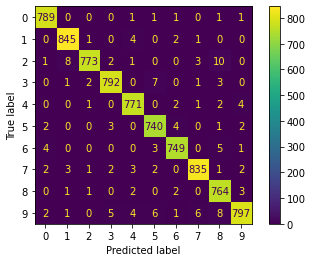

In [407]:
# Uppgift 6.2
# CODE HERE
conv_net = ConvModel()
optimizer = optim.SGD(conv_net.parameters(), lr= learning_rate)
loss_function = nn.CrossEntropyLoss()
net_filename = "conv_net.txt"

# network_state_dict = torch.load('./results/{}.pth'.format(net_filename))
# dense_net.load_state_dict(network_state_dict)

run("conv_net.txt", "opti_conv.txt", conv_net, train_dload)

testconv, cm2 = test(conv_net, val_dload)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

### Uppgift 7 - Jämför restultaten på test-setet

Gör en jämförelse av de tre sätten att klassificera på utifrån de resultat ni har fått på test-setet, både för det stora och det lilla setet med träningsdata. Komplettera er jämförelse med grafer, resultat, kod eller annat som stärker er argumentation i första rutan nedan och skriv en kort beskrivning av era slutsatser i rutan under det.

net.txt
Batch = 799, loss = 0.005771168973296881, epoch = 10
Avg. Loss = 0.1287832409143448, Accuracy = 0.97225


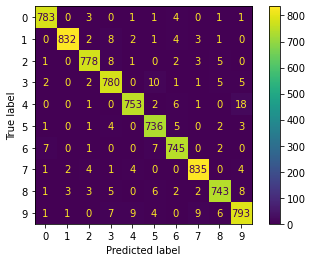

net_small.txt
Batch = 799, loss = 1.1212338209152222, epoch = 10
Avg. Loss = 0.5349197387695312, Accuracy = 0.85525


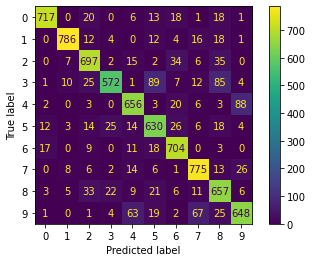

conv_net.txt
Batch = 799, loss = 0.08747313916683197, epoch = 10
Avg. Loss = 0.07199004292488098, Accuracy = 0.980375


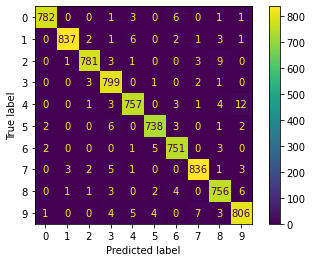

SVM
Accuracy: 97.14 

[[786   0   2   0   2   2   1   0   0   1]
 [  0 841   5   2   1   0   0   3   0   1]
 [  2   2 776   2   3   1   1   7   4   0]
 [  1   1   5 772   1   9   1   4   8   4]
 [  2   0   2   0 765   0   2   0   0  10]
 [  1   0   2   5   2 732   7   1   0   2]
 [  7   1   0   0   2   5 744   0   3   0]
 [  1   3   3   0   5   0   0 826   0  13]
 [  1   4   5   4   3   5   3   2 744   2]
 [  0   2   2   9  16   1   0  10   5 785]]
SVM-Small
Accuracy: 92.14 

[[771   0   7   0   3   4   6   1   2   0]
 [  0 831   7   1   1   7   2   1   1   2]
 [  2   7 743   8   8   1   9   7  13   0]
 [  1   3  19 700   1  27   5  16  25   9]
 [  2   6   3   0 710   0   3   1   3  53]
 [  1   4   4   8   9 694  16   2   7   7]
 [  6   1   8   0   8  12 723   0   4   0]
 [  6   6  12   0  13   2   0 783   2  27]
 [  3  15  12  20   3  19   4   5 683   9]
 [  2   5  11  14  31   2   0  21  11 733]]


In [413]:
# CODE HERE
filenames = ["net.txt","net_small.txt", "conv_net.txt"]
types = [DenseNet(),DenseNet(),ConvModel()]
for i,net in zip(filenames,types):
    
    network_state_dict = torch.load('./results/{}.pth'.format(i))
    net.load_state_dict(network_state_dict)
    print(i)
    testsmall, cm2 = test(net, val_dload)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp.plot()
    plt.show()
print("SVM")
evaluate_svm_model(svm_model, val_X, val_y)

print("SVM-Small")
evaluate_svm_model(svm_model_small, val_X, val_y)

In [ ]:
# TEXT HERE
Baserat på accuracy-siffrorna i figuren ovan ser vi att Convolutional presterar bäst. Dense och SVM presterar likvärdigt.
För de små dataseten blir resultatet markant sämre.
Slutsatsen är därför att mycket data är viktigt, viktigare än vilket klassificeringssätt.

### Uppgift 8 - Ungefär hur många timmar har gruppen lagt på att göra klart inlämningen

In [ ]:
# TEXT HERE
#15 timmar per person 